# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Google Play Store App Project</b></p>

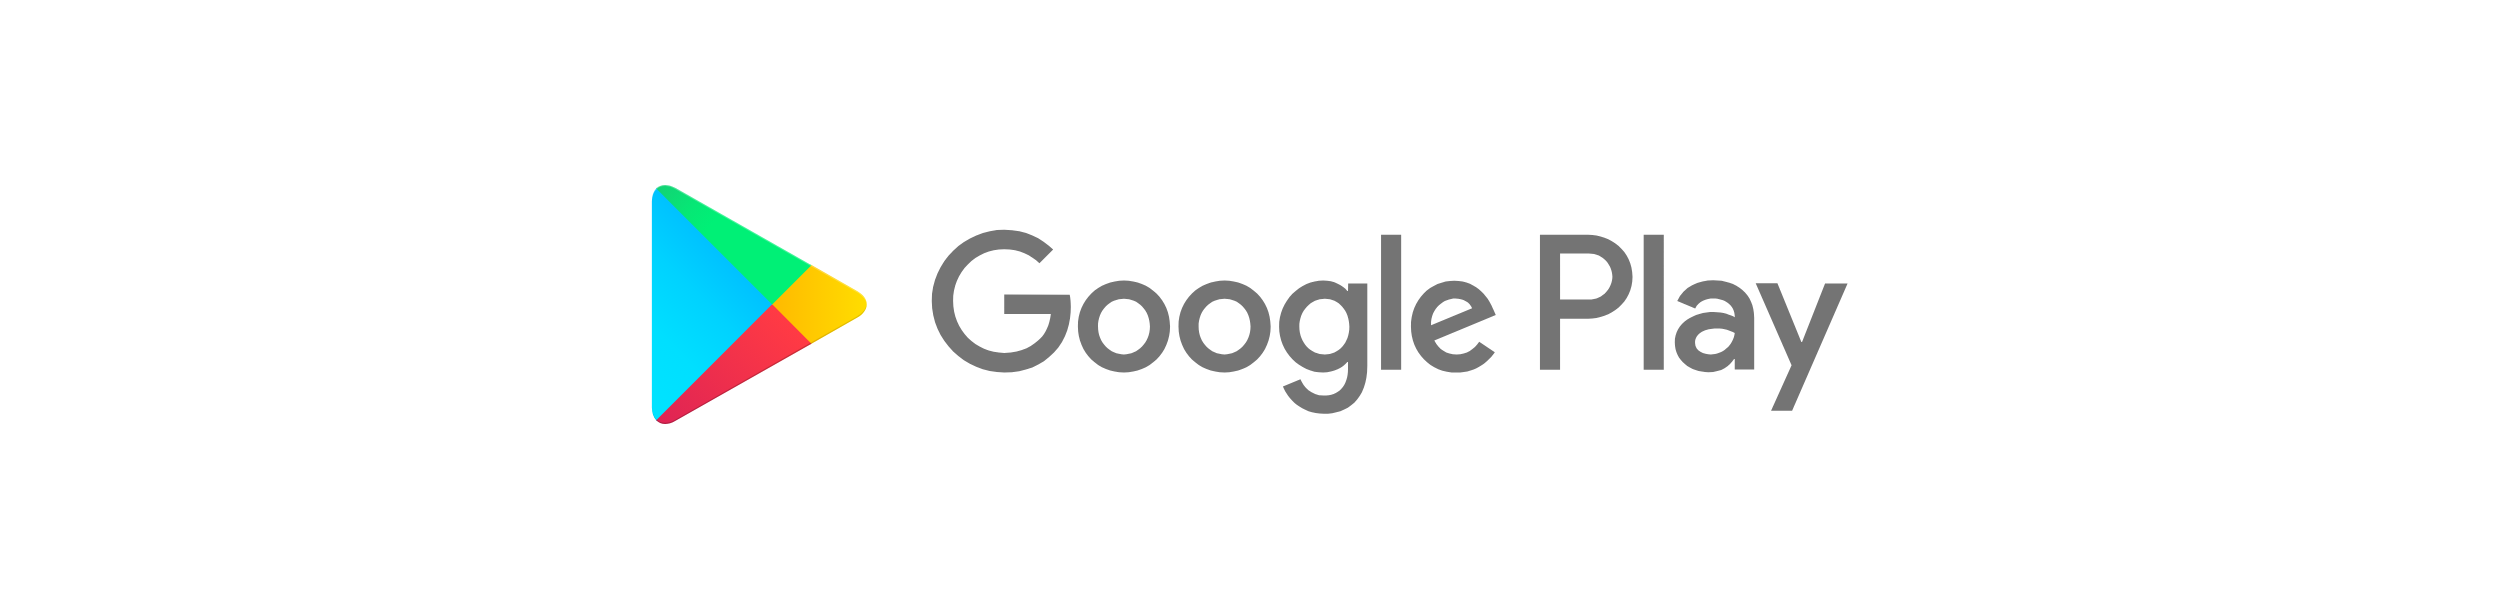

<b>This notebook will explain how to perform EDA and data visualisation for the Google Play Store application dataset.</b>
<br><br>
<b>Contents:</b>
<ul>
<li><a href=‘#import-library’>Import Library</a></li>
<li><a href=‘#loading-dataset’>Loading The Dataset</a></li>
<li><a href=‘#understanding-dataset’>Understanding the dataset-EDA</a></li>
<li><a href=‘#research-queries’>Research Queries and Analytical Insights</a></li>
<li><a href=‘#bonus’>BONUS</a></li>
</ul>

**Hoping it will be useful**

<a id='import-library'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Import Library</b></p>

- **missingno:** Missing data visualisation library, helps us to understand missing data structures.
- **plotly.express:** A library for creating interactive graphics.
- **folium:** A library for data visualisation on a map.
- **folium.plugins:** It allows us to use Folium's extra plugins.

- **plt.rcParams[‘figure.figsize’] = (6,4):** Sets the size of the graphics to be drawn with Matplotlib. Here the size of the graphics is set to 6 inches in width and 4 inches in height.

- **warnings.filterwarnings(‘ignore’):** Used to ignore Python warnings. This prevents unnecessary warning messages while the code is running.
- **pd.set_option(‘display.max_columns’, None):** Pandas does not limit the number of columns in the DataFrame output, it shows all columns.
- **pd.set_option(‘display.max_rows’, None):** Pandas DataFrame does not limit the number of rows in the output, it shows gösterir.

In [ ]:
# !pip install folium
# !pip install missingno

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Loading The Dataset</b></p>

**About the dataset**

The dataset we are examining contains various properties of applications on the Google Play Store. It includes a total of 10,841 rows and 13 columns.

<ul>
    <li><b>App:</b> The name of the application.</li>
    <li><b>Category:</b> The category of the application. Example categories include ART_AND_DESIGN, FINANCE, COMICS, BEAUTY, etc.</li>
    <li><b>Rating:</b> The average rating given by users (out of 5).</li>
    <li><b>Reviews:</b> The total number of user reviews the application has received.</li>
    <li><b>Size:</b> The size of the application in megabytes (MB).</li>
    <li><b>Installs:</b> The number of times the application has been downloaded from Google Play.</li>
    <li><b>Type:</b> Whether the application is free or paid.</li>
    <li><b>Price:</b> The price of the application, in US Dollars (USD). A price of 0 means it's free.</li>
    <li><b>Content Rating:</b> The content rating of the application. For example, "Everyone" indicates that it is suitable for all ages.</li>
    <li><b>Genres:</b> The genre or sub-categories of the application. For example, "Art & Design;Pretend Play" indicates two different types.</li>
    <li><b>Last Updated:</b> When the application was last updated. For example, "January 7, 2018."</li>
    <li><b>Current Ver:</b> The current version of the application. For example, "1.0.0."</li>
    <li><b>Android Ver:</b> The minimum Android version required to run the application. For example, "4.0.3 and up."</li>
</ul>

In [2]:
df0 = pd.read_csv('googleplaystore.csv') 
df = df0.copy()

<a id='understanding-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Understanding the dataset-EDA</b></p>

In [3]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

**Skimpy Library:**

It is a library used for fast and effective summarisation of data sets in Python. 

By showing basic statistics on a column-by-column basis, it makes it easier to understand the data and identify potential problems. 

It provides a simple solution for data analysts that saves time in exploring and analysing large data sets.

In [ ]:
# pip install skimpy

In [4]:
from skimpy import skim

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10841  │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA     ┃ NA %   ┃ mean     ┃ sd        ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Rating           │   1474 │   13.6 │    4.193 │    0.5374 │    1 │     4 │   4.3 │   4.5 │    19 │   ▂▇    │  │
│ └──────────────────┴────────┴────────┴──────────┴───────────┴──────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ App                           │      0 │          0 │                         3.9 │                  42584 │  │
│ │ Category                      │      0 │          0 │                           1 │                  10841 │  │
│ │ Reviews                       │      0 │          0 │                           1 │                  10841 │  │
│ │ Size                          │      0 │          0 │                         1.3 │                  14231 │  │
│ │ Installs                      │      0 │          0 │                           1 │                  10841 │  │
│ │ Type                          │      1 │       0.01 │                           1 │                  10840 │  │
│ │ Price                         │      0 │          0 │                           1 │                  10841 │  │
│ │ Content Rating                │      1 │       0.01 │                         1.1 │                  11759 │  │
│ │ Genres                        │      0 │          0 │                         1.4 │                  15450 │  │
│ │ Last Updated                  │      0 │          0 │                           3 │                  32521 │  │
│ │ Current Ver                   │      8 │       0.07 │                         1.3 │                  13929 │  │
│ │ Android Ver                   │      3 │       0.03 │                           3 │                  32514 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

**The **info() method provides basic information about the DataFrame. This method is useful for quickly understanding the structure of the DataFrame. 

- **RangeIndex:** Information about indexing, for example start, end and step size.
- **Data columns:** Names of all columns, how many non-null values there are and the data type (dtype).
- **memory usage:** How much space the DataFrame occupies in memory.
- **dtypes:** How many different data types (e.g. integer, float, object, etc.) there are.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**df.columns** is a property that returns column names. When this property is used, a list containing the names of the columns in the DataFrame is obtained.

Column names do not require spaces, so it is appropriate to consider replacing these spaces with underscore (_), which we always use.

In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**.str.replace(‘ “, ”_’):** Reformats column names by replacing spaces within column names with underscores.

It helps you get more useful and workable column names. This is a common practice to keep column names in a single layout and provide easier access to columns.

In [8]:
df.columns = df.columns.str.replace(" ","_")

In [9]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

**df.shape,** is a property that returns size information (number of rows and columns). 

When this property is used, a tuple is obtained showing how many rows and columns the dataframe consists of.

In [10]:
df.shape

(10841, 13)

The **dtypes property** shows the data type (dtype) of each column. 

This property helps you quickly understand what type of data is in your DataFrame.

In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

**duplicated**

- The **duplicated** function is used to identify duplicate rows in a **pandas DataFrame**. This function returns a **Series** with boolean (True/False) values for each row indicating whether it is duplicated or not.
- The function provides flexibility with the **keep** parameter:
  - **keep=first** (default): Marks all duplicates except the first duplicate as **True**.
  - **keep=last**: Marks all duplicates except the last duplicate as **True**.
  - **keep=False**: Marks all duplicates as **True**.

In [12]:
df.duplicated().sum()

483

 **drop_duplicates**

- The **drop_duplicates** function is used to **remove duplicate rows from the DataFrame**. This function returns the remaining DataFrame after removing duplicates.
- This function can also be used with the **keep** parameter:
  - **keep=first** (default): Removes all duplicates except the first duplicate.
  - **keep=last**: Removes all duplicates except the last duplicate.
  - **keep=False**: Removes all duplicate lines, i.e. each unique combination appears only once.
- The **inplace** parameter determines whether changes are made in-place on the original DataFrame (**True** will make in-place changes, **False** will leave the original DataFrame unchanged and return the result as a new DataFrame).

In [13]:
df = df.drop_duplicates()

In [14]:
pd.DataFrame({
    'Count': df.count(),
    'Null': df.isnull().sum(),
    'Cardinality': df.nunique()
})

Count  Null  Cardinality
App             10358     0         9660
Category        10358     0           34
Rating           8893  1465           40
Reviews         10358     0         6002
Size            10358     0          462
Installs        10358     0           22
Type            10357     1            3
Price           10358     0           93
Content_Rating  10357     1            6
Genres          10358     0          120
Last_Updated    10358     0         1378
Current_Ver     10350     8         2832
Android_Ver     10355     3           33

The **df.isnull().sum()** code returns the number of missing (NaN or None) values for each column in a pandas DataFrame (named df).

This code is very useful in the data cleaning and preprocessing phases, because it allows us to quickly see in which columns the missing data are.

In [15]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

**sns.set_theme():** uses Seaborn's default theme settings. This ensures that all generated graphics have one consistent look.

**sns.set(rc={‘figure.dpi’:300, ‘figure.figsize’:(12,9)}):** This line sets the resolution and size of the generated graphics.

**‘figure.dpi’: 300:** Sets the DPI (dots per inch) setting to 300, which makes the graphics higher resolution.

**‘figure.figsize’: (12, 9):** Sets the size of the generated graphics to 12x9 inches.

In [16]:
sns.set_theme()

sns.set(rc={"figure.dpi":300, "figure.figsize":(12,9)})

The **sns.heatmap(df.isnull(), cbar=False)** code creates a heatmap to visualise where missing data (NaN or None) is in a DataFrame. 

The cbar=False parameter ensures that the colour bar is not shown.

**In this heatmap:**

Missing values are shown in white or a light colour.

Other values are usually shown in black or a dark colour.

This visualisation is very useful to quickly see in which columns and rows the missing data is concentrated. 

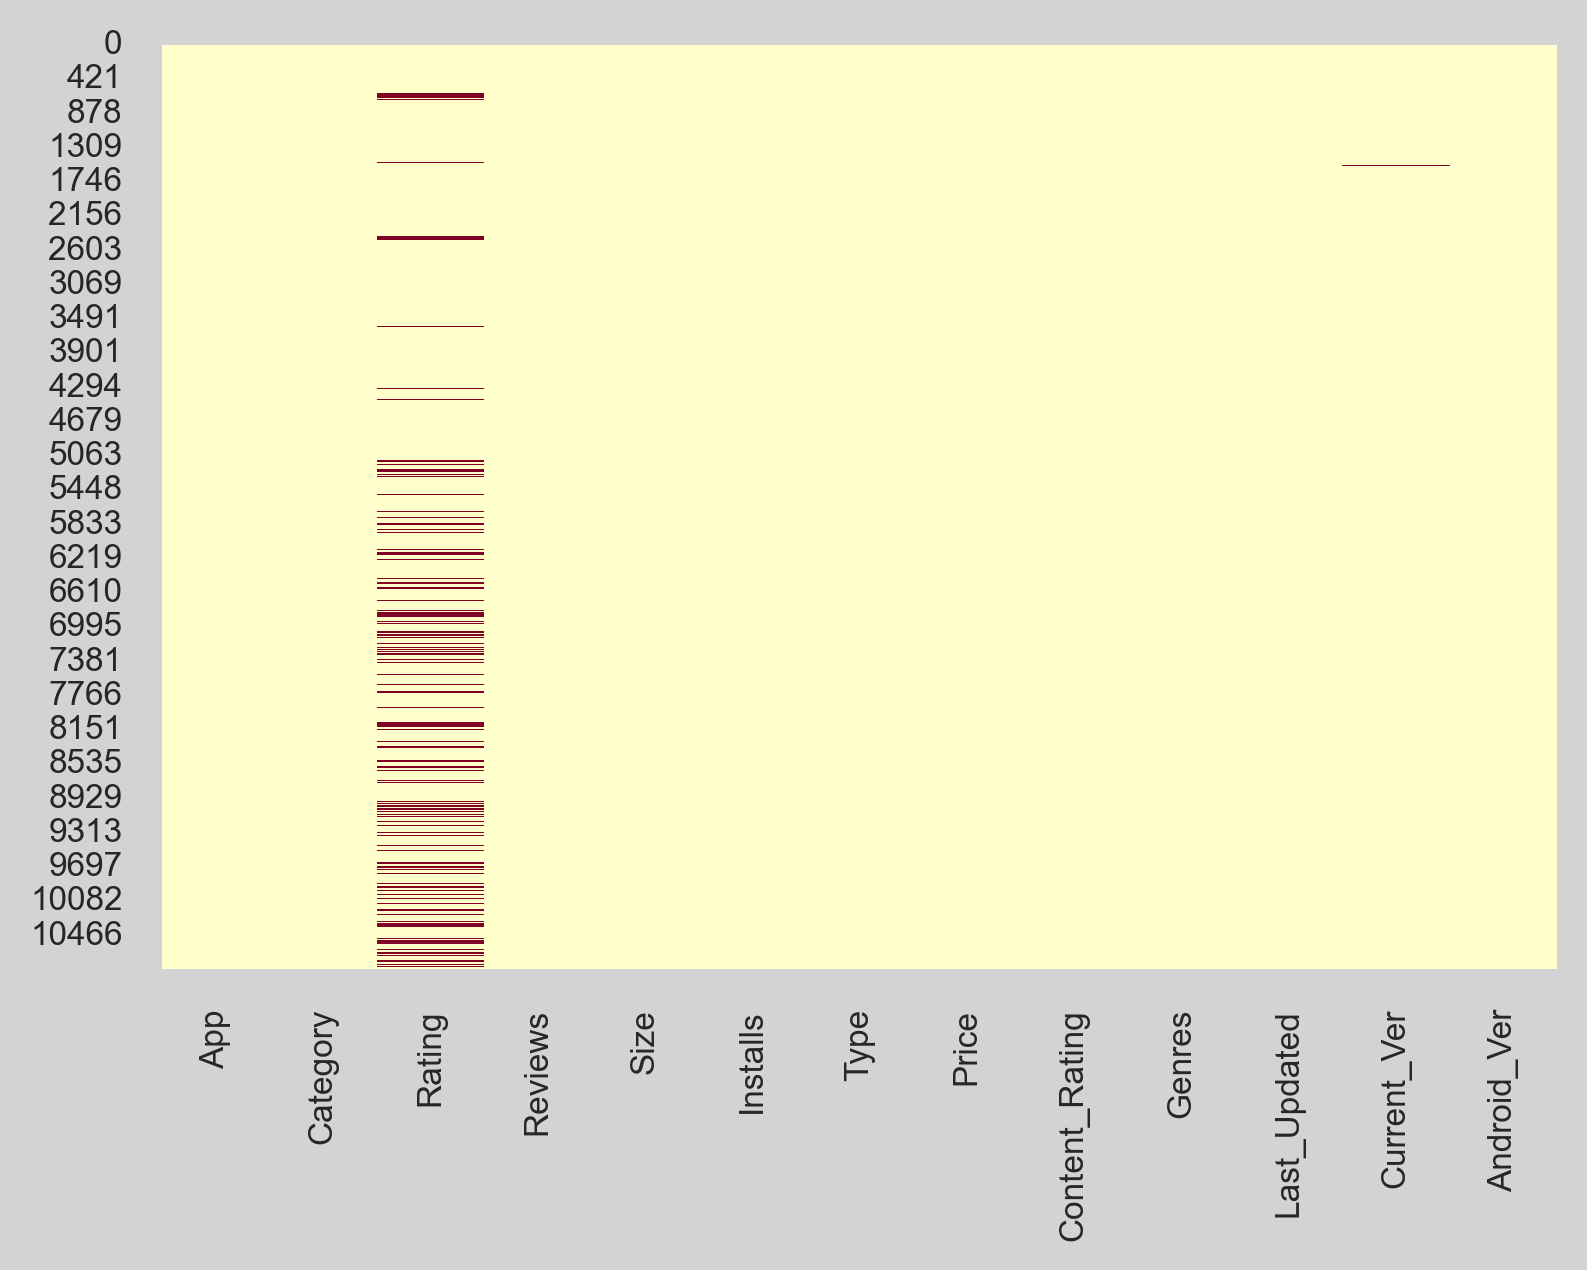

In [17]:
fig, ax = plt.subplots(figsize=(6, 4))  # Create a 6x4 inch figure
fig.patch.set_facecolor('lightgray')  # General background colour

ax.tick_params(axis='x', labelsize=8)  # Size of X axis labels
ax.tick_params(axis='y', labelsize=8)  # Size of Y axis labels

sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd');

The **msno.bar(df);** script uses the missingno library (often abbreviated as msno) to display the missing values in the data set as a bar chart. 

Each bar represents a column, and the height of the bar indicates the number of non-missing values in that column.

This type of visualisation can help you quickly understand in which columns the missing data is concentrated. 

Columns with missing data may require special attention during data cleaning or preprocessing.

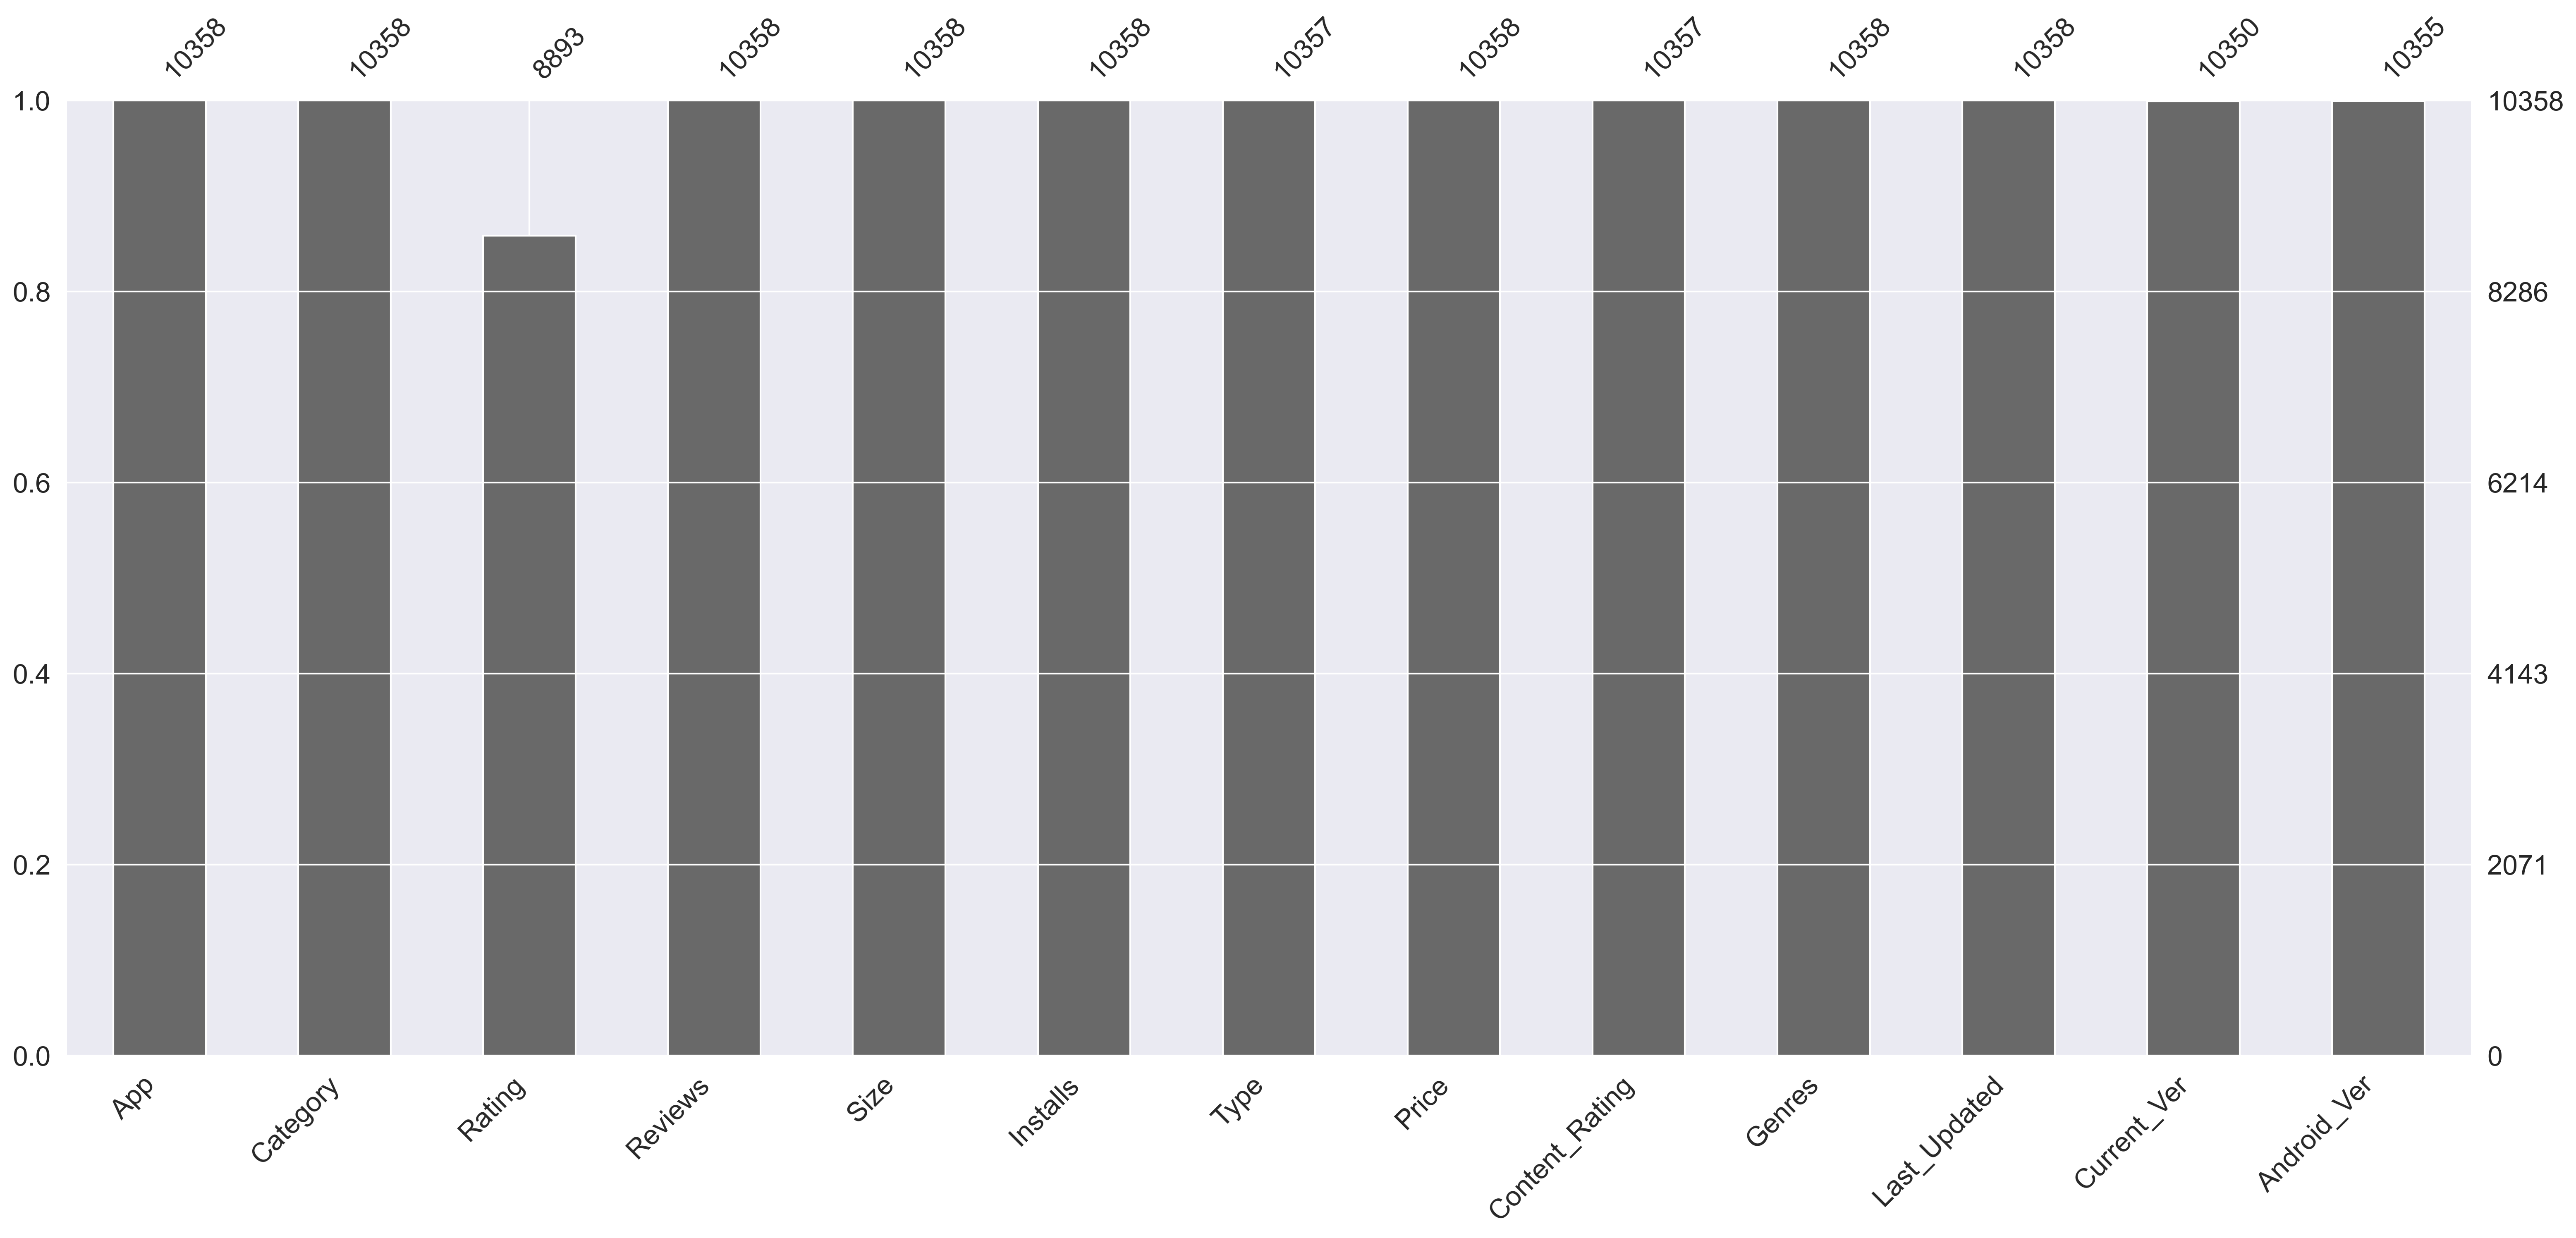

In [18]:
#to see it as a bar chart

msno.bar(df);

**Output Description**

**Horizontal Axis (X Axis):** This axis shows the column names in the data set. Each column is represented by a bar.

**Vertical Axis (Y Axis):** This axis shows the number of non-missing values in each column. If a bar is completely full, it means that there are no missing values in that column. If a bar is not completely full, it means that there are missing values.

**Bars:** Each bar represents a column. The height of the bar indicates the number of non-missing values in that column. The colour of the bar is often used to visualise the number of non-missing values. A completely full bar indicates that there are no missing values in that column.

**Numbers Above Bars:** Indicates the exact number of non-missing values in each column.

**Numbers on the outer right side of the graph:** These numbers represent the number of observations in numerical form.

**Numbers on the outer left side of the graph:** These numbers show the number of observations proportionally.

**msno.matrix(df);** shows the missing values in the data set as a matrix graph using the missingno library. 

This visualisation is very useful for understanding the structure of missing values in the data set.

This type of visualisation is very useful to see in which columns and rows the missing values are concentrated, as well as how the missing values are distributed throughout the data set.

For example, if there are a lot of missing values in a particular column, or if the missing values show a particular pattern, you may need to do more work on that column or pattern.

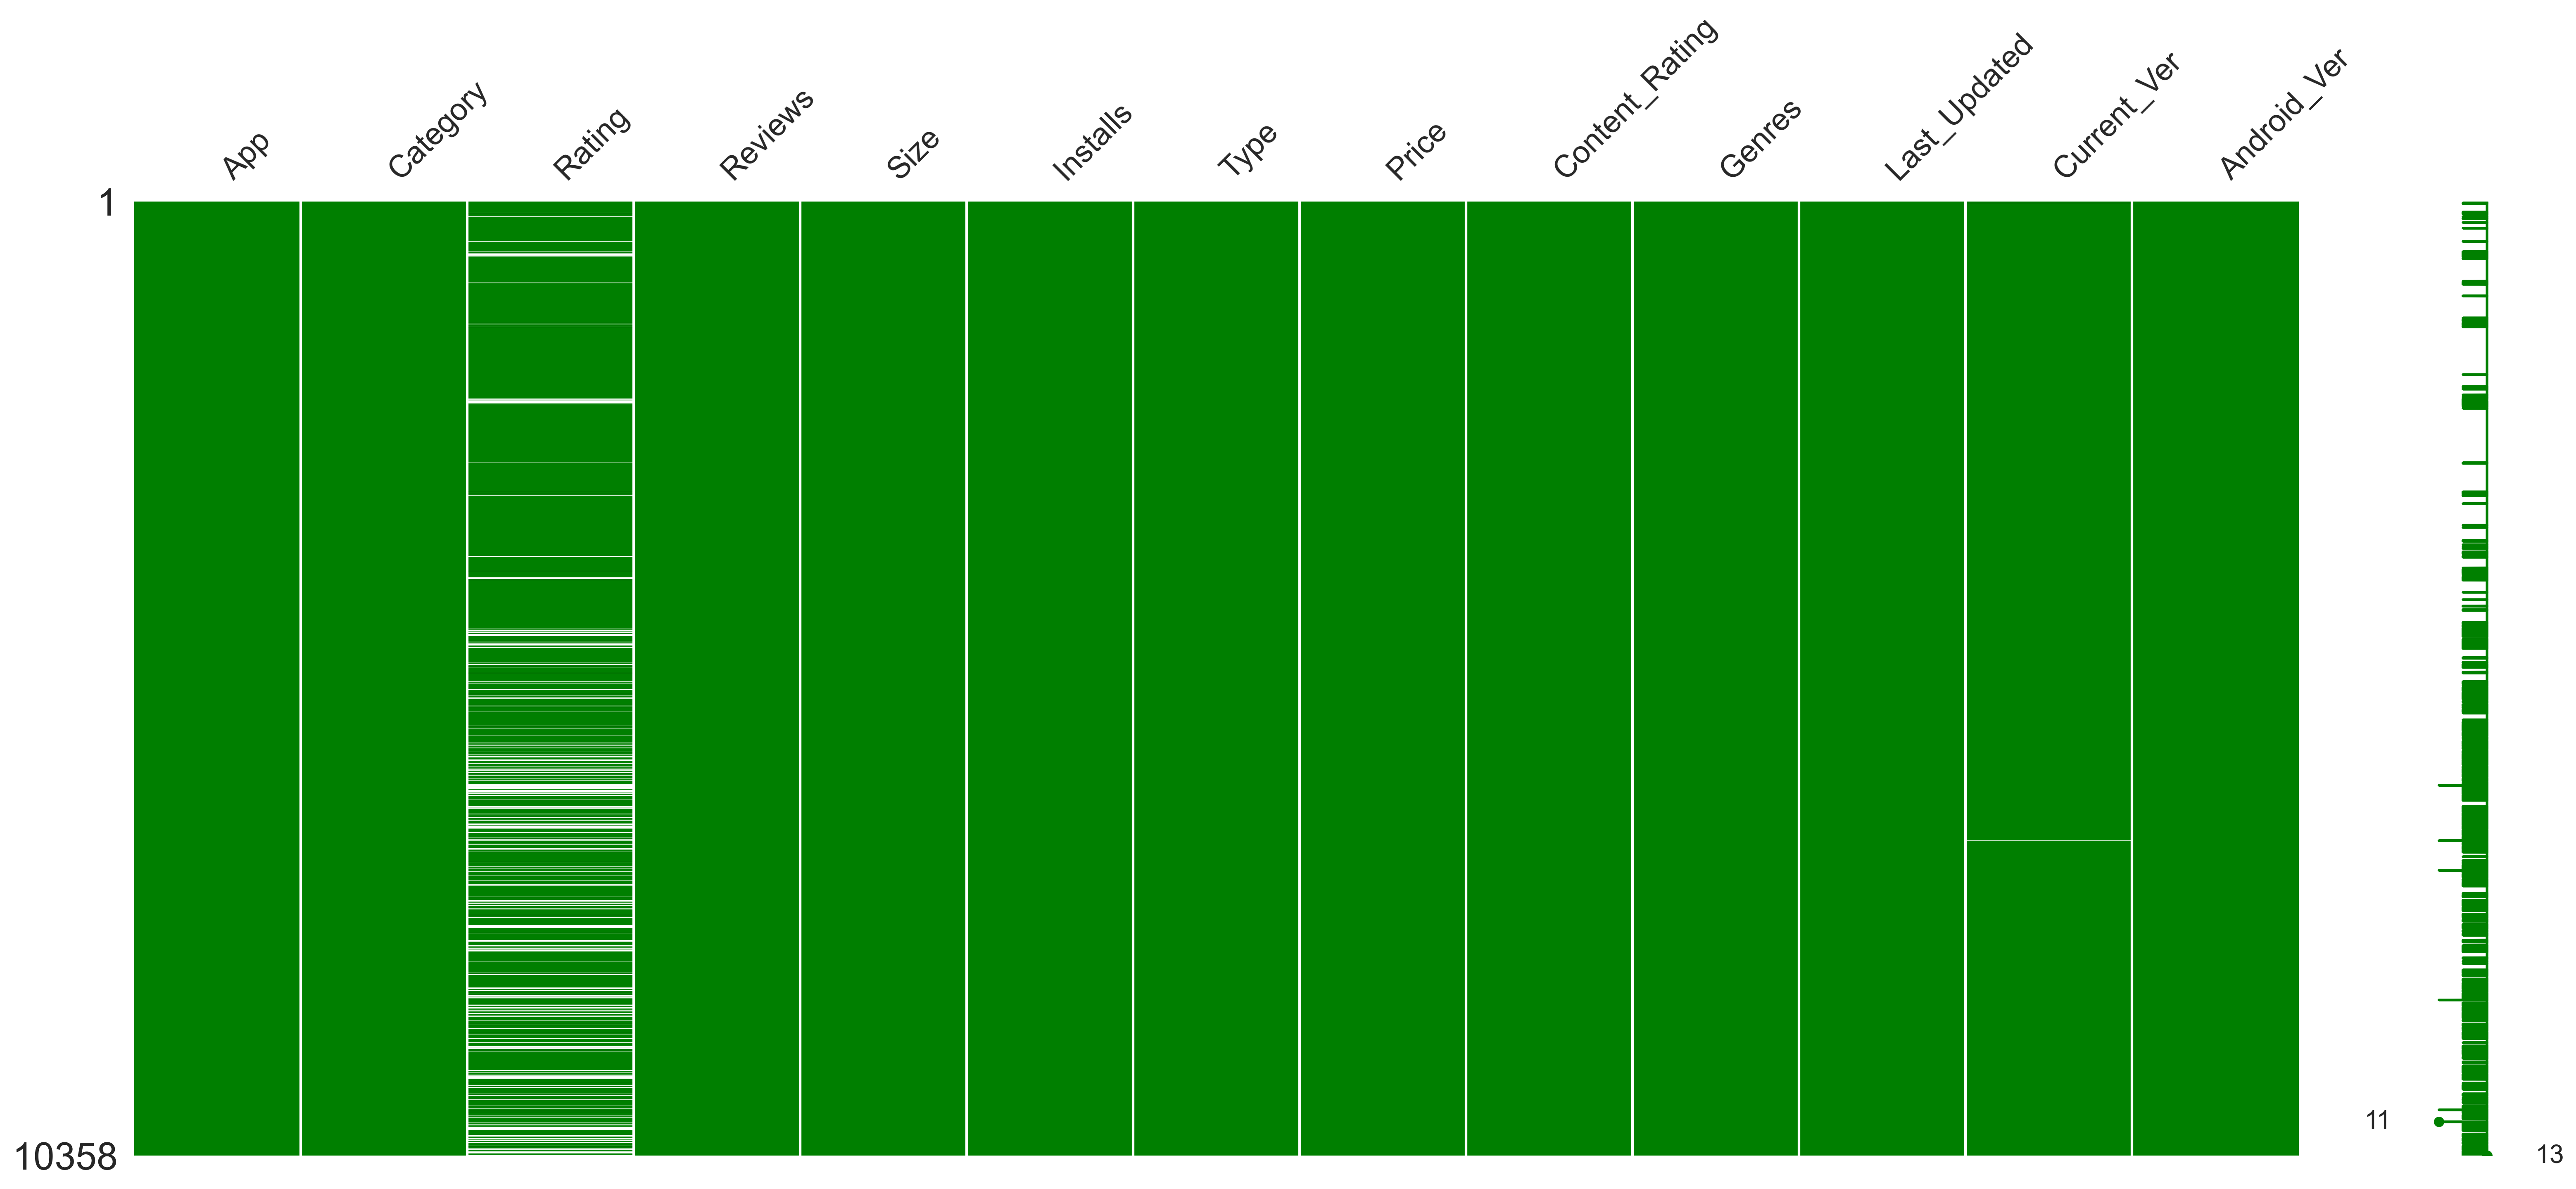

In [19]:
# To see it as a matrix chart

msno.matrix(df, color=(0, 0.5, 0), fontsize=18, sparkline=True);

**Horizontal Axis (X Axis):** This axis shows the column names in the data set. Each column is represented by a series of dots or lines.

**Vertical Axis (Y Axis):** This axis shows the row indices in the data set. Each row is represented by a series of dots or lines according to whether the values in the columns specified on the horizontal axis are present or absent.

**If a value is missing, the point is shown as white; if the value is not missing, the point is shown as grey or black (blue, since we are using colour here). This way you can see which columns and rows have missing values.

**colour=(0, 0, 1):** This parameter specifies the colour to use to show missing values. Here (0, 0, 1) represents the colour blue. This means Red=0, Green=0, Blue=1 in RGB colour coding. Therefore, missing data points will be shown in blue.

**Sparkline-Right Hand Side Bar (nullity bar):** This is a graph summarising the distribution and density of missing values in each row of the dataset. The gaps at the top and bottom of the Sparkline represent rows in the dataset that do not contain missing values. Filled portions of the Sparkline represent rows with missing data. The smaller the gap between the top and bottom of the Sparkline, the more rows with missing values.

In [20]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

- With the images above, we have seen that there is a lot of missing data in the Rating column.

- Missing values are usually represented as ‘NaN’ (Not a Number) and rows with these missing values in the data frame can cause unwanted results during analysis or model training. 

- Therefore, removing rows with missing values can help clean up the dataset.

- There are many ways to combat this missing data, and this is an important area for machine learning. This area is known as a separate business area. 

- For this column, I will use the option of filling with the median, which is a common method for missing value, i.e. missing data. The median value is the value in the middle of the data set and is usually not affected by outliers.

- When filling in missing data, it is always necessary to keep in mind the outliers present in the data before using the mean. 

- In a data set with many outliers, the choice of mean may be incorrect. The mean value can easily be affected by outliers in the data set. 

- Therefore, if there are outliers in your data set and you do not want these values to be effective in filling in missing data, using the median may be a better option. 

- Since the median is more ‘resilient’ to outliers, it is often a more suitable option for such situations.

**rating_median = df[‘Rating’].median():** This line calculates the median value of the data in the column named ‘Rating’ and assigns this value to a variable named ‘rating_median’. The median is the value in the middle of the data set when sorted and represents more than half of the values in the data set.

In [21]:
rating_median = df["Rating"].median()
rating_median

4.3

**df[‘Rating’].fillna(rating_median, inplace=True):** This row fills in missing values in the ‘Rating’ column (represented as ‘NaN’) with the value ‘rating_median’. The fillna function is used to fill in missing values in the specified column.

In [22]:
df["Rating"].fillna(rating_median, inplace=True)

# df["Rating"].fillna(df["Rating"].median(), inplace=True)

As there are fewer omissions in the other columns, I see no harm in dropping them.

**dropna():** Used to remove rows (observations) with missing values.

**inplace=True:** When set to ‘True’, the operation makes the changes we make to the data frame permanent.

In [23]:
df.dropna(inplace=True)

**sum():** This sums the number of ‘True’ values. That is, it calculates the number of missing values for each column.

**Second sum():** Sums the number of missing values for each column calculated as a result of the first sum() operation. This gives the total number of all missing values in the data frame.

In [24]:
df.isnull().sum().sum()

0

In [25]:
df

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     4.3       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content_Rating                     Genres      Last_Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current_Ver         Android_Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10346 rows x 13 columns]

## <font color='green'> <b>Reviews</b><font color='black'>

- **count:** There are 10,346 non-missing values.
- **unique:** 5,999 of these 10,346 values are unique.
- **top:** The most frequent value is ‘0’.
- **freq:** The value ‘0’ repeats 591 times.

These statistics show that the ‘Reviews’ column is recognised as a **categorical** or **text** data. If this column has a numeric data type (i.e. number of reviews), it may be useful to convert this column to a numeric data type (e.g. int or float). This conversion makes it easier to perform numerical analyses on this column later.

A high frequency of the value ‘0’ may indicate that many applications did not receive any comments in this column, or that this data is missing. Such cases should be taken into account when analysing the dataset or building models.

These statistics also give a general idea of how the ‘Reviews’ column is distributed in the dataset. For example, the most frequent value and its frequency provide information about how diverse the dataset is or how common a particular value is.

In [26]:
df["Reviews"].describe()

count     10346
unique     5999
top           0
freq        591
Name: Reviews, dtype: object

The code **df[‘Reviews’] = df[‘Reviews’].astype(‘int64’)** changes the data type of the ‘Reviews’ column in the pandas DataFrame to int64.

It is used if the ‘Reviews’ column contains numeric values but these values do not have a numeric data type (for example, if they are stored as object or string).

This conversion makes it possible to perform numerical analyses on the ‘Reviews’ column and use it in a numerical model. For example, you can now calculate the mean, median, standard deviation, etc. of this column.

However, before running this code, you should make sure that there are no missing (NaN) or textual values in the ‘Reviews’ column. If there are, the astype(‘int64’) transformation will throw an error. If there are missing or textual values, you will need to fill or remove these values appropriately.

In [27]:
df["Reviews"] = df["Reviews"].astype("int64")

- **count:** Number of non-missing values.
- **mean:** Average value.
- **std:** Standard deviation.
- **min:** Minimum value.
- **25%:** First quartile (Q1), i.e. the upper limit of the bottom 25% of the data set.
- **50%:** Median (Q2), i.e. the median value of the data set.
- **75%:** Third quartile (Q3), i.e. the lower limit of the upper 25% of the data set.
- **max:** Maximum value.

In [28]:
df["Reviews"].describe().round()

count       10346.0
mean       406334.0
std       2698179.0
min             0.0
25%            32.0
50%          1688.0
75%         46598.0
max      78158306.0
Name: Reviews, dtype: float64

## <font color='green'> <b>Category</b><font color='black'>

In [29]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [30]:
df['Category'] = df['Category'].str.capitalize().str.replace("_", " ")

In [31]:
df['Category'].unique()

array(['Art and design', 'Auto and vehicles', 'Beauty',
       'Books and reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food and drink', 'Health and fitness', 'House and home',
       'Libraries and demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel and local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video players', 'News and magazines', 'Maps and navigation'],
      dtype=object)

## <font color='green'> <b>Size</b><font color='black'>   

**print(len(df[‘Size’].unique())):** Returns the number of unique values in the ‘Size’ column. 

**df[‘Size’].unique():** Returns the unique values in the ‘Size’ column.

These codes are useful for understanding how diverse the ‘Size’ column is. For example, if there are a lot of unique values, you may need to do some preprocessing steps when using this column in modelling (for example, encoding it as a categorical variable or converting it to a numeric variable).

Also, seeing what these unique values are can give insight into what steps may be needed for data cleaning or transformation. For example, if the ‘Size’ column contains both ‘M’ (Megabyte) and ‘K’ (Kilobyte) in different units, it may be necessary to convert these values to the same unit.

In [32]:
print(len(df["Size"].unique()))
df["Size"].unique()

457


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

The purpose of this function is to convert a given size value (‘size’) into megabytes (M).

1. **if isinstance(size, str):**: The function first checks whether the size parameter is a string. If it is a string, conversion will be done according to the content.

2. **if ‘k’ in size:**: If there is a ‘k’ character in size, this indicates a value in kilobytes (K). To convert to megabytes, divide the kilobyte value by 1024. Rounds the resulting decimal number and displays it to 2 decimal places.

3. **elif ‘M’ in size:**: If size contains the character ‘M’, it is already in megabytes (M). Removes the ‘M’ character and returns the numeric value.

4. **else:**: If it does not contain ‘k’ or ‘M’ (for example, ‘Varies with device’), None is returned. This indicates that the value is unknown.

5. **return None**: If the size parameter is not a string (for example None or NaN), the function returns None.

In [ ]:
# df['Converted_Size'] = df['Size'].apply(
#     lambda x: None if x == 'Varies with device' else x[:-1]
#     if x[-1] == 'M' else round(float(x[:-1]) / 1024, 2))

In [33]:
# Function to convert column ‘Size’
def convert_to_megabytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return round(float(size.replace('k', '')) / 1024, 2)
        elif 'M' in size:
            return float(size.replace('M', ''))
        else:
            return None  # ‘Varies with device’ or for other values that cannot be converted to numbers
    return None  # For None or NaN

In [34]:
# We transform the ‘Size’ column
df['Converted_Size'] = df['Size'].apply(convert_to_megabytes)

In [35]:
# Let's compare the converted ‘Converted_Size’ column with the original ‘Size’ column
sample_data = df[df['Size'].str.contains('k|M', na=False)]
sample_data[['Size', 'Converted_Size']]

Size  Converted_Size
0       19M            19.0
1       14M            14.0
2      8.7M             8.7
3       25M            25.0
4      2.8M             2.8
...     ...             ...
10835  9.6M             9.6
10836   53M            53.0
10837  3.6M             3.6
10838  9.5M             9.5
10840   19M            19.0

[8821 rows x 2 columns]

In [ ]:
# df["Size"].replace("M","", regex=True, inplace = True)
# df["Size"].replace("k","", regex=True, inplace = True)

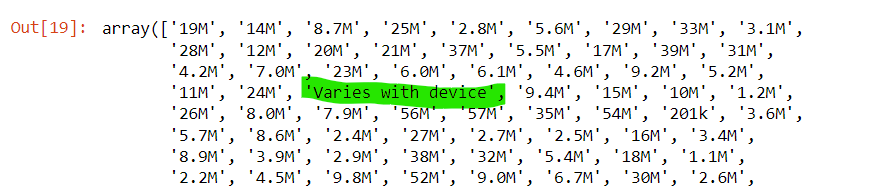

Now we will change the values specified as ‘Varies with device’ in the ‘Size’ column with the median (median value) of this column. For this, we will first calculate the median of the ‘Size’ column. Then we will replace this value with Varies with device values. In this way, since it is unclear what the values specified as ‘Varies with device’ in the ‘Size’ column are, we are actually doing a feature engineering by filling these values with the median of this column.

The median is usually less affected by outliers, so it can be considered a good option for filling in missing or uncertain data.

To do this, you can first calculate the median of the rows without ‘Varies with device’ and then replace the rows with ‘Varies with device’ with this median value. 

**df[df[‘Size’]!=‘Varies with device’]:** Selects rows from DataFrame (‘df’) whose ‘Size’ column is not ‘Varies with device’.

**[‘Size’].astype(float):** Converts the ‘Converted_Size’ column of the selected rows to float type. This is needed to calculate the median because the median is a numerical measure.

**.median():** Calculates the median of the ‘Converted_Size’ column.

As a result, the size_median variable stores this median value. This value can be used to fill in values that are missing or have been specified as ‘Varies with device’ in the ‘Converted_Size’ column. 

Since the median is less affected by outliers in the data set, it is often a good option for filling in missing data.

In [36]:
size_median = df[df["Converted_Size"]!="Varies with device"]["Converted_Size"].astype(float).median()
size_median

13.0

In [37]:
df[df["Converted_Size"] != "Varies with device"]["Converted_Size"]

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Converted_Size, Length: 10346, dtype: float64

**Code Description**

This code fragment replaces the values specified as ‘Varies with device’ in the ‘Size’ column with the previously calculated size_median (median) value.

**df[‘Size’].replace(‘Varies with device’, size_median, inplace=True):** Replaces all values specified as ‘Varies with device’ in the ‘Size’ column with size_median. The inplace=True parameter ensures that the changes are made on the same DataFrame.

This operation fills in the indeterminate values in the ‘Size’ column with a numeric value, so that this column is then available for numerical analyses or machine learning models. This type of modification is often considered attribute engineering, as it aims to transform the data so that the model can make more effective use of this attribute (column).

In [38]:
df["Converted_Size"].replace("Varies with device", size_median, inplace=True)

**pd.to_numeric(df.Converted_Size):** Pandas' to_numeric function converts the values in the “Converted_Size” column into a numeric format. If there is an error during the conversion (for example, if there is a non-numeric value), it will return an error message.

This makes the ‘Converted_Size’ column available for numerical analyses or machine learning models. 

In [39]:
df.Converted_Size = pd.to_numeric(df.Converted_Size)

In [40]:
df.Converted_Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Converted_Size, dtype: float64

The **df.Size.describe().round()** code calculates the basic statistics of the ‘Converted_Size’ column and rounds these values to the nearest integer.

In [41]:
df.Converted_Size.describe().round(1)

count    8821.0
mean       21.3
std        22.5
min         0.0
25%         4.7
50%        13.0
75%        29.0
max       100.0
Name: Converted_Size, dtype: float64

In [42]:
df.drop("Size", axis=1, inplace=True)

In [43]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Converted_Size'],
      dtype='object')

## <font color='green'> <b>Installs</b> <font color='black'>   

In [44]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

**df.Installs = df.Installs.apply(lambda x:x.replace(‘+’,‘’)):** This code removes the ‘+’ character from each value in the ‘Installs’ column. For example, the value ‘10,000+’ is changed to ‘10,000’.

**df.Installs = df.Installs.apply(lambda x:x.replace(‘,’,‘,’‘)):** This code removes the comma (’,") character from each value in the “Installs” column. For example, the value ‘10,000’ is changed to ‘10000’.

**df.Installs = df.Installs.apply(lambda x:int(x)):** This code converts each value in the ‘Installs’ column to an integer (int). For example, the value ‘10000’ is changed to 10000 (an integer, not a string).

These operations bring the ‘Installs’ column into a form suitable for numerical analyses or machine learning models. This type of transformation is often considered attribute engineering, because it aims to transform the data so that the model can make more effective use of that attribute.

In [45]:
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

# df.Installs = df.Installs.apply(lambda x: int(x.replace("+", "").replace(",", "")))

In [46]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

These unique values indicate how much the apps have been downloaded. For example:

10,000: Indicates that the app has been downloaded 10,000 times.

500,000: Indicates that the app has been downloaded 500,000 times.

1,000,000: Indicates that the app has been downloaded 1,000,000 times.

... and so on.

Storing these values as integers makes this column more useful for numerical analyses and machine learning models.

For example, you can use these numeric values as a dependent or independent variable in a regression model.

## <font color='green'><b>Price</b> <font color='black'>   

This information may be important in determining how to preprocess or transform the ‘Price’ column. For example, if this column contains numeric values but these values are stored in a string format (such as ‘$1.99’), it may be necessary to convert these values to a numeric format.

This type of analysis is useful to gain a general understanding of the dataset and in particular to understand how this column is distributed before moving on to the modelling stage.

In [47]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

**df.Price = df.Price.apply(lambda x:x.replace(‘$’,‘’)):** This line removes the `\$` sign from the values in the ‘Price’ column. The apply method allows you to apply a specific operation to each column value. In this case, the lambda function is used to replace the `\$` sign in each value with an empty string.

**df.Price = df.Price.apply(lambda x:float(x)):** This line converts the values in the ‘Price’ column to a decimal (float) number. The apply method is used to apply a conversion operation to each column value. In this case, the float() function converts each value to a decimal number.

As a result, this snippet clears the values in the ‘Price’ column and converts them to the decimal number data type. This is very useful when you need to use the prices in the column as numeric data.

In [48]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))

# df.Price = df.Price.apply(lambda x: float(x.replace("$", "")))

In [49]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

## <font color='green'> <b>Genres</b><font color='black'>  

In [50]:
df["Genres"].nunique()

119

In [51]:
df["Genres"].head(10)

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
5                 Art & Design
6                 Art & Design
7                 Art & Design
8                 Art & Design
9      Art & Design;Creativity
Name: Genres, dtype: object

This output shows the first 10 rows of the ‘Genres’ column. As we can see, this column usually contains one or more genres or categories. Genres and categories are separated by a semicolon **(‘;’)**.

**For example:**

‘Art & Design": This indicates that the application belongs to the category ‘Art & Design’.
‘Art & Design;Pretend Play": This indicates that the app belongs to both ‘Art & Design’ and ‘Pretend Play’ categories.
‘Art & Design;Creativity": This indicates that the app belongs to both ‘Art & Design’ and ‘Creativity’ categories.
This type of column is usually considered as a categorical attribute and such attributes usually require preprocessing for machine learning modFor example, if you want to include such a column in your model, you can convert this categorical variable into a numeric form using a method such as ‘One-Hot Encoding’. For example, this example dataset contains only applications belonging to the category ‘Art & Design’ in the first 10 rows. However, this does not mean that the whole dataset is like this; this only applies to the first 10 rows.

119 I will reduce the unique column a little here, so let's look at the row with the types separated by semicolons, I don't want to take subtypes here. I want to walk with the main type. In this context, I will write a code for thiion)bir kod yazacağım.

**Code Description**

This code fragment separates the values in the ‘Genres’ column with a semicolon (‘;’) and then takes the first item (index 0). So if there is more than one genre or category in a row (for example, ‘Art & Design;Pretend Play’), this script will only take the first genre or category (‘Art & Design’).


**df[‘Genres’].str.split(‘;’):** This part separates each value in the ‘Genres’ column with a semicolon (‘;’). As a result, a list is returned for each row.

**.str[0]:** This part takes the first element of the generated list (in Python, indexes start at 0).

This operation aims to convert the ‘Genres’ column into a simpler form. For example, if an application has more than one type, this code will only take the first type. This can make the dataset more manageable, especially for machine learning models, but it is important to note that this approach may lose some information when an application has more than one type or category.

In [52]:
df["Genres"] = df["Genres"].str.split(";").str[0]

**Code description**

The **len(df[‘Genres’].unique())** script counts how many different unique values are in the ‘Genres’ column.

This code gives an idea of how diverse the ‘Genres’ column is. For example, if this number is very high, this indicates that the column contains a lot of different categories or genres. If the number is low, this usually means that the column is less diverse.

This type of analysis is useful to gain a general understanding of the dataset and in particular to understand how this column is distributed before moving on to the modelling stage.

In [53]:
df["Genres"].nunique()

48

In [54]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [55]:
df["Genres"].value_counts()

Genres
Tools                      841
Entertainment              627
Education                  609
Business                   427
Medical                    408
Productivity               407
Personalization            386
Lifestyle                  374
Action                     371
Sports                     368
Communication              367
Finance                    360
Photography                322
Health & Fitness           308
Social                     280
News & Magazines           264
Casual                     263
Travel & Local             237
Arcade                     234
Books & Reference          232
Shopping                   224
Simulation                 216
Dating                     196
Video Players & Editors    178
Puzzle                     161
Maps & Navigation          137
Food & Drink               124
Role Playing               120
Racing                     119
Strategy                   108
Educational                106
Adventure                   91
A

This output gives the impression that Music and Music & Audio are used in the same sense, so it would be correct to correct them all as Music.

In [56]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

## <font color='Green'> <b>Last_Updated</b><font color='black'> 

The ‘Last_Updated’ column contains dates indicating when the application was last updated. This column is usually in date format (for example, ‘January 7, 2018’).

The output of this script shows the general structure of this column and how the dates are stored. If you plan to use this column in your model, preprocessing steps may be required, such as converting the dates to a numeric form or calculating the number of days between dates.

This type of analysis is useful to gain a general understanding of the dataset and, in particular, to understand how this column is distributed before proceeding to the modelling stage.

In [57]:
df["Last_Updated"].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last_Updated, dtype: object

**pd.to_datetime(df[‘Last_Updated’]):** The Pandas library's to_datetime function can convert an array, series, or single date value to a datetime object. This code fragment converts all values in the ‘Last_Updated’ column to a datetime object.

This conversion is useful to make it easier to work with dates. For example, you can now use this column to calculate the number of days since the last time the application was updated, or group by a specific time period such as years, months or days. 

In [58]:
# Create date-time array

df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

In [59]:
# Separate Year, Month and Day into separate columns

df['Year'] = df['Last_Updated'].dt.year
df['Month'] = df['Last_Updated'].dt.month
df['Day'] = df['Last_Updated'].dt.day

In [60]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  Art and design     4.1   
1                                Coloring book moana  Art and design     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  Art and design     4.7   
3                              Sketch - Draw & Paint  Art and design     4.5   
4              Pixel Draw - Number Art Coloring Book  Art and design     4.3   

   Reviews  Installs  Type  Price Content_Rating        Genres Last_Updated  \
0      159     10000  Free    0.0       Everyone  Art & Design   2018-01-07   
1      967    500000  Free    0.0       Everyone  Art & Design   2018-01-15   
2    87510   5000000  Free    0.0       Everyone  Art & Design   2018-08-01   
3   215644  50000000  Free    0.0           Teen  Art & Design   2018-06-08   
4      967    100000  Free    0.0       Everyone  Art & Design   2018-06-20   

          Current_Ver   Android_Ver  Converted_Size  Year  Month  Day  
0               1.0.0  4.0.3 and up            19.0  2018      1    7  
1               2.0.0  4.0.3 and up            14.0  2018      1   15  
2               1.2.4  4.0.3 and up             8.7  2018      8    1  
3  Varies with device    4.2 and up            25.0  2018      6    8  
4                 1.1    4.4 and up             2.8  2018      6   20

In [61]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Installs                   int64
Type                      object
Price                    float64
Content_Rating            object
Genres                    object
Last_Updated      datetime64[ns]
Current_Ver               object
Android_Ver               object
Converted_Size           float64
Year                       int32
Month                      int32
Day                        int32
dtype: object

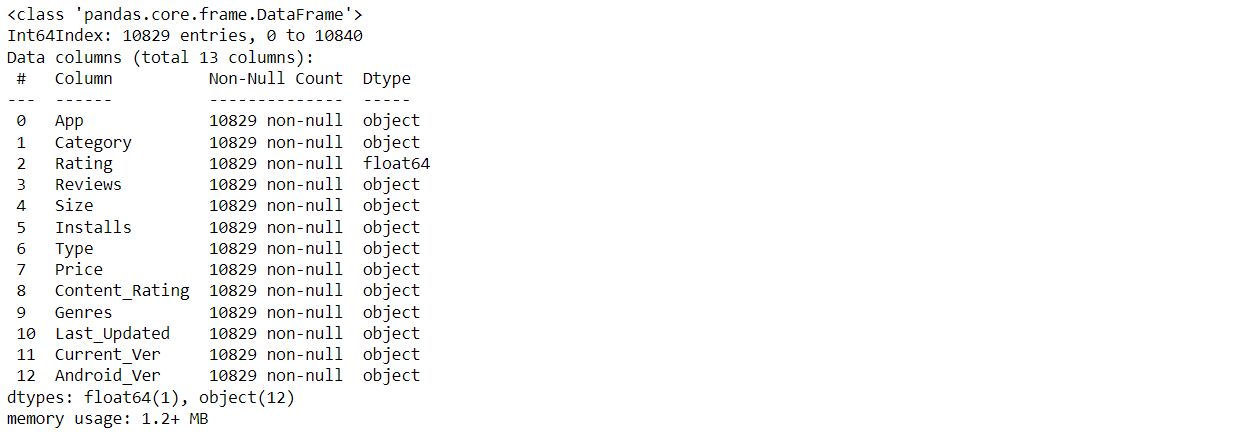

<a id='research-queries'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Research Queries and Analytical Insights</b></p>
![](https://neilpatel.com/wp-content/uploads/2021/03/Data-Visualization_Featured-Image-1.png)

## <font color='green'><b> What are the top categories in terms of the number of apps?</b><font color='black'> 

We create a bar chart showing the frequency of values in the Type column.

**type_counts = df[‘Type’].value_counts():** This line calculates how many times each unique value in the Type column repeats and saves this information in the type_counts variable.

**plt.figure(figsize=(15, 10)):** This line sets the size for the chart to be created as 15x10.

**plt.bar(type_counts.index, type_counts.values, colour=[‘blue’, ‘orange’]):** This line draws the bar graph. type_counts.index are the values to be displayed on the x-axis (‘Free’ and ‘Paid’), type_counts.values are the values to be displayed on the y-axis (number of applications for each type).

**plt.xlabel(‘Application Type’), plt.ylabel(‘Application Count’), plt.title(‘Application Count by Application Type’):** These lines add labels to the x and y axes and give the chart a title.

**plt.show():** This line shows the graph.

In [62]:
# Get the number of values in the ‘Type’ column

type_counts = df['Type'].value_counts()
type_counts

Type
Free    9584
Paid     762
Name: count, dtype: int64

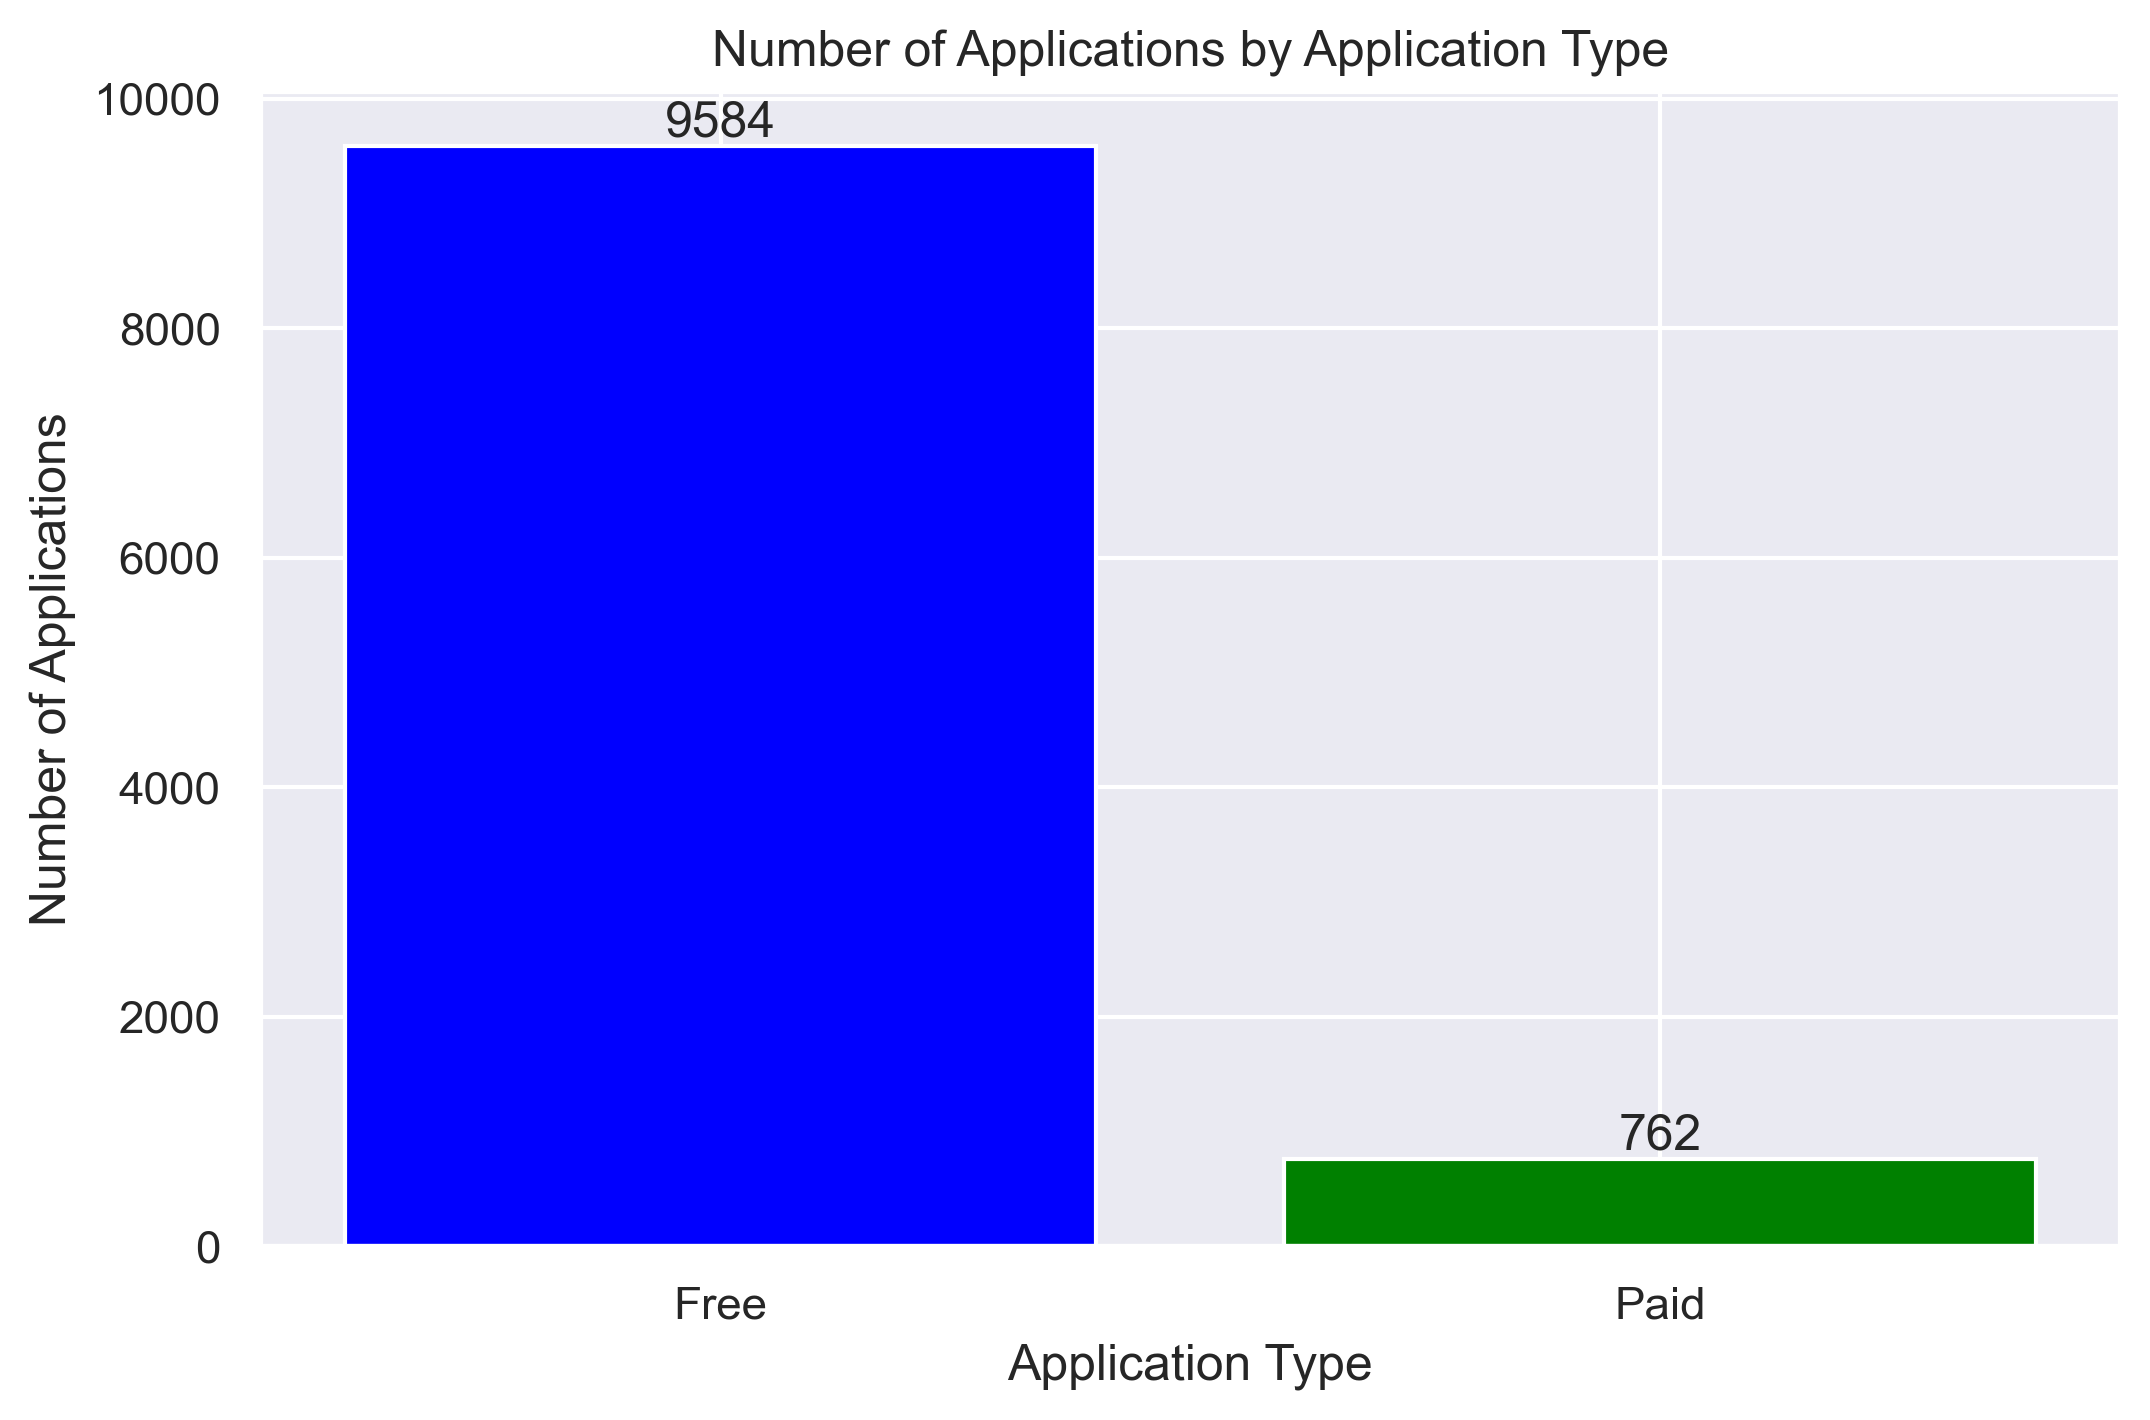

In [63]:
plt.figure(figsize=(8, 5))  # Adjust chart size
bars = plt.bar(type_counts.index, type_counts.values, color=['blue', 'green'])  # assign to variable ‘bars’

# Axis labels and title
plt.xlabel('Application Type')
plt.ylabel('Number of Applications')
plt.title('Number of Applications by Application Type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    
plt.show()

## <font color='green'> <b>What is the distribution of ratings by application type?</b><font color='black'> 

We draw a box plot of Rating values for each unique value (‘Free’ and ‘Paid’) in the Type column.

**plt.figure(figsize=(15, 10)):** This line sets the size for the plot to 15x10.

**sns.boxplot(...):** This line draws the box plot using the seaborn library. With the palette parameter, the colours blue (‘blue’) for ‘Free’ and green (‘green’) for ‘Paid’ are set.

**plt.xlabel(‘App Type’), plt.ylabel(‘Rating’), plt.title(‘Rating Distribution by App Type’):** These lines add labels to the x and y axes and give the plot a title.

**plt.show():** This line shows the graph.

In [64]:
average_ratings = df.groupby('Type')['Rating'].mean()
average_ratings

Type
Free    4.198560
Paid    4.269291
Name: Rating, dtype: float64

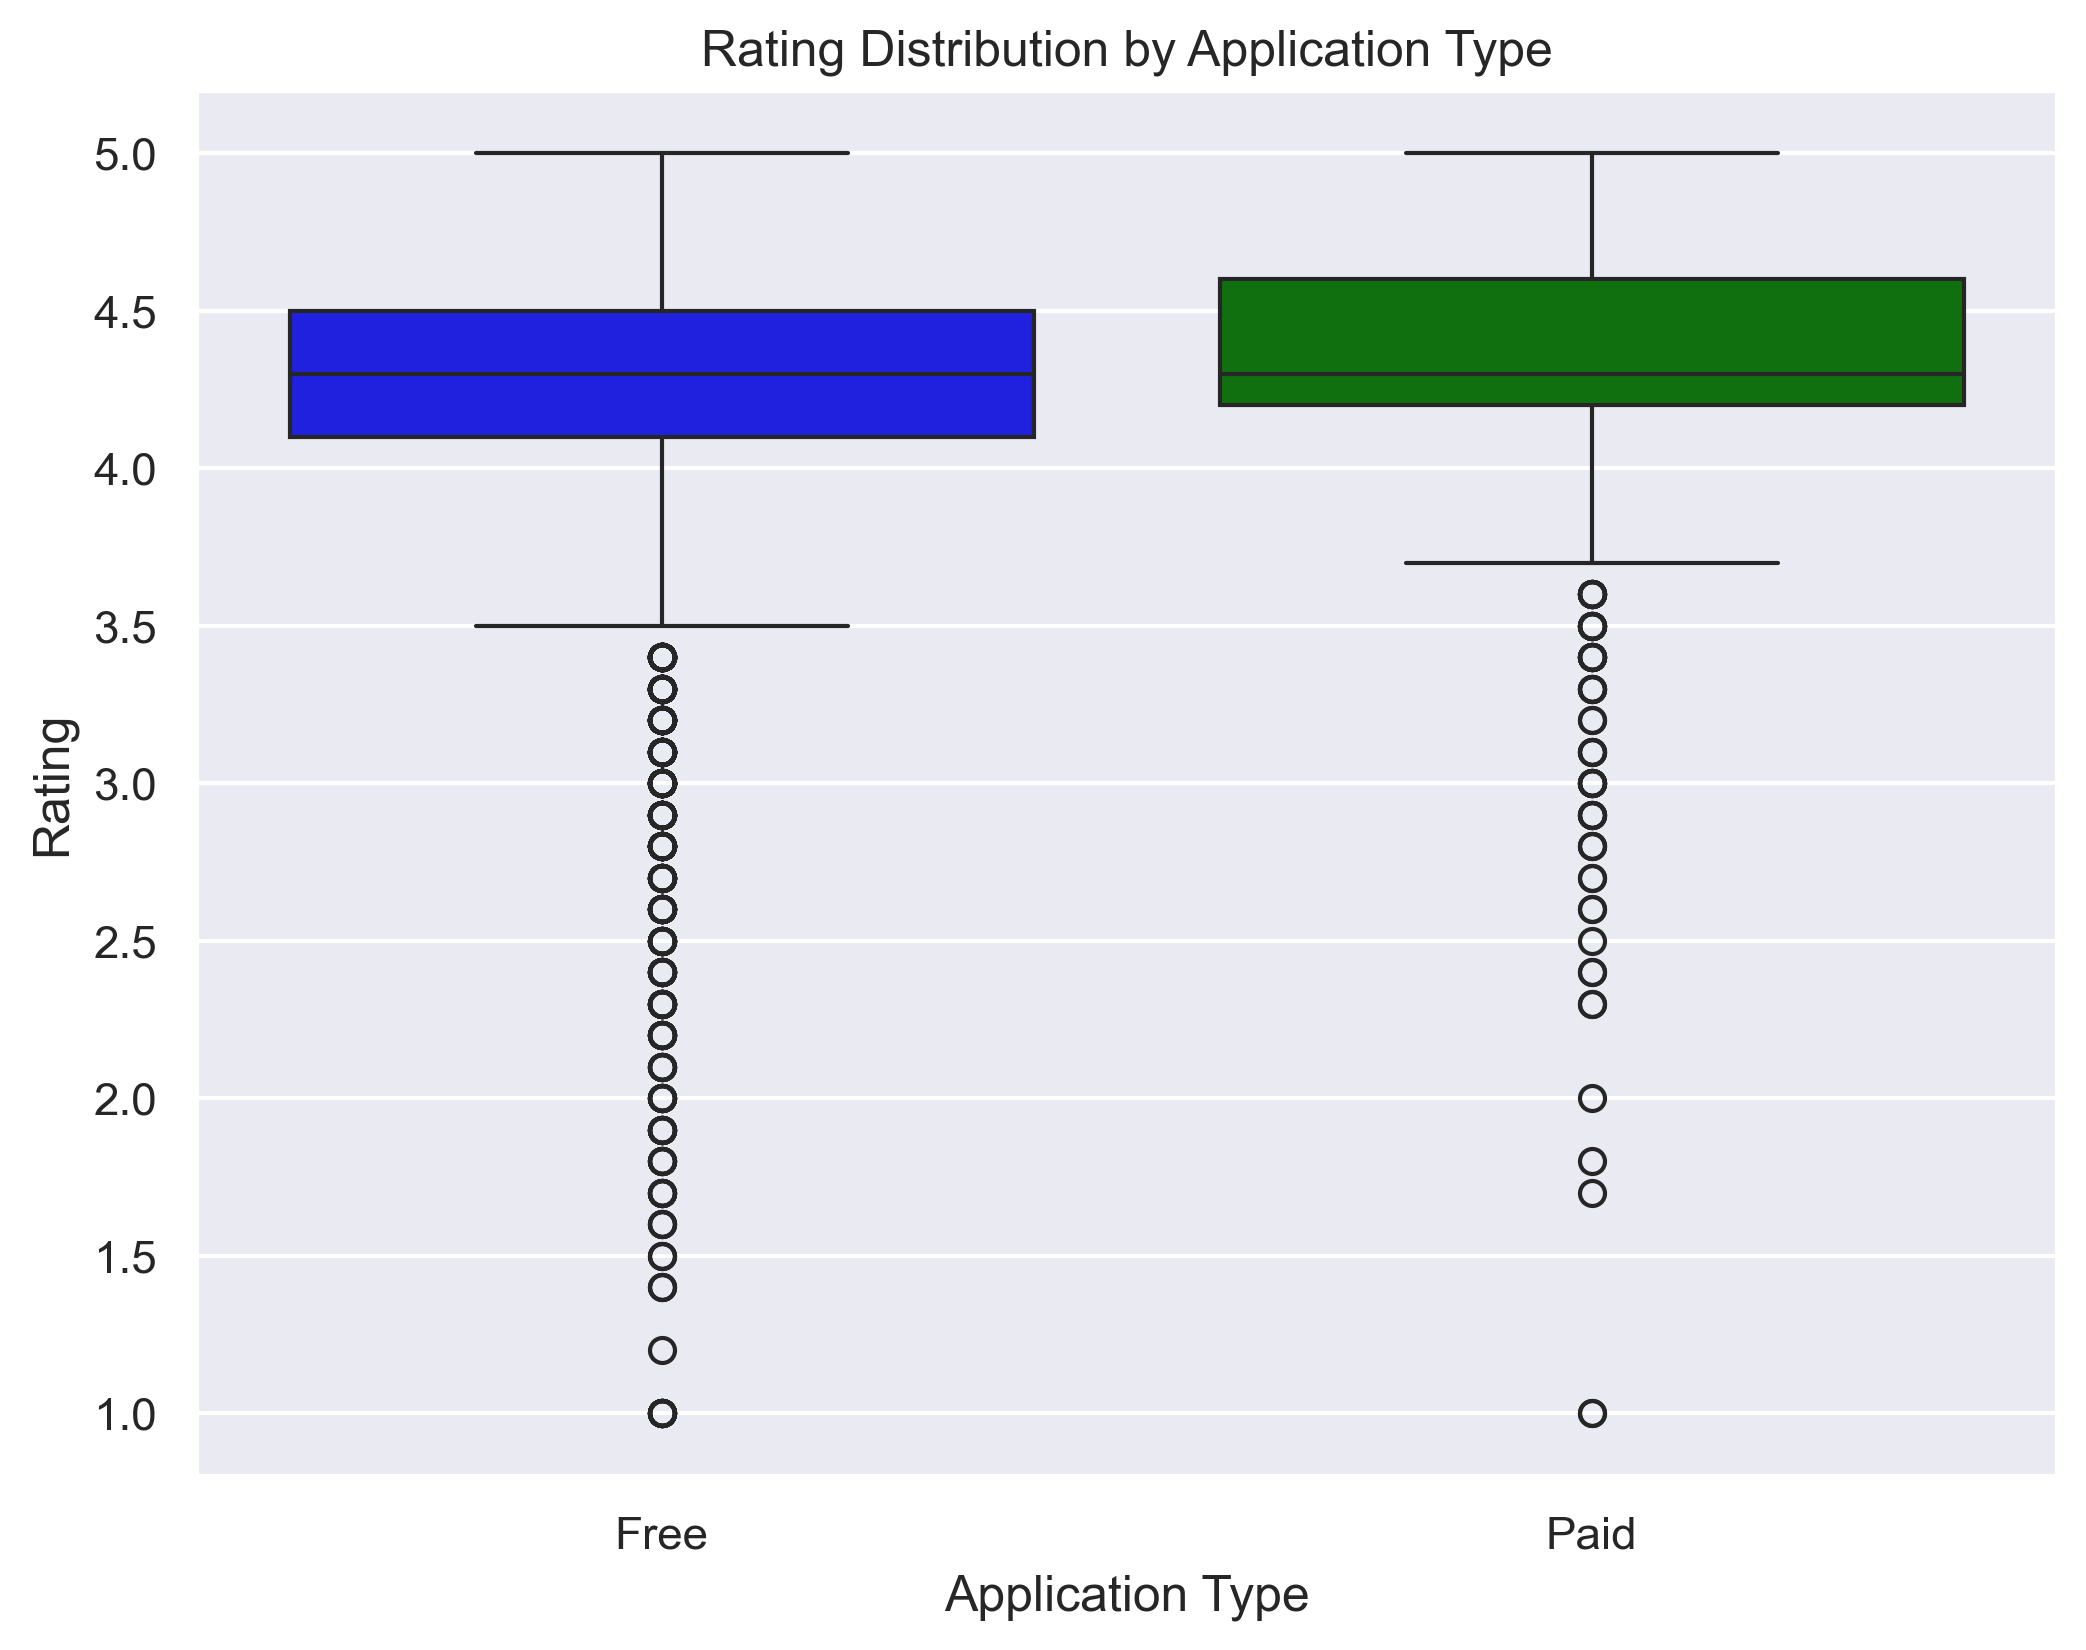

In [65]:
# Adjust chart size
plt.figure(figsize=(8, 6))

# Draw box plot and set colours with Seaborn library
sns.boxplot(x='Type', y='Rating', data=df, palette={"Free": "blue", "Paid": "green"}) # We can make whis=3

# Axis labels and title
plt.xlabel('Application Type')
plt.ylabel('Rating')
plt.title('Rating Distribution by Application Type')

# Show
plt.show()

**Bottom horizontal line (whisker) = Minimum (Lowest Value):** Represents the lowest value in the data set. However, this line ignores outliers.

**Upper horizontal line (whisker) = Maximum (Highest Value):** Represents the highest value in the data set. However, this line also ignores outliers.

**Bottom edge of the box = First Quarter (Q1):** Represents the first quarter (top 25%) of the data set.

**Top edge of the box = Third Quarter (Q3):** Represents the third quarter (top 75%) of the data set.

**Horizontal line inside the box = Median (Q2):** Represents the median (median value) of the data set.

- IQR (Interquartile Range):** The difference between the first and third quartiles, i.e. the height of the box. IQR indicates how widespread the data distribution is.

- Outliers:** Points outside the upper and lower horizontal lines represent outliers.

- Box:** Represents the area between the first quarter (Q1) and the third quarter (Q3) and shows the central distribution of the data set.

This chart allows you to compare the rating distributions of free and paid apps. For example, you can search for answers to questions such as whether free apps generally have higher ratings or paid apps have higher ratings. Also, the presence of outliers can be observed.

**NOT**

If you have a question such as why values outside the whisker are not considered as minimum or maximum, the following note will answer you.

- The ‘minimum’ and ‘maximum’ values shown in the box plot are actually called ‘whiskers’ that ignore outliers. That is, these lines show the range of values that covers most of the data set, but excludes outliers.

- These ‘whiskers’ are usually calculated using the IQR (interquartile range, i.e. Q3 - Q1). For example, the lower whisker is usually calculated with the formula ‘Q1 - 1.5* IQR’ and the upper whisker with the formula ‘Q3 + 1.5* IQR’. These formulae are designed to reflect the general structure of the data distribution and aim to exclude outliers.

- Therefore, the ‘minimum’ and ‘maximum’ values shown in the box plot are not the lowest and highest values of the entire data set. Instead, these values show a range that represents the majority of the data set and excludes outliers.

- box plot is designed to show a ‘typical’ range of the data set, but it also considers outliers. That is, the box plot shows both the central tendency (median, quartiles) and the spread of the data distribution (IQR, outliers) together.

## <font color='green'><b> What are the categories of ratings and their counts?</b><font color='black'> 

We show how frequent the different ‘Rating’ categories are in the dataset. 

**plt.figure(figsize=(15, 10)):** Sets the size for the graph to be created using the Matplotlib library. Width is set to 15 units and height is set to 10 units.

**sns.countplot(x=‘Rating’, data=df):** Draws a vertical bar plot showing the number of values in the ‘Rating’ column with the countplot function of the Seaborn library. The x parameter specifies which column to use, and the data parameter specifies the data frame.

**plt.title(‘Rating Categories and Counts’):** Sets the graph title.

**plt.xlabel(‘Rating Categories’) and plt.ylabel(‘Number of Applications’):** Sets the labels of X and Y axes.

**plt.show():** Draws the graph on the screen.

- Which score category has the most or least observations?

- How is the score distribution (e.g., are most applications high-scoring or low-scoring?)?

- Is there an apparent imbalance between score categories?

In [66]:
rating_counts = df['Rating'].value_counts().sort_index()
rating_counts

Rating
1.0      16
1.2       1
1.4       3
1.5       3
1.6       4
1.7       8
1.8       8
1.9      12
2.0      12
2.1       8
2.2      14
2.3      20
2.4      19
2.5      20
2.6      24
2.7      23
2.8      40
2.9      45
3.0      82
3.1      69
3.2      63
3.3     101
3.4     127
3.5     157
3.6     169
3.7     231
3.8     293
3.9     372
4.0     538
4.1     656
4.2     887
4.3    2476
4.4    1031
4.5     976
4.6     768
4.7     484
4.8     228
4.9      87
5.0     271
Name: count, dtype: int64

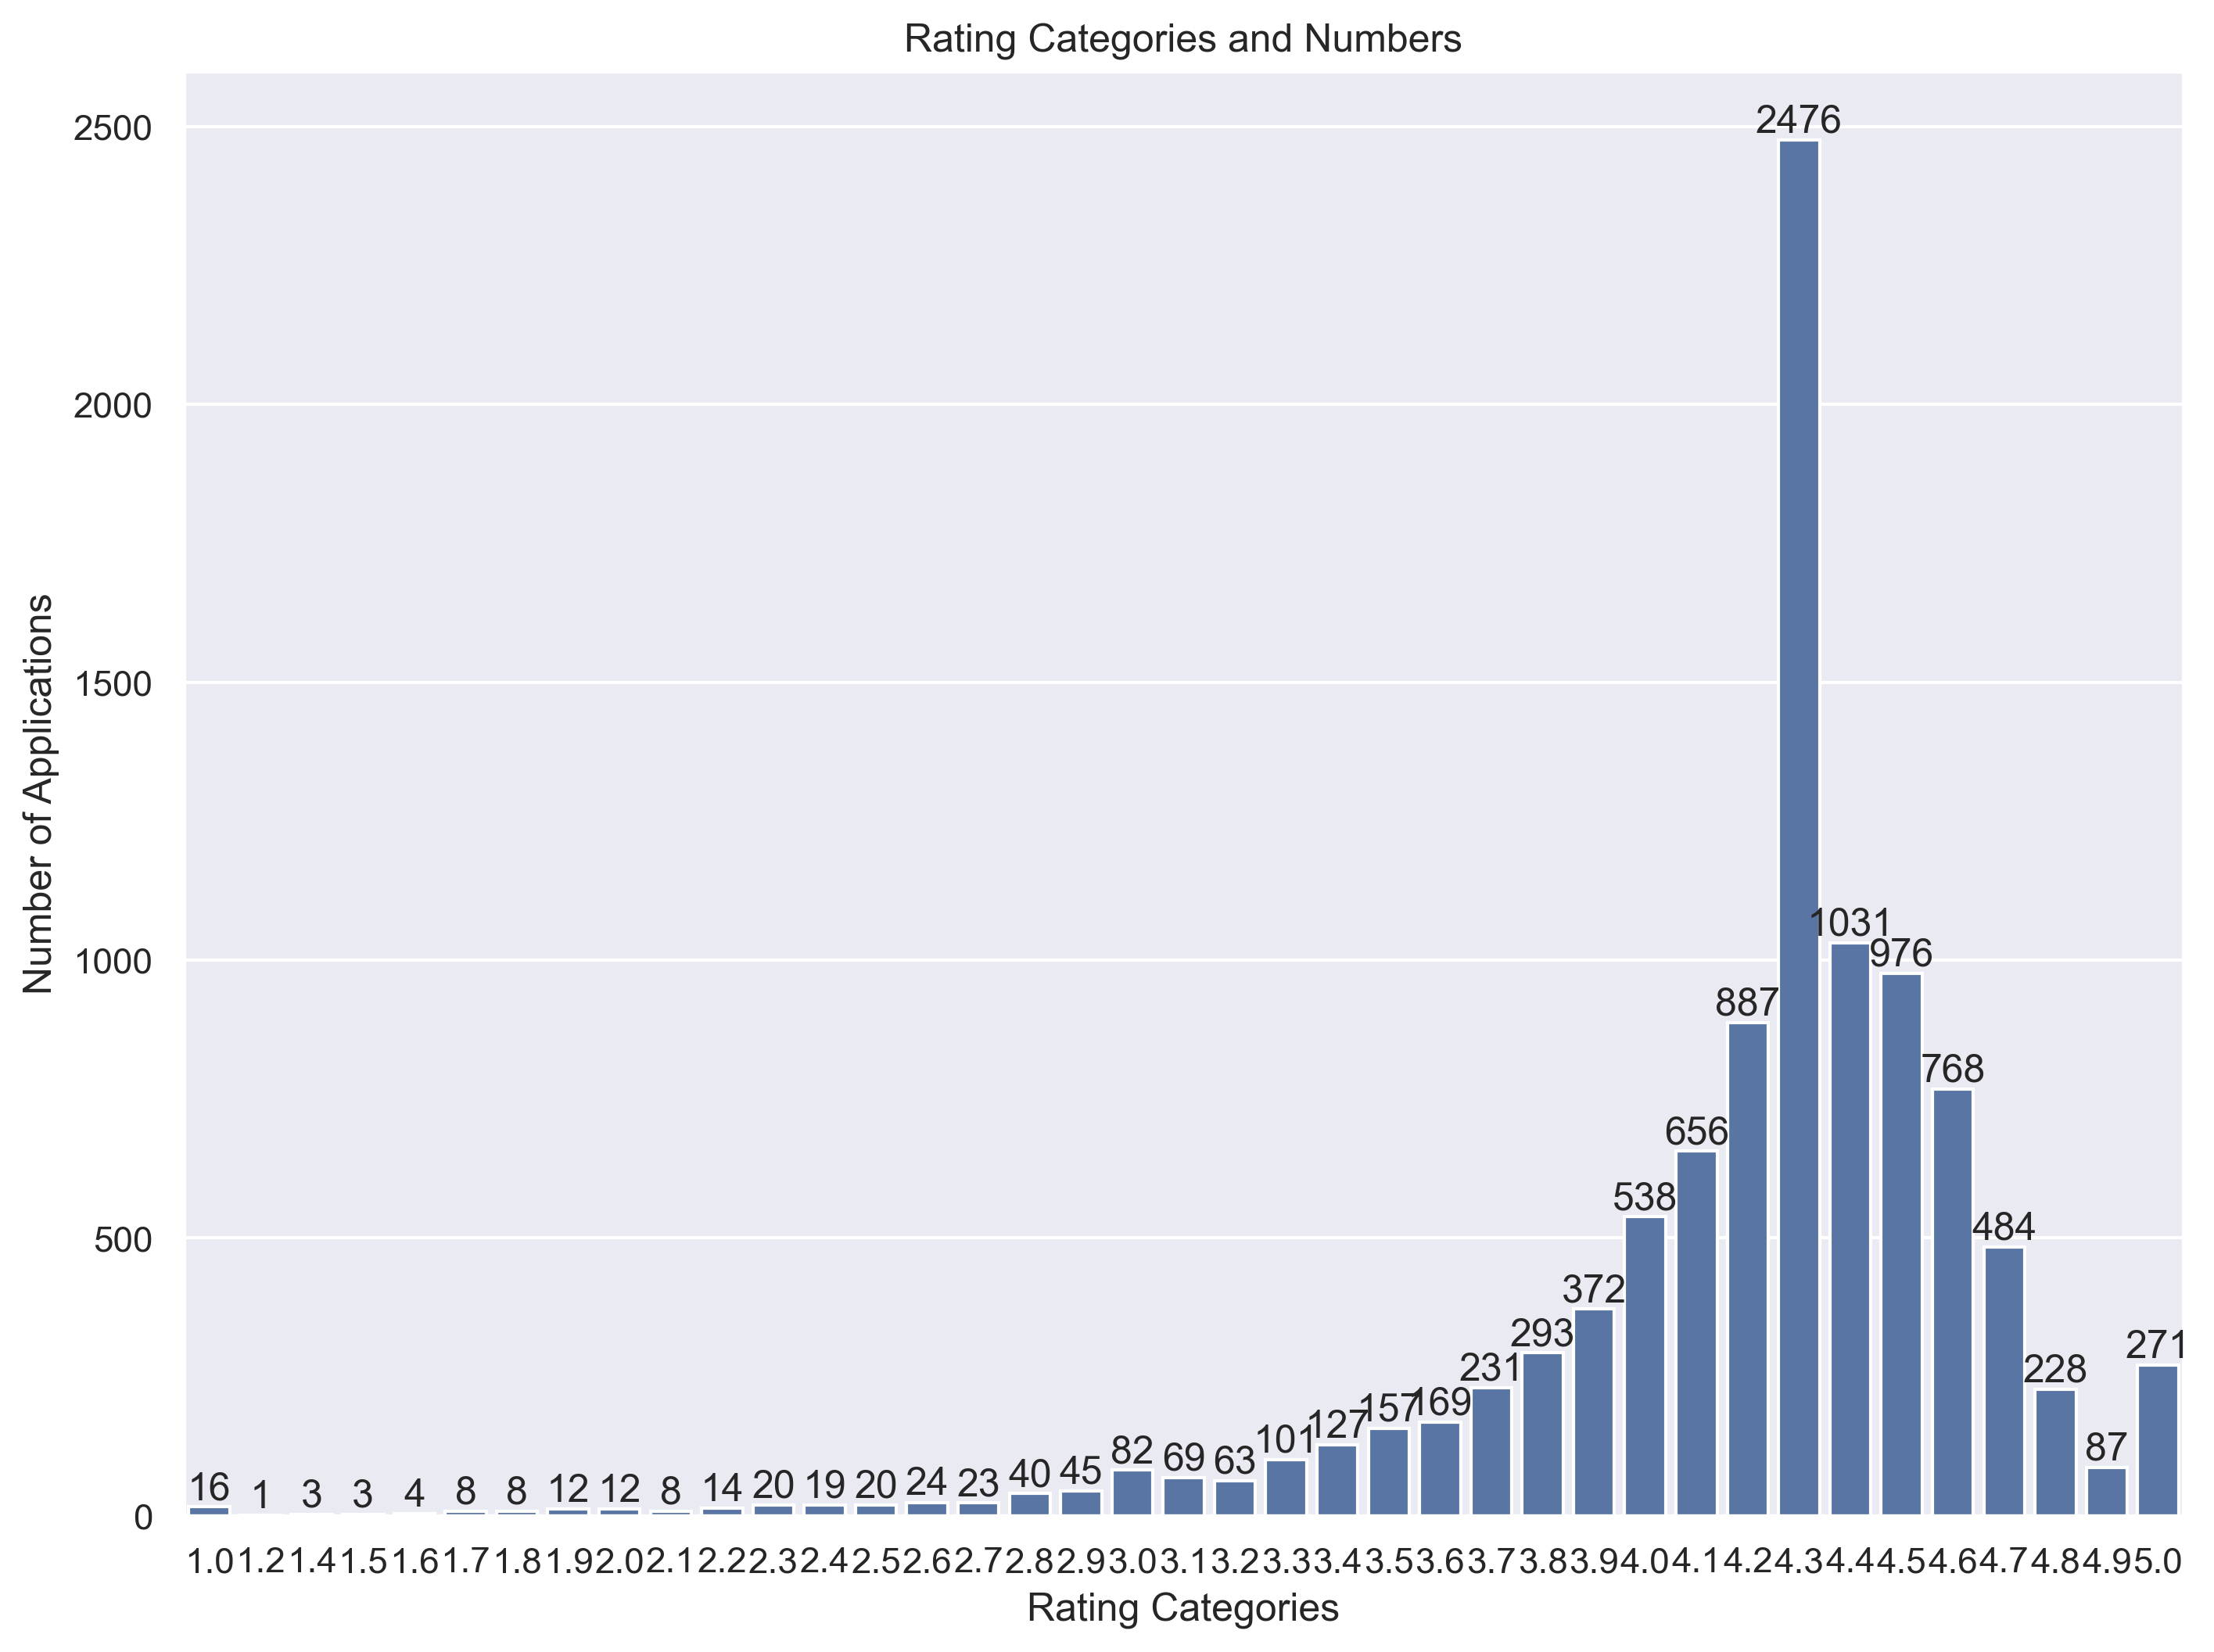

In [67]:
# Adjust chart size
plt.figure(figsize=(11,8))

# Draw vertical bar plot with Seaborn
ax = sns.countplot(x="Rating", data=df) #For sorting , order=df['Rating'].value_counts().sort_index().index

for container in ax.containers:
    ax.bar_label(container)

# Chart title
plt.title("Rating Categories and Numbers")

# Axis labels
plt.xlabel("Rating Categories")
plt.ylabel("Number of Applications")

# Graphical representation
plt.show()

We show the distribution of applications in the dataset by ‘Content Rating’ categories. 

**plt.figure(figsize=(15, 10)):** Sets the chart size.

**sns.countplot(y=‘Content_Rating’, data=df, order = df[‘Content_Rating’].value_counts().index):** Draws a horizontal bar plot showing the number of values in the ‘Content_Rating’ column. The y parameter specifies which column to use. The order parameter sorts the bars from highest to lowest number.

**plt.title(‘Content Ratings and Counts’):** Sets the chart title.

**plt.xlabel(‘Application Count’) and plt.ylabel(‘Content Rating’):** Sets the labels of the X and Y axes.

**plt.show():** Draws the graph on the screen.

- Which content rating is the most common or the rarest?

- What is the distribution of content ratings?

- How many apps are available for a specific age group or target audience?

In [68]:
content_rating_counts = df['Content_Rating'].value_counts()
content_rating_counts

Content_Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

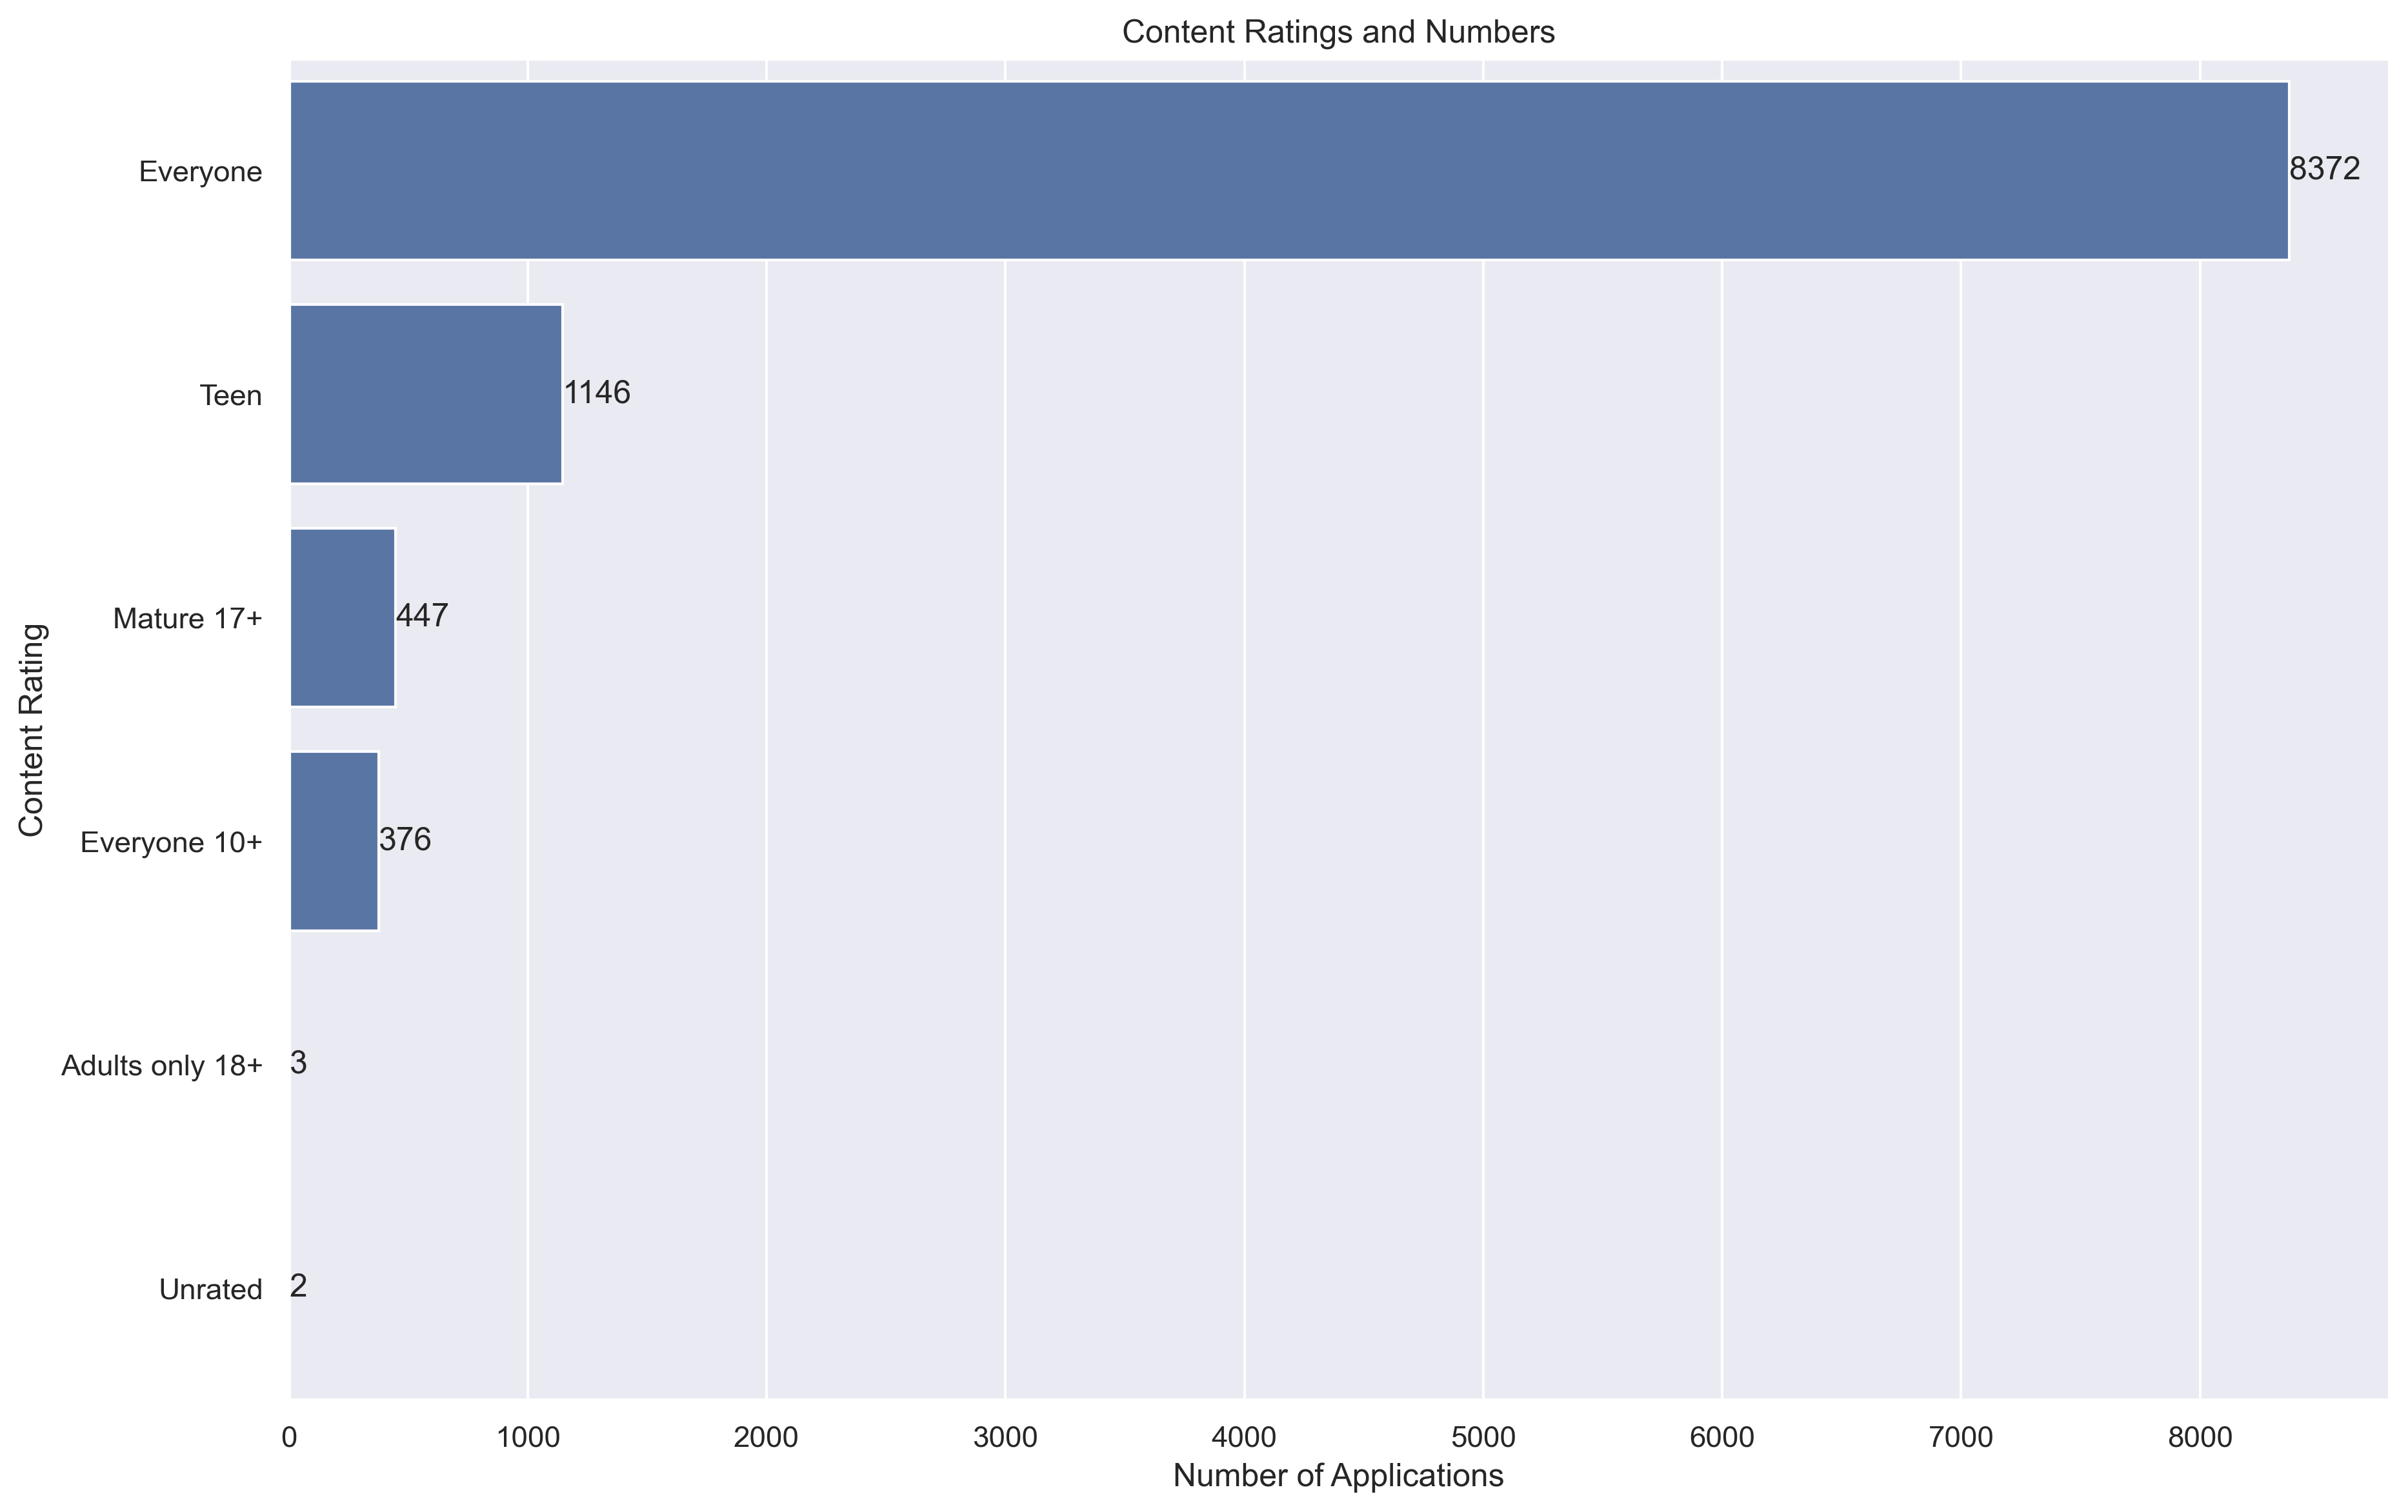

In [69]:
# Adjust chart size
plt.figure(figsize=(14, 9))

# Draw horizontal bar plot with Seaborn
ax = sns.countplot(y="Content_Rating", data=df, order = df['Content_Rating'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container)

# Chart title
plt.title("Content Ratings and Numbers")

# Axis labels
plt.xlabel("Number of Applications")
plt.ylabel("Content Rating")

# Graphical representation
plt.show()

## <font color='green'> <b>How Does Content Rating Affect User Ratings in Apps?</b><font color='black'>

We show the distribution of user ratings (‘Rating’) of Android apps with different ‘Content Rating’ categories.

**plt.figure(figsize=(15, 10)):** Sets the chart size. Width is set to 15 units and height is set to 10 units. (This line is missing in the code, if you want to add it.)

**sns.boxplot(x = ‘Content_Rating’, y = ‘Rating’, data = df):** Draws a box plot showing the distribution of the ‘Rating’ column according to the categories in the ‘Content_Rating’ column with the boxplot function of the Seaborn library. The x and y parameters specify which columns to use, and the data parameter specifies the data frame.

**plt.title(‘The content rating & rating’, size=20):** Sets the chart title and title size.

- What is the score distribution of each content rating category?

- Which content rating category has the highest or lowest average score?

- Are there significant differences in score distribution between content rating categories?

In [70]:
average_ratings_by_content = df.groupby('Content_Rating')['Rating'].mean()
average_ratings_by_content

Content_Rating
Adults only 18+    4.300000
Everyone           4.199164
Everyone 10+       4.256117
Mature 17+         4.138479
Teen               4.245462
Unrated            4.200000
Name: Rating, dtype: float64

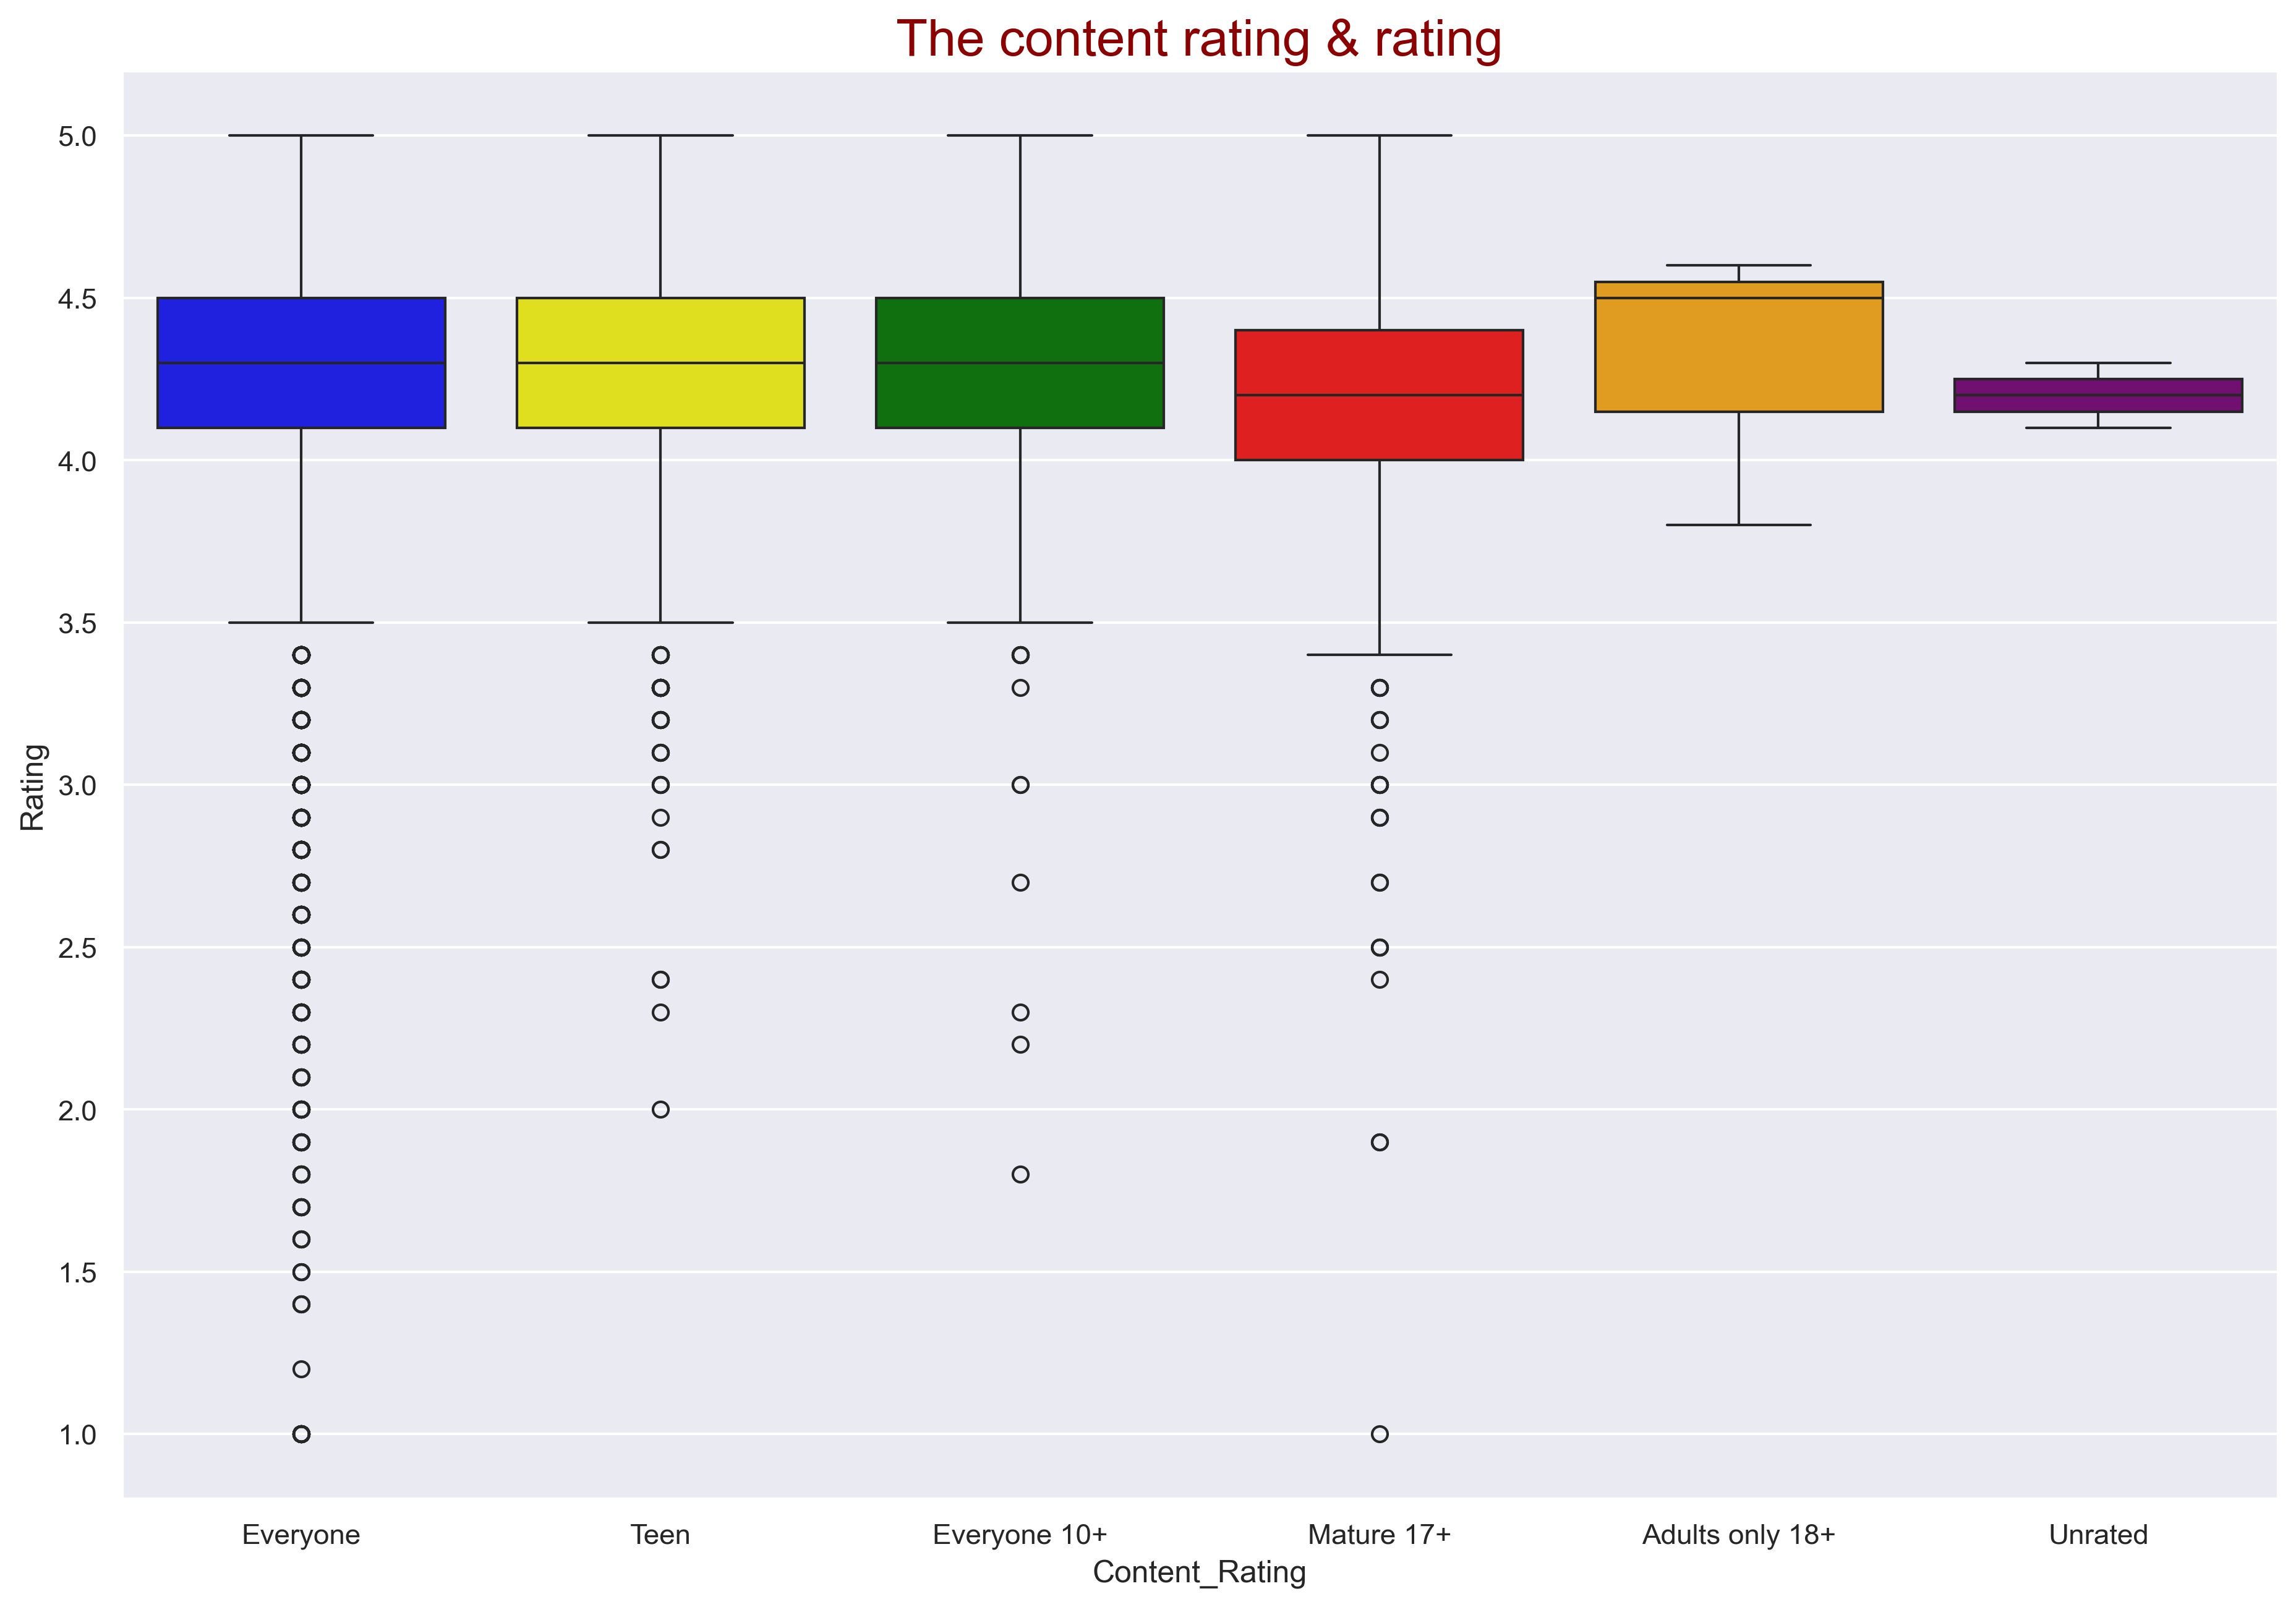

In [72]:
# Adjust chart size
plt.figure(figsize=(15, 10))

# Draw box plot with Seaborn
# The ‘x’ and ‘y’ parameters determine which columns to use
# The ‘data’ parameter defines the data frame
# The ‘palette’ parameter sets the colours for each ‘Content_Rating’ category
sns.boxplot(x="Content_Rating", y="Rating", data=df, palette={"Everyone": "blue", 
                                                              "Teen": "yellow", 
                                                              "Everyone 10+": "green",
                                                              "Mature 17+": "red",
                                                              "Adults only 18+": "orange",
                                                              "Unrated": "purple"})

# Chart title and title properties
# Set a dictionary for the title with the ‘fontdict’ parameter
# sets the header size to 20 with the ‘fontsize’ switch and sets the header colour to ‘darkred’ with the ‘colour’ switch
plt.title("The content rating & rating", fontdict={'fontsize': 20, 'color': 'darkred'})

# Graphical representation
plt.show()

As you can see, the rating is almost the same for Everyone, Teen and Everyone 10+. 

Everyone has more outliers than the other categories.

Mature 17+ has the lowest average, while the Adults only 18+ category has a higher average rating than the others.

## <font color='green'> <b>What Is the Number of Applications in Each Category?</b><font color='black'>

**Code Description**

**plt.figure(figsize=(15, 10)):** Sets the size for the graph to be created using the Matplotlib library. Width is set to 15 units and height is set to 10 units.

**sns.countplot(y=‘Category’, data=df, order=df[‘Category’].value_counts().index):** The countplot function of the Seaborn library draws a horizontal bar plot showing the number of values in the ‘Category’ column. The y parameter specifies which column to use, the data parameter specifies the data frame.

**plt.title(‘Number of Applications by Category’, fontdict={‘fontsize’: 20, ‘color’: ‘darkred’}):** Sets the chart title and title size. fontdict parameter sets a dictionary for the title. fontsize sets the title size to 20 and colour sets the title colour to ‘darkred’.

**plt.xlabel(‘Number of Applications’) and plt.ylabel(‘Categories’):** Sets the labels of X and Y axes.

**plt.show():** Draws the graph on the screen.

In [73]:
category_counts = df['Category'].value_counts()
category_counts

Category
Family                 1939
Game                   1121
Tools                   841
Business                427
Medical                 408
Productivity            407
Personalization         386
Lifestyle               373
Communication           366
Finance                 360
Sports                  351
Photography             322
Health and fitness      306
Social                  280
News and magazines      264
Travel and local        237
Books and reference     229
Shopping                224
Dating                  196
Video players           175
Maps and navigation     137
Education               130
Food and drink          124
Entertainment           111
Auto and vehicles        85
Libraries and demo       84
Weather                  82
House and home           80
Events                   64
Art and design           64
Parenting                60
Comics                   60
Beauty                   53
Name: count, dtype: int64

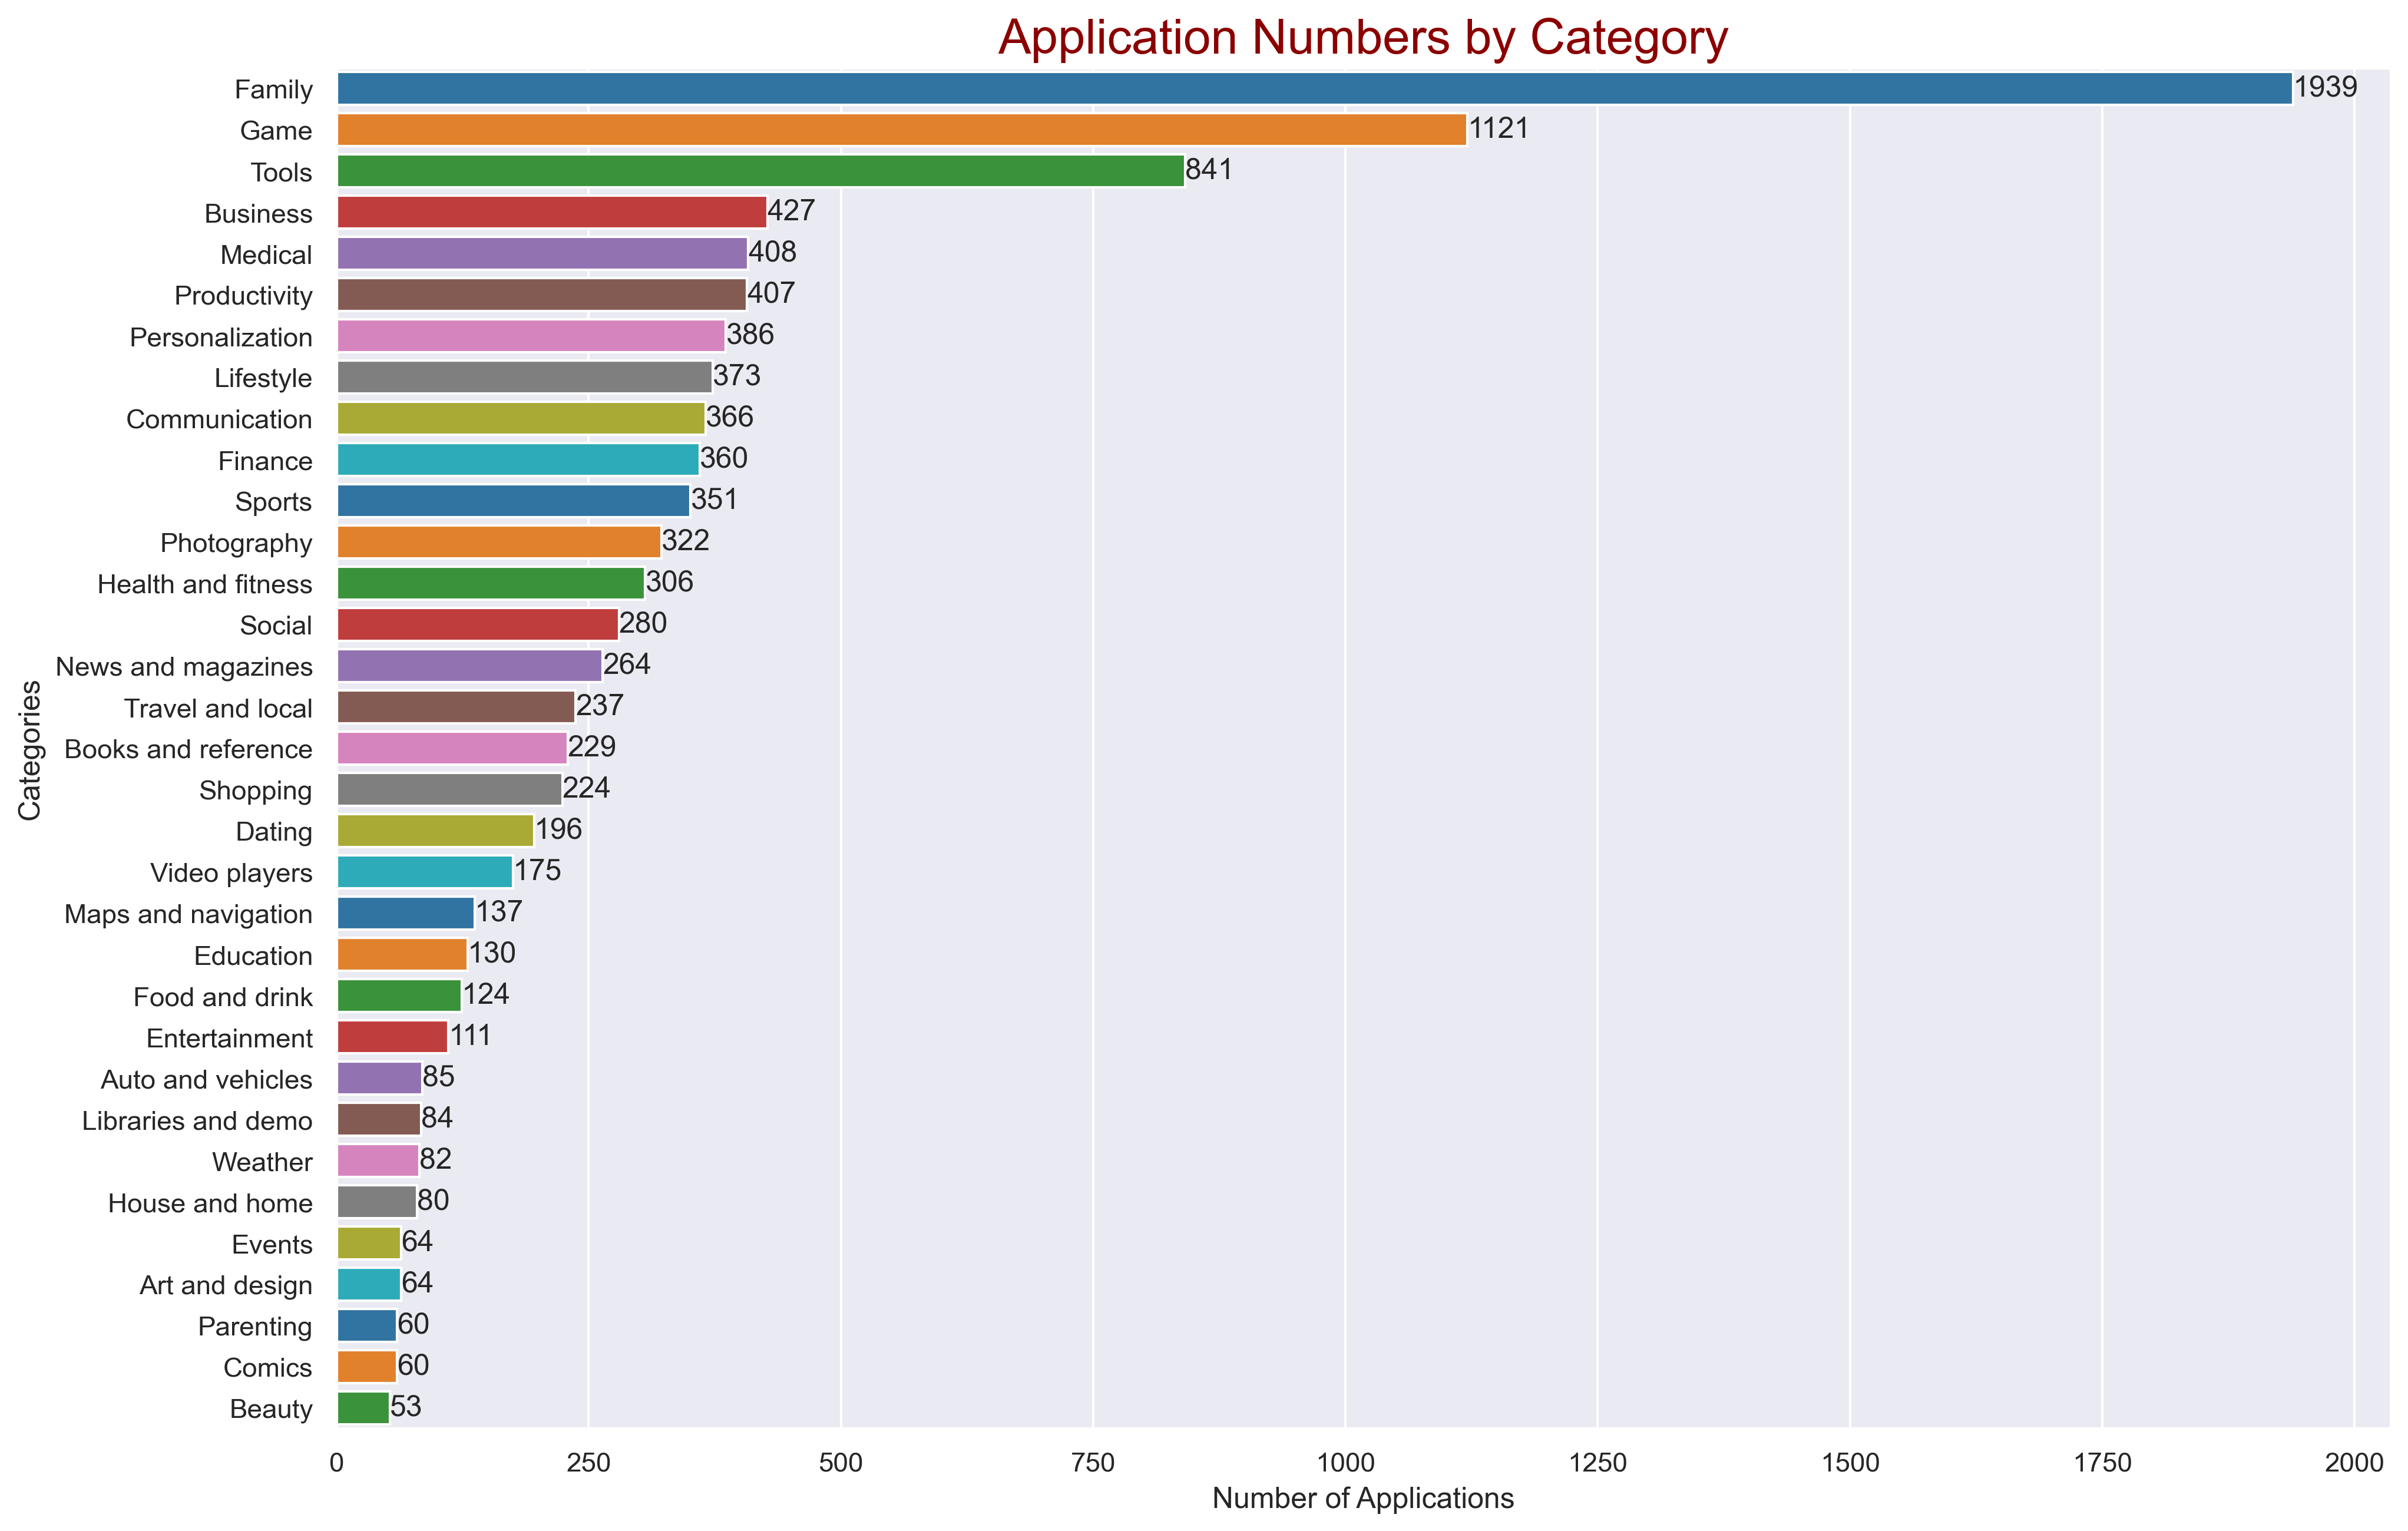

In [74]:
# Adjust chart size
plt.figure(figsize=(15, 10))

# Draw a horizontal bar plot with Seaborn. If I say y, it will draw a horizontal bar plot since it will use the y axis.
# The ‘y’ parameter determines which column to use, and the ‘data’ parameter determines the data frame
ax = sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index, palette='tab10')

for container in ax.containers:
    ax.bar_label(container)
    
# Chart title and title properties
plt.title("Application Numbers by Category", fontdict={'fontsize': 20, 'color': 'darkred'})

# Axis labels
plt.xlabel("Number of Applications")
plt.ylabel("Categories")

# Graphical representation
plt.show()

The most applications are in the Family category, followed by Game, then Tools.

## <font color='green'> <b>Which Categories Have the Highest Total Spending in Apps?</b><font color='black'>

We draw a bar chart showing the 5 most spent categories in the Google Play Store and how much total spending is made on these categories.

**total_spending_by_category = df.groupby(‘Category’)[‘Price’].sum().sort_values(ascending=False): Calculate total spending by categories:** By grouping by the ‘Category’ column, we calculate how much total spending was made in each category.

**top5_categories = total_spending_by_category.nlargest(5): Select the top 5 categories:** We select the top 5 categories by sorting the total expenditures from largest to smallest.

**plt.figure(figsize=(15, 10)): Draw a bar chart:** We draw a bar chart showing the 5 selected categories and the total spending on these categories. We set the size of the graph as (15, **plt.xlabel(‘Category’)
plt.ylabel(‘Total Expenditure’)
plt.title(‘Top 5 Spending Categories’)
Axis labels and title:** We add the labels ‘Category’ on the X axis and ‘Total Expenditure’ on the Y axis. As the title of the chart, we use ‘Top 5 Spent Categories’.

**plt.show(): Show:** We show the chart on the screen.

- Which categories have the highest total price? 

- Which categories might have higher pricing strategies?bilir?

In [75]:
# Calculate total spend by category
total_spending_by_category = df.groupby('Category')['Price'].sum().sort_values(ascending=False)
total_spending_by_category

Category
Finance                2900.83
Family                 2419.83
Lifestyle              2360.87
Medical                1020.69
Game                    287.30
Tools                   266.26
Productivity            250.93
Business                175.29
Personalization         149.98
Photography             122.23
Books and reference     119.77
Events                  109.99
Sports                  100.00
Communication            83.14
Health and fitness       64.35
Travel and local         49.95
Weather                  32.42
Dating                   31.43
Maps and navigation      26.95
Education                17.96
Social                   15.97
Auto and vehicles        13.47
Video players            10.46
Parenting                 9.58
Food and drink            8.48
Entertainment             7.98
Art and design            5.97
Shopping                  5.48
News and magazines        3.98
Libraries and demo        0.99
Comics                    0.00
Beauty                    0.00

In [76]:
top5_categories = total_spending_by_category.nlargest(5)
top5_categories

Category
Finance      2900.83
Family       2419.83
Lifestyle    2360.87
Medical      1020.69
Game          287.30
Name: Price, dtype: float64

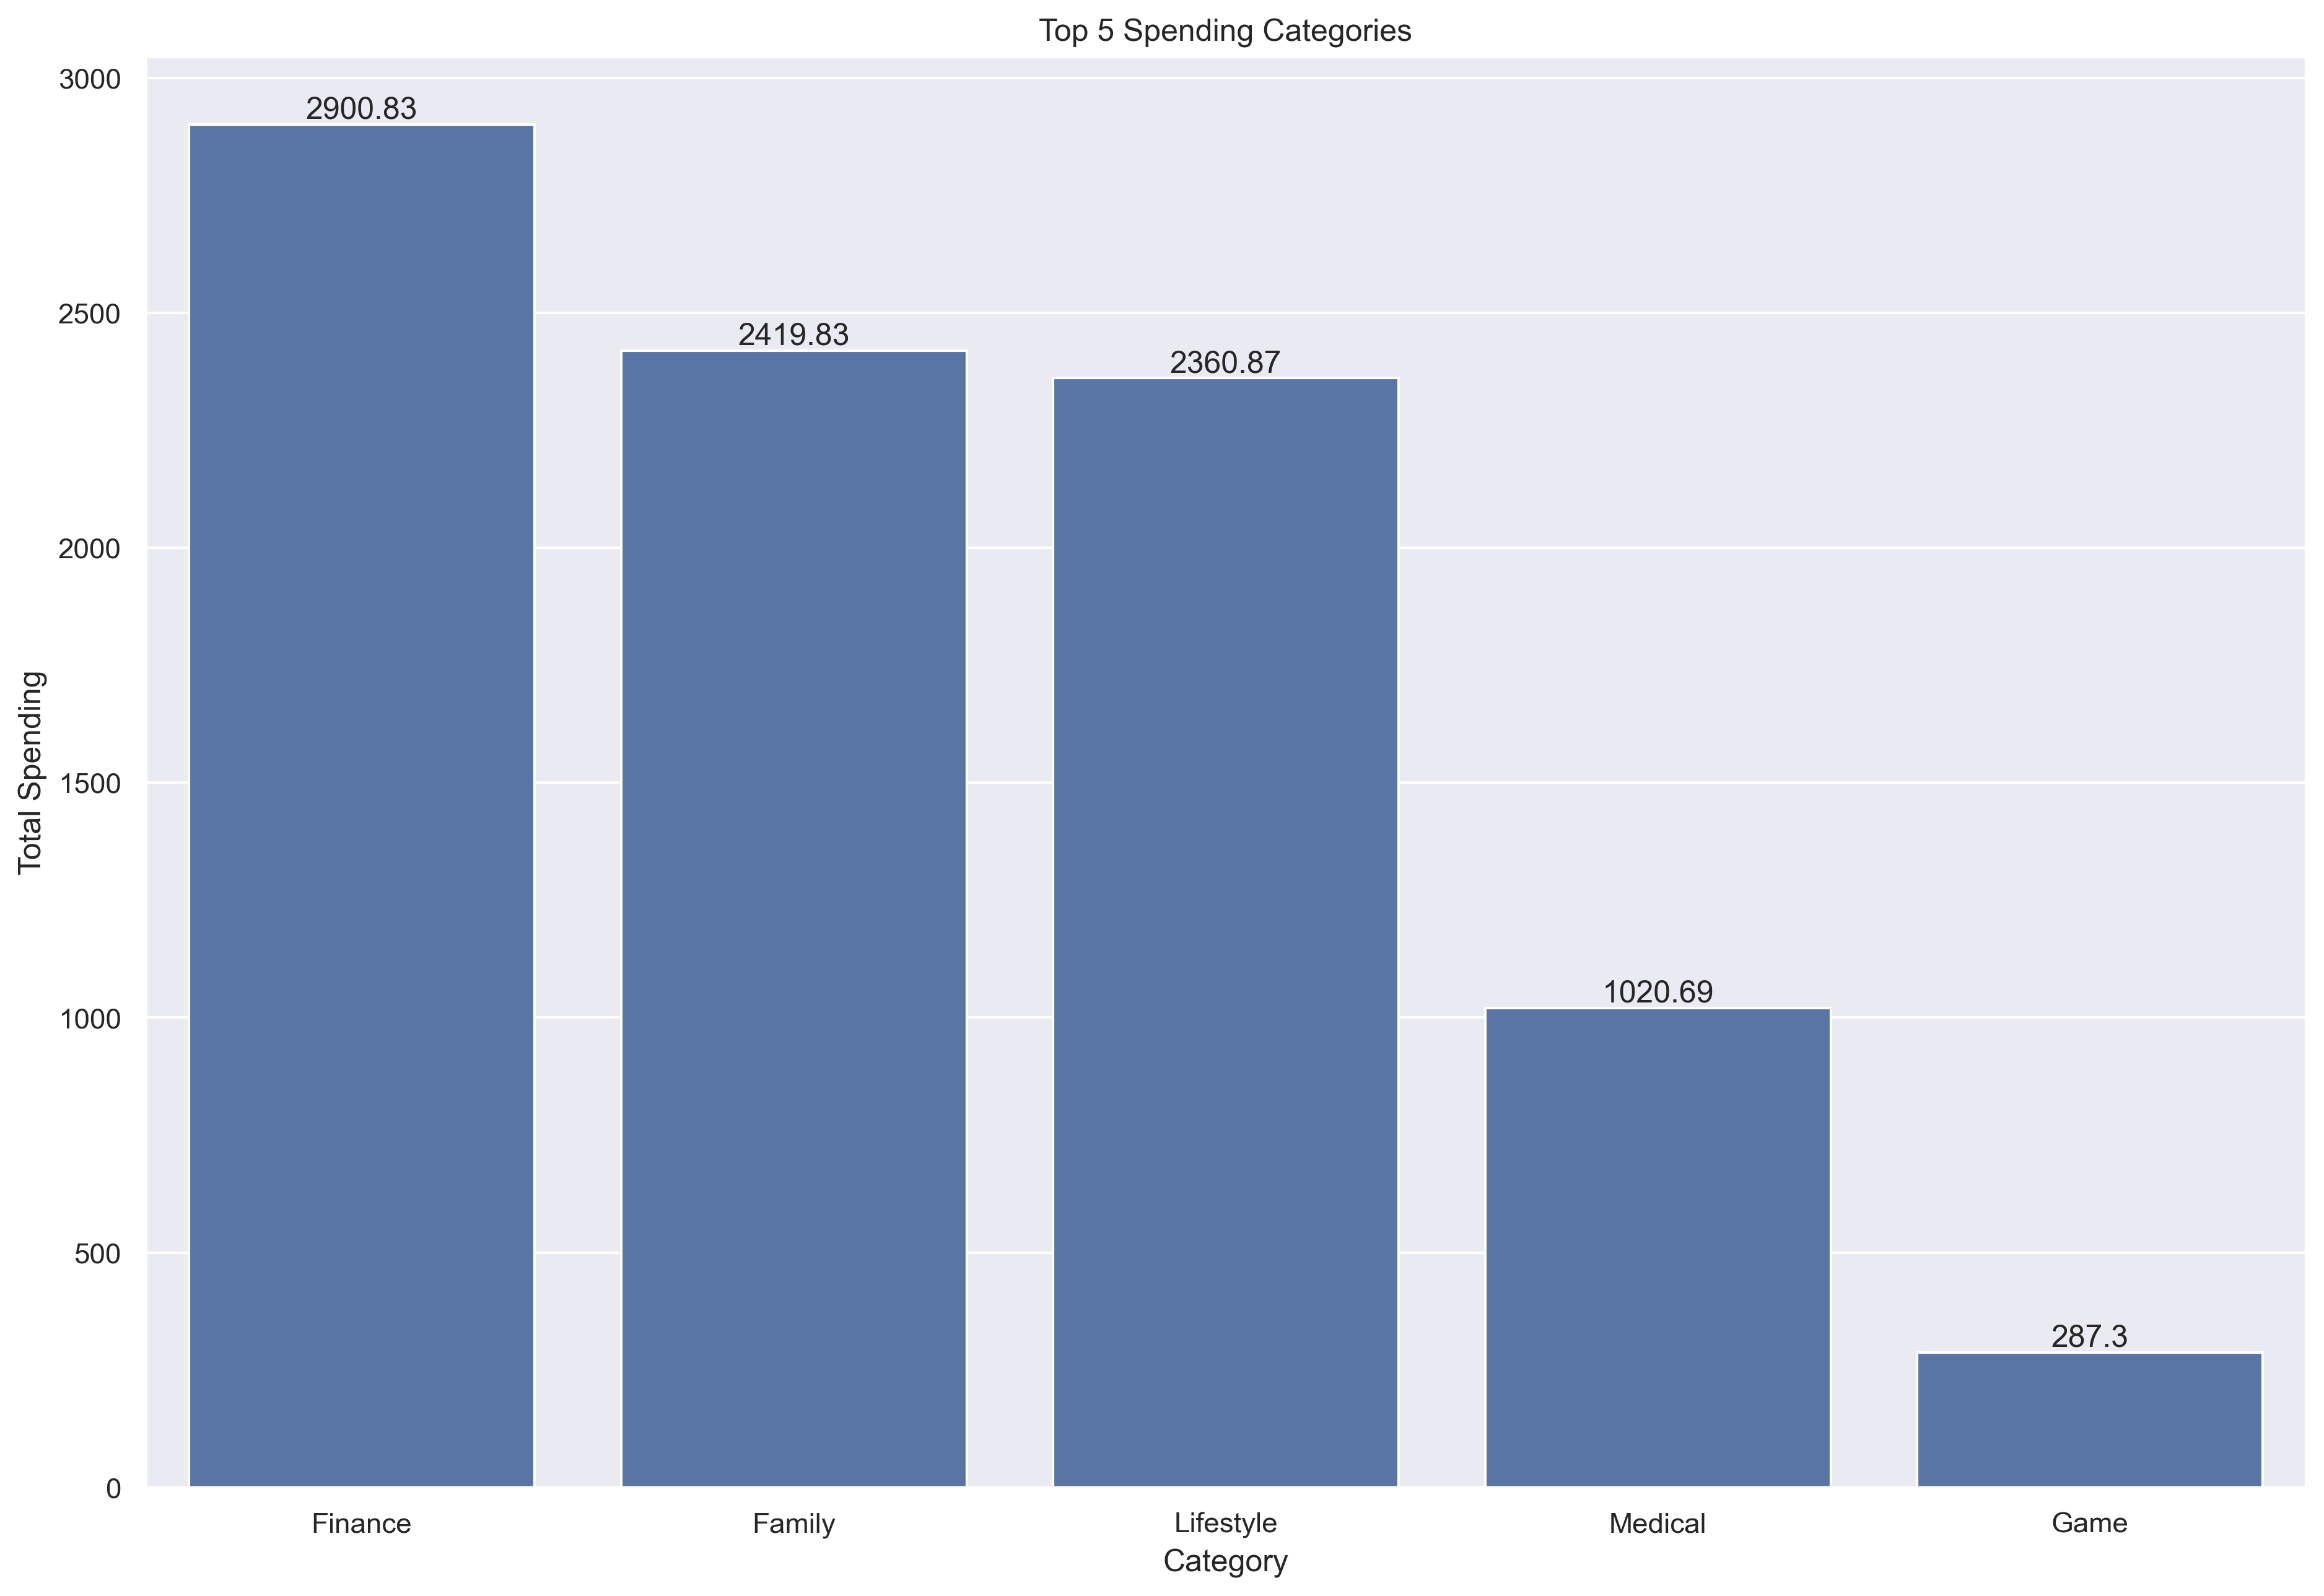

In [77]:
# Draw a bar graph
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=top5_categories.index, y=top5_categories.values, order=top5_categories.index)

# Axis labels and title
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Top 5 Spending Categories')

for container in ax.containers:
    ax.bar_label(container)

# Show
plt.show()

## <font color='green'> <b>What Are the Most Common Words in the Names of Google Play Store Apps?</b><font color='black'>

We want to get an idea of what words or terms are frequently used in the Google Play Store.

**text = ‘ “.join(df[”App’])** (‘df’) We join all the app names in the ‘App’ column. We create a single large text by putting a space between each name.

**wordcloud = WordCloud(width=800, height=400, background_colour=‘white’).generate(text)** We create a word cloud (WordCloud) using the generated large text. We specify the dimensions of the word cloud (800x400) and the background colour (white). **The **generate() method generates the word cloud from the text.

**plt.figure(figsize=(10, 5))** we specify the dimensions of the visualisation. The width is set to 10 units and the height to 5 units.

**plt.imshow(wordcloud, interpolation=‘bilinear’)** We use the **imshow()** function to display the word cloud. The ‘bilinear’ interpolation makes the image look smoother.

**plt.axis(‘off’)** we hide the axis information in the graph. That is, labels and numbers on the x and y axis will not be di**plt.title(‘Google Play Store Apps Word Cloud’)** we specify the title of the visualisation.

**plt.show()** draws the visualisation on the screen.

It shows which words or terms are frequently used by app names in the Google Play Store.

Frequently occurring words are shown larger and more prominently.

This type of visualisation is often used to quickly and effectively see which words or terms are most common in text. 

- Which words or terms are frequently used in app names?
- What are the characteristic words or terms for a particular category or genre (if you have filtered the data by categories)?
- Is there a particular niche or trend in the market?

This type of analysis can be useful for app developers, for example, when choosing an app name or assessing the competition in the market.ndirirken.

In [ ]:
# pip install wordcloud

In [78]:
from wordcloud import WordCloud

In [79]:
# Aggregate all application names in the ‘App’ column
text = ' '.join(df['App'])
text

'Photo Editor & Candy Camera & Grid & ScrapBook Coloring book moana U Launcher Lite – FREE Live Cool Themes, Hide Apps Sketch - Draw & Paint Pixel Draw - Number Art Coloring Book Paper flowers instructions Smoke Effect Photo Maker - Smoke Editor Infinite Painter Garden Coloring Book Kids Paint Free - Drawing Fun Text on Photo - Fonteee Name Art Photo Editor - Focus n Filters Tattoo Name On My Photo Editor Mandala Coloring Book 3D Color Pixel by Number - Sandbox Art Coloring Photo Designer - Write your name with shapes 350 Diy Room Decor Ideas FlipaClip - Cartoon animation ibis Paint X Logo Maker - Small Business Boys Photo Editor - Six Pack & Men\'s Suit Superheroes Wallpapers | 4K Backgrounds Mcqueen Coloring pages HD Mickey Minnie Wallpapers Harley Quinn wallpapers HD Colorfit - Drawing & Coloring Animated Photo Editor Pencil Sketch Drawing Easy Realistic Drawing Tutorial Pink Silver Bow Keyboard Theme Art Drawing Ideas Anime Manga Coloring Book Easy Origami Ideas I Creative Idea How

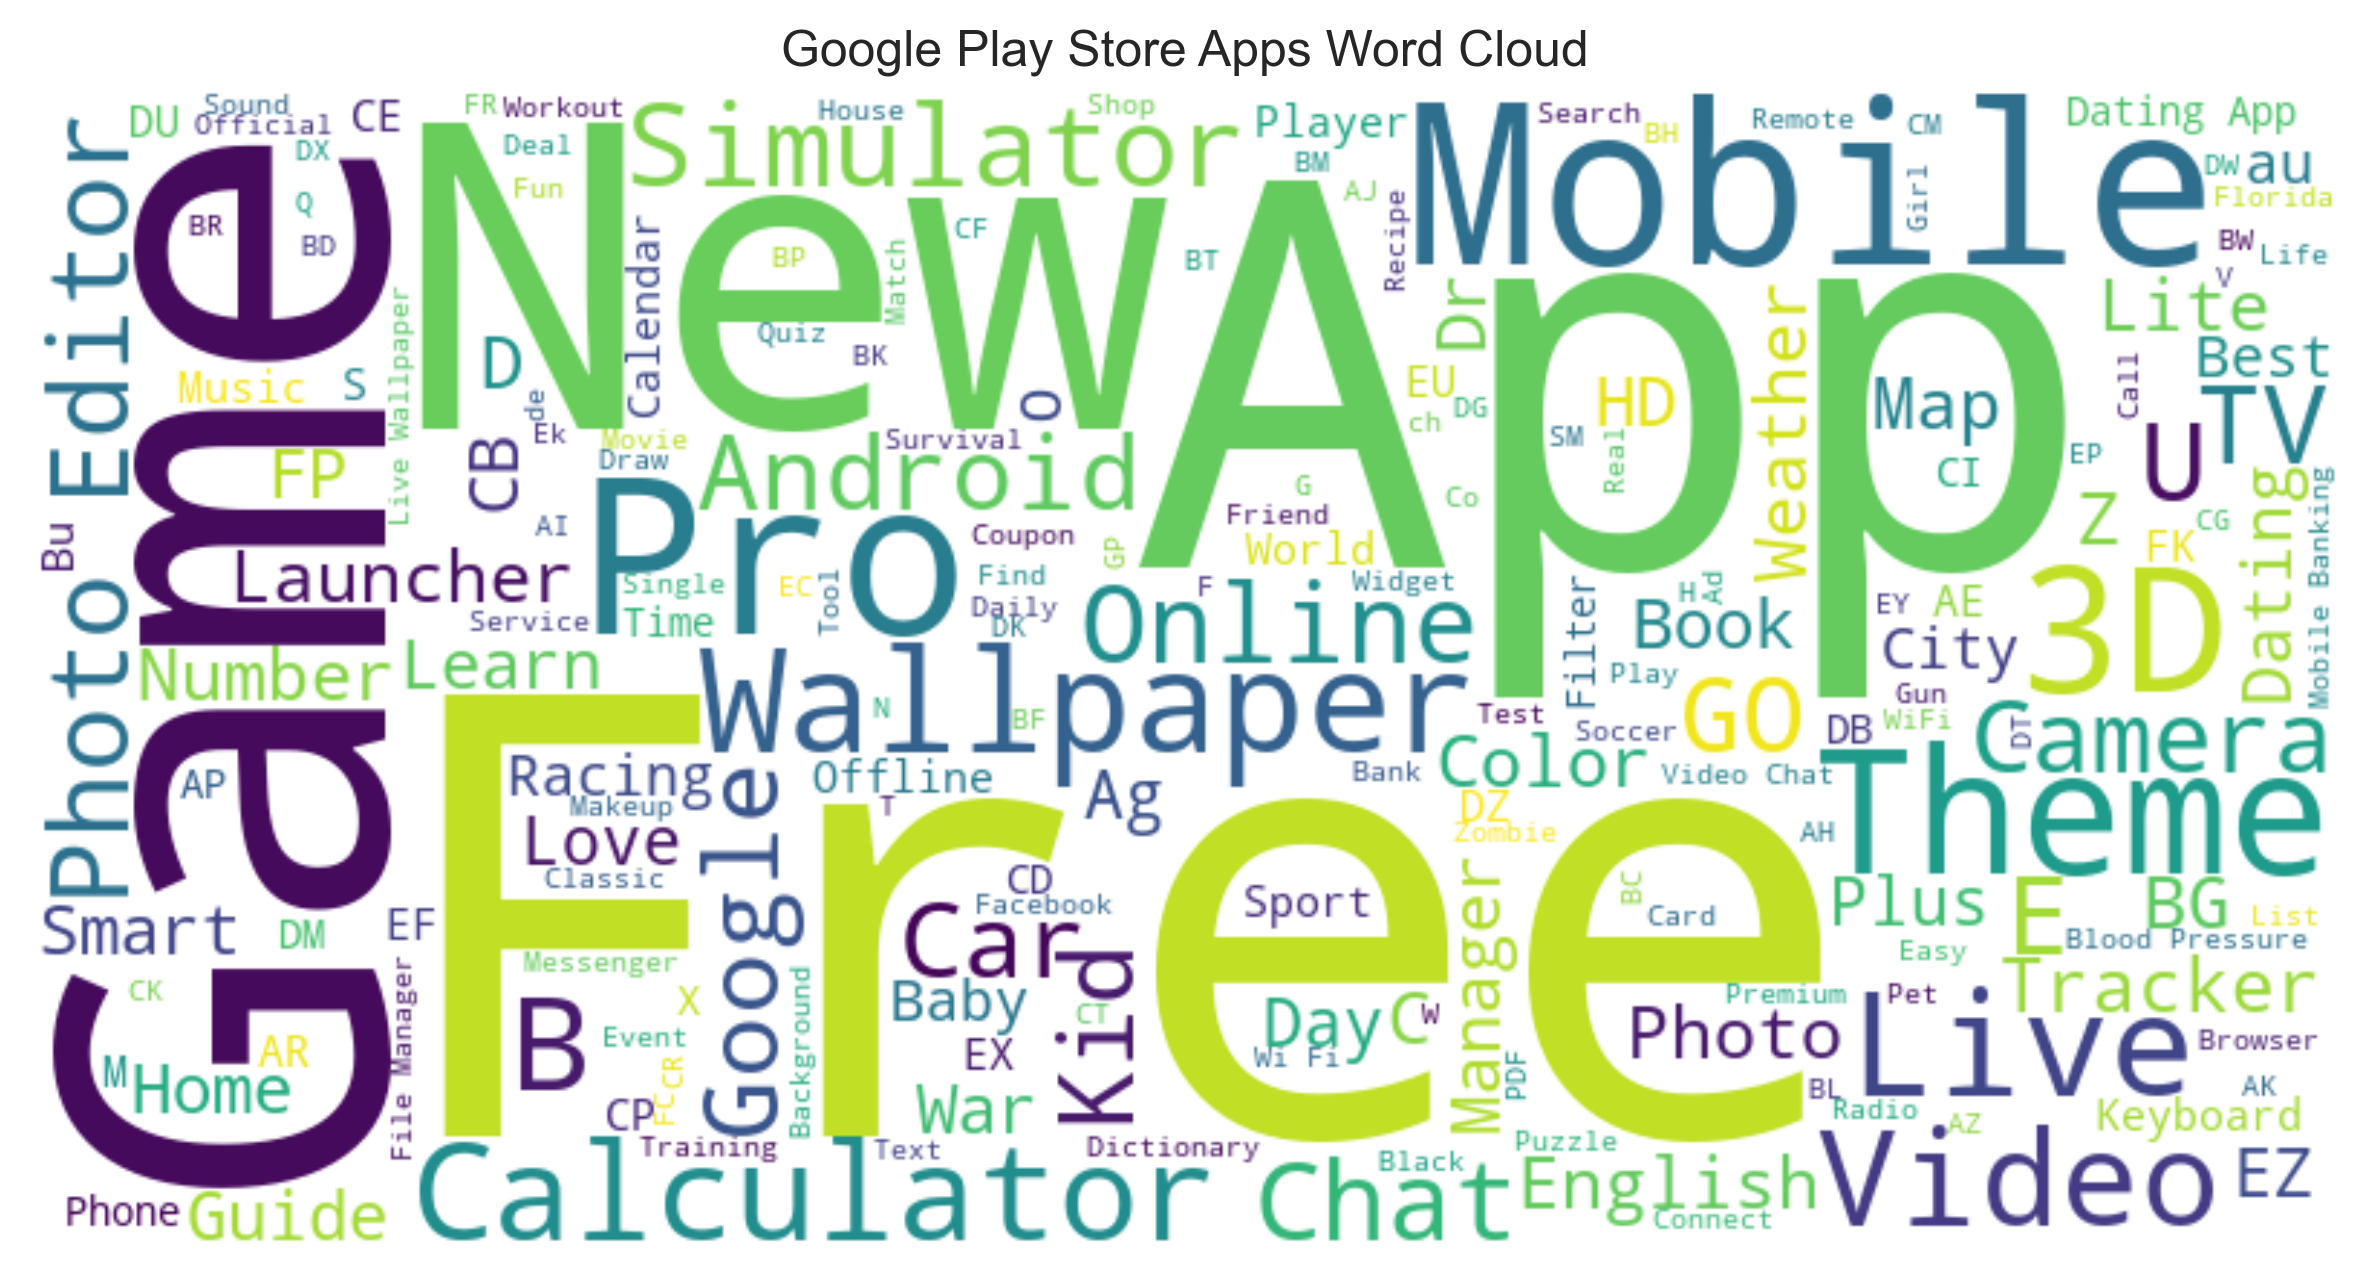

In [80]:
# Create WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Set graphics properties
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Google Play Store Apps Word Cloud')
plt.show()

The interpolation parameter for **Matplotlib's imshow() function** can take several different values. These values control how the image is displayed. Here are some examples:

**1. nearest:** Nearest neighbour interpolation. It is fast but can be of poor quality.

**2. bilinear:** Bilinear interpolation. Good quality and usually fast.

**3. bicubic:** Double cubic interpolation. Higher quality but can be slower.

**4. spline16:** 4x4 B-spline interpolation.

**5. spline36:** 6x6 B-spline interpolation.

**6. hanning, hamming, hermite, kaiser:** Interpolates using different window functions.

**7. lanczos:** Lanczos interpolation, high quality but can be slow.

**8. none:** No interpolation is applied.

There are several other options. The choice is made depending on the trade-off between image quality and speed. bilinear usually offers a good balance, but if higher quality is required, methods such as bicubic or lanczos can be used.

## <font color='green'> <b>Which Categories Show Low Installs with High Ratings in Google Play Store?</b><font color='black'>

1. **Group by ‘Category’**: DataFrame df is grouped by the ‘Category’ column. This operation aggregates the data for each unique category.

2. **Aggregate Functions**:
   - ‘Rating’: ‘mean’: The average user score is calculated for each category. This reflects overall user satisfaction within that category.
   - ‘Installs’: ‘sum’: The sum of app installs for each category is calculated. This reflects the overall popularity or user acceptance of that category.

3. **Sort Values**: The resulting data is sorted first in ascending order by the ‘Installs’ column and then in descending order by the ‘Rating’ column. This sorting helps to identify categories with high ratings despite a low number of installs.

The information obtained as a result of these processes identifies categories with low competition and high user satisfaction and provides strategic opportunities for developers who want to develop new applications for these categories.

In [81]:
low_competition_cat = df.groupby('Category')[['Rating', 'Installs']].agg({
    'Rating':
    'mean',
    'Installs':
    'sum'
}).sort_values(['Installs', 'Rating'], ascending=[True, False])

low_competition_cat['Installs'] = round(
    low_competition_cat['Installs'] / 1000000, 2)

low_competition_cat

Rating  Installs
Category                               
Events               4.395313     15.97
Beauty               4.283019     27.20
Parenting            4.300000     31.52
Medical              4.212990     42.20
Auto and vehicles    4.205882     53.13
Comics               4.160000     56.09
Libraries and demo   4.208333     62.00
Art and design       4.373437    124.33
House and home       4.185000    125.21
Dating               4.033673    206.54
Food and drink       4.183871    257.90
Weather              4.248780    426.10
Education            4.375385    533.95
Lifestyle            4.133244    534.82
Maps and navigation  4.075182    724.28
Finance              4.148056    770.35
Business             4.175176    863.66
Health and fitness   4.266993   1361.02
Sports               4.239031   1528.57
Books and reference  4.336681   1916.47
Personalization      4.326425   2074.48
Entertainment        4.136036   2455.66
Shopping             4.256250   2573.35
News and magazines   4.160985   5393.22
Video players        4.084000   6222.00
Travel and local     4.121941   6361.89
Photography          4.189441   9721.25
Family               4.203713  10041.63
Tools                4.079667  11452.27
Productivity         4.219410  12463.09
Social               4.260714  12513.87
Communication        4.175410  24152.28
Game                 4.282070  31544.02

1. **Scatter Plot Drawing**: Using the sns.scatterplot function, a scatter plot is drawn with the ‘Rating’ column on the x-axis and the ‘Installs’ column on the y-axis. Each category is represented by a different colour and the size of the circles changes according to the score size.

2. **Legend Settings**:
   - ax.get_legend_handles_labels(): Get the handles (control elements) and labels of the current legend.
   - ax.legend(...): Set the legend to show only the first 11 elements and hide oversized labels. The legend is placed outside the chart and in the top right corner.

3. **Display**: The graph is shown on the screen with the plt.show() function.

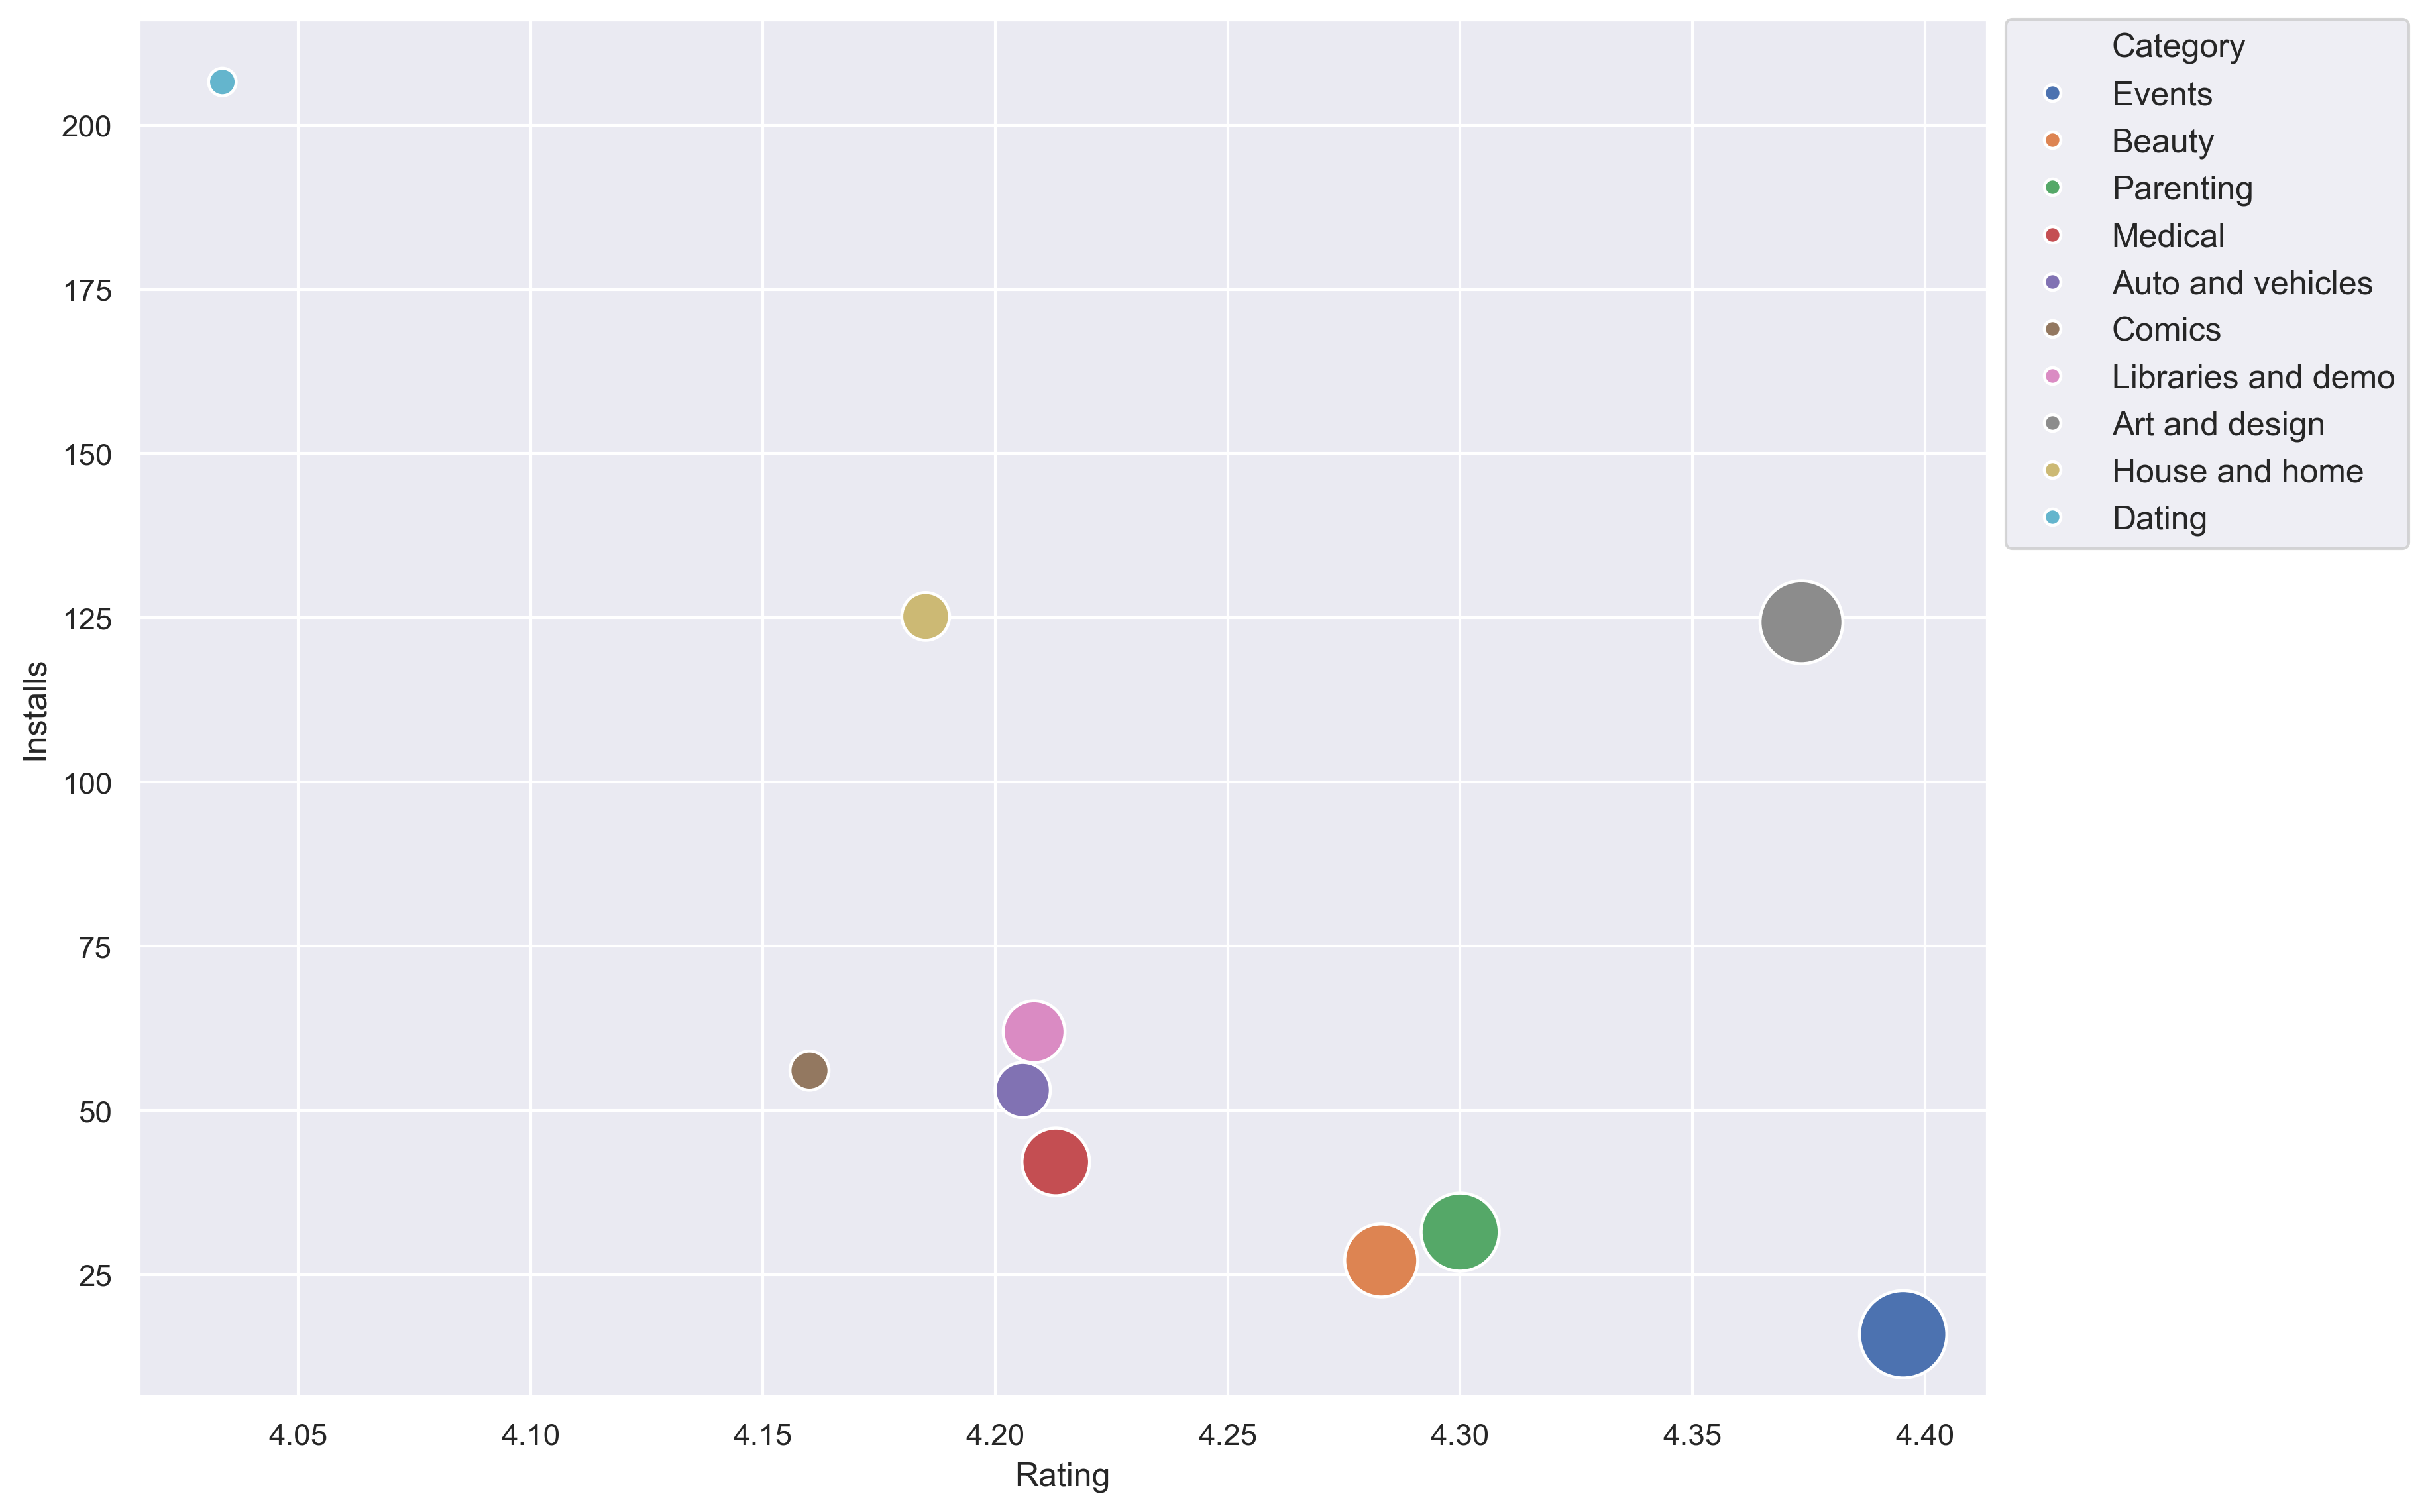

In [82]:
ax = sns.scatterplot(data=low_competition_cat[:10], x='Rating',
                y='Installs', hue='Category', size='Rating', sizes=[s for s in range(100,1200,100)], legend=True)

h, l = ax.get_legend_handles_labels()

ax.legend(h[0:11], l[0:11], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

## <font color='green'> <b>How Strong Is the Correlation Between Ratings and Number of Reviews for Apps?</b><font color='black'>

In [83]:
df.groupby('Rating')['Reviews'].sum()

Rating
1.0            28
1.2            44
1.4            98
1.5            61
1.6           691
1.7          2360
1.8          3418
1.9          2828
2.0          2997
2.1          3073
2.2          1979
2.3          2361
2.4         14829
2.5         14807
2.6          3761
2.7         25048
2.8        124730
2.9         57937
3.0        162618
3.1        320836
3.2        228320
3.3       1549019
3.4        958238
3.5       1565333
3.6       1797409
3.7       8646427
3.8      10756081
3.9      13564710
4.0     223602758
4.1     228915549
4.2     192300285
4.3     600892056
4.4     868505306
4.5    1158893777
4.6     675532724
4.7     189812069
4.8      23349249
4.9       2312993
5.0          2384
Name: Reviews, dtype: int64

Correlation coff: 0.06347187197772498


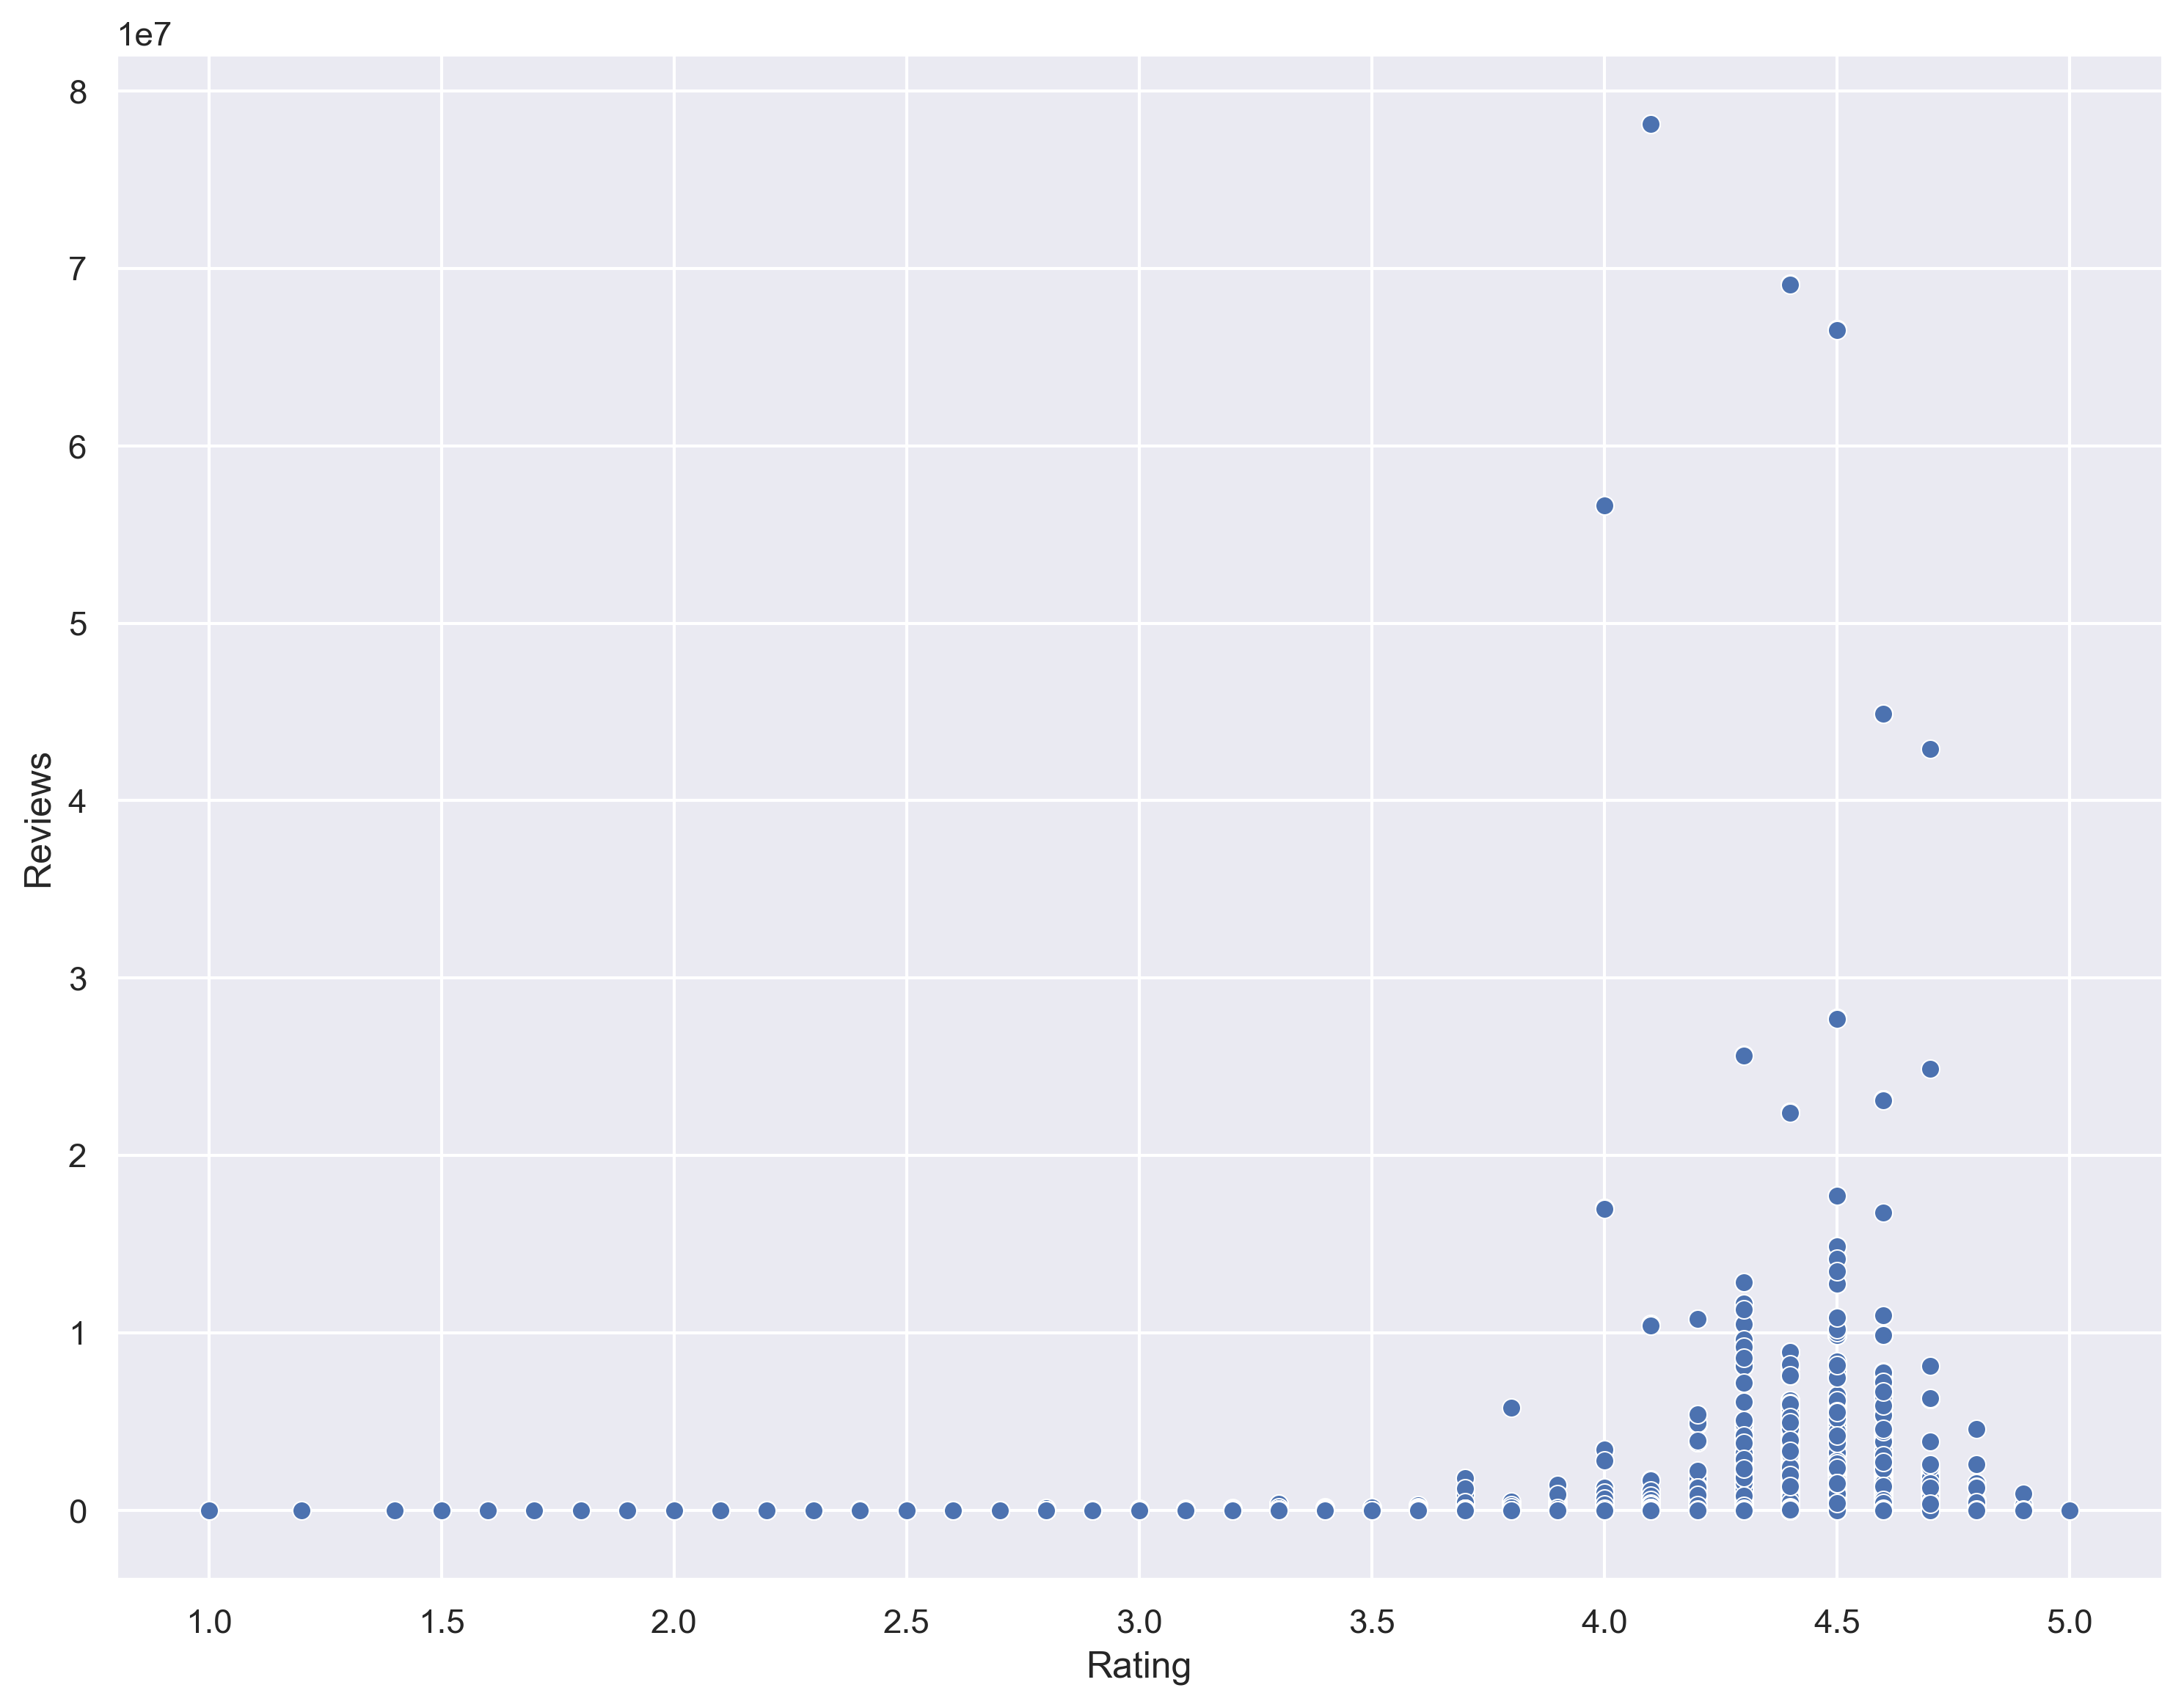

In [84]:
sns.scatterplot(data=df, x='Rating', y='Reviews')

print('Correlation coff:', df['Reviews'].corr(df['Rating']))

The ‘1e7’ in the image represents the scientific notation in mathematics and stands for \(1 x 10^7\).

This notation is often used to represent very large or very small numbers in a more readable format. 

Here, 1e7, used for ‘Reviews’ on the y-axis, means 10,000,000 reviews.

## <font color='green'> <b>How Do Content Ratings Correlate with App Categories?</b><font color='black'>

In [85]:
df['Content_Rating'].value_counts()

Content_Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

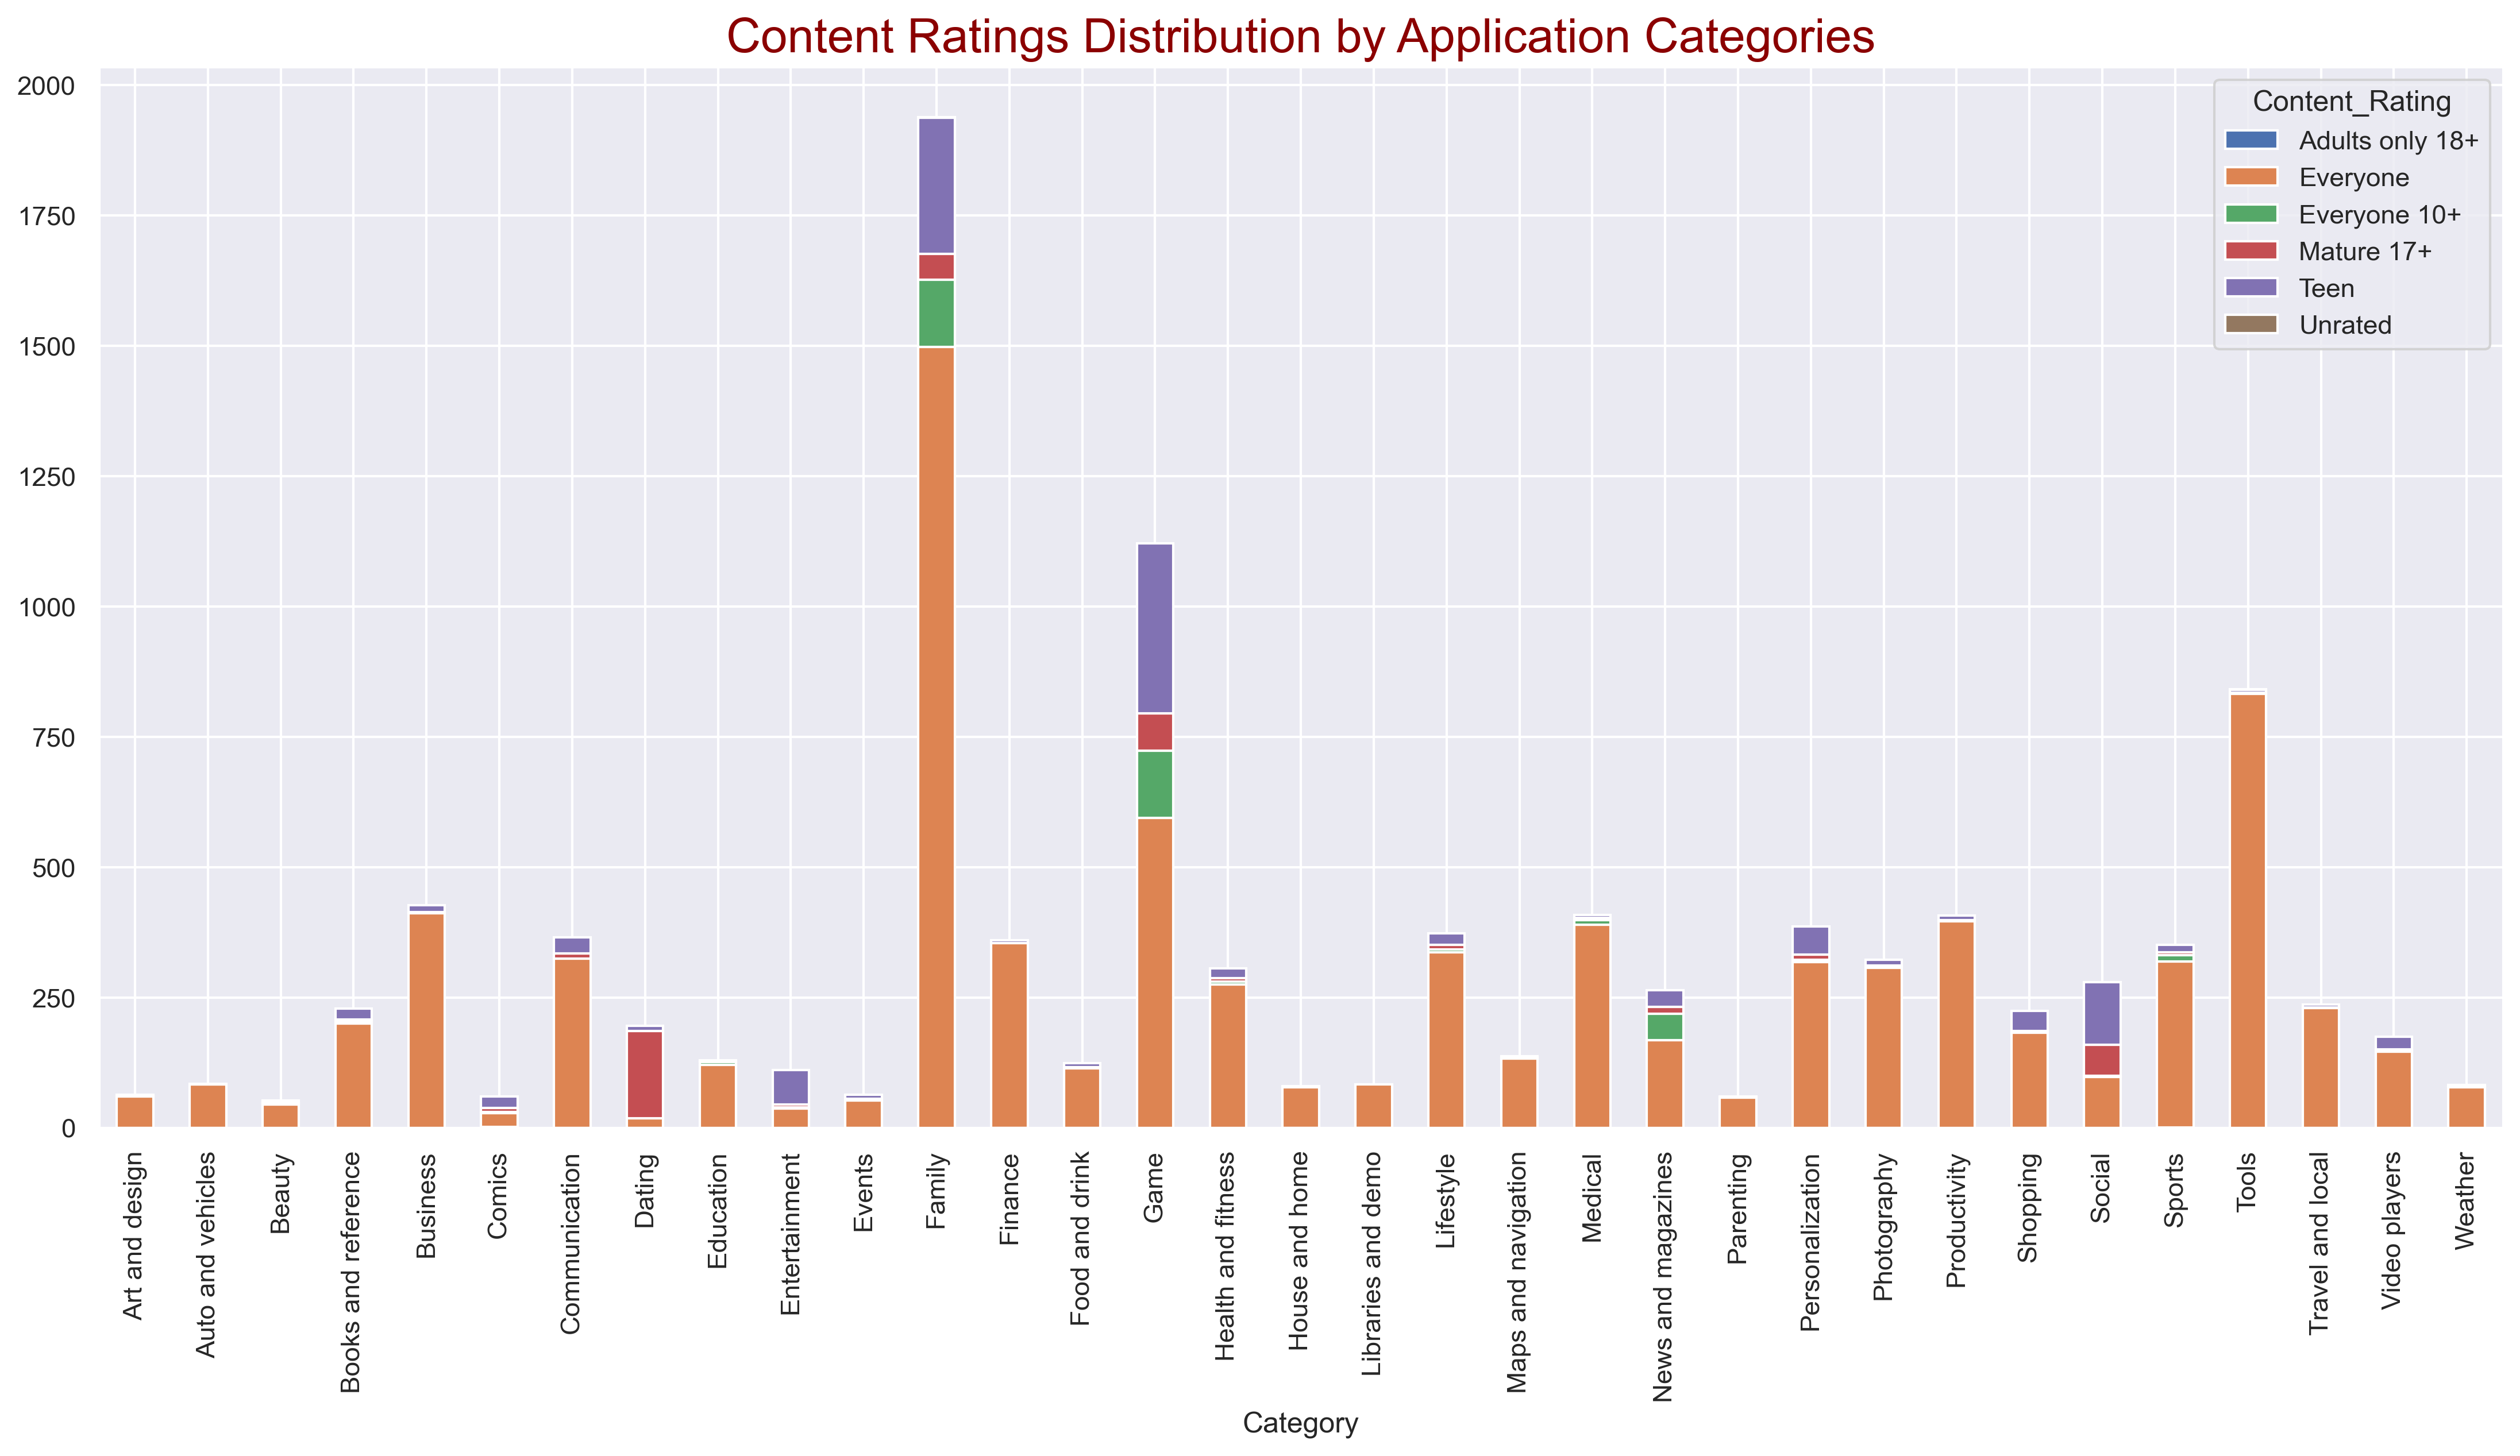

In [86]:
content_category_cross = pd.crosstab( df['Category'], df['Content_Rating'])

content_category_cross.plot(kind='bar', stacked=True, figsize=(18,8))

plt.title("Content Ratings Distribution by Application Categories", fontdict={'fontsize': 20, 'color': 'darkred'});

## <font color='green'> <b>How do App Installations Vary Across Different Android Versions?</b><font color='black'>

In [87]:
df['Android_Ver'].value_counts()

Android_Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1335
Varies with device    1220
4.4 and up             894
2.3 and up             642
5.0 and up             546
4.2 and up             386
2.3.3 and up           279
2.2 and up             239
3.0 and up             236
4.3 and up             235
2.1 and up             133
1.6 and up             115
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              22
1.5 and up              19
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

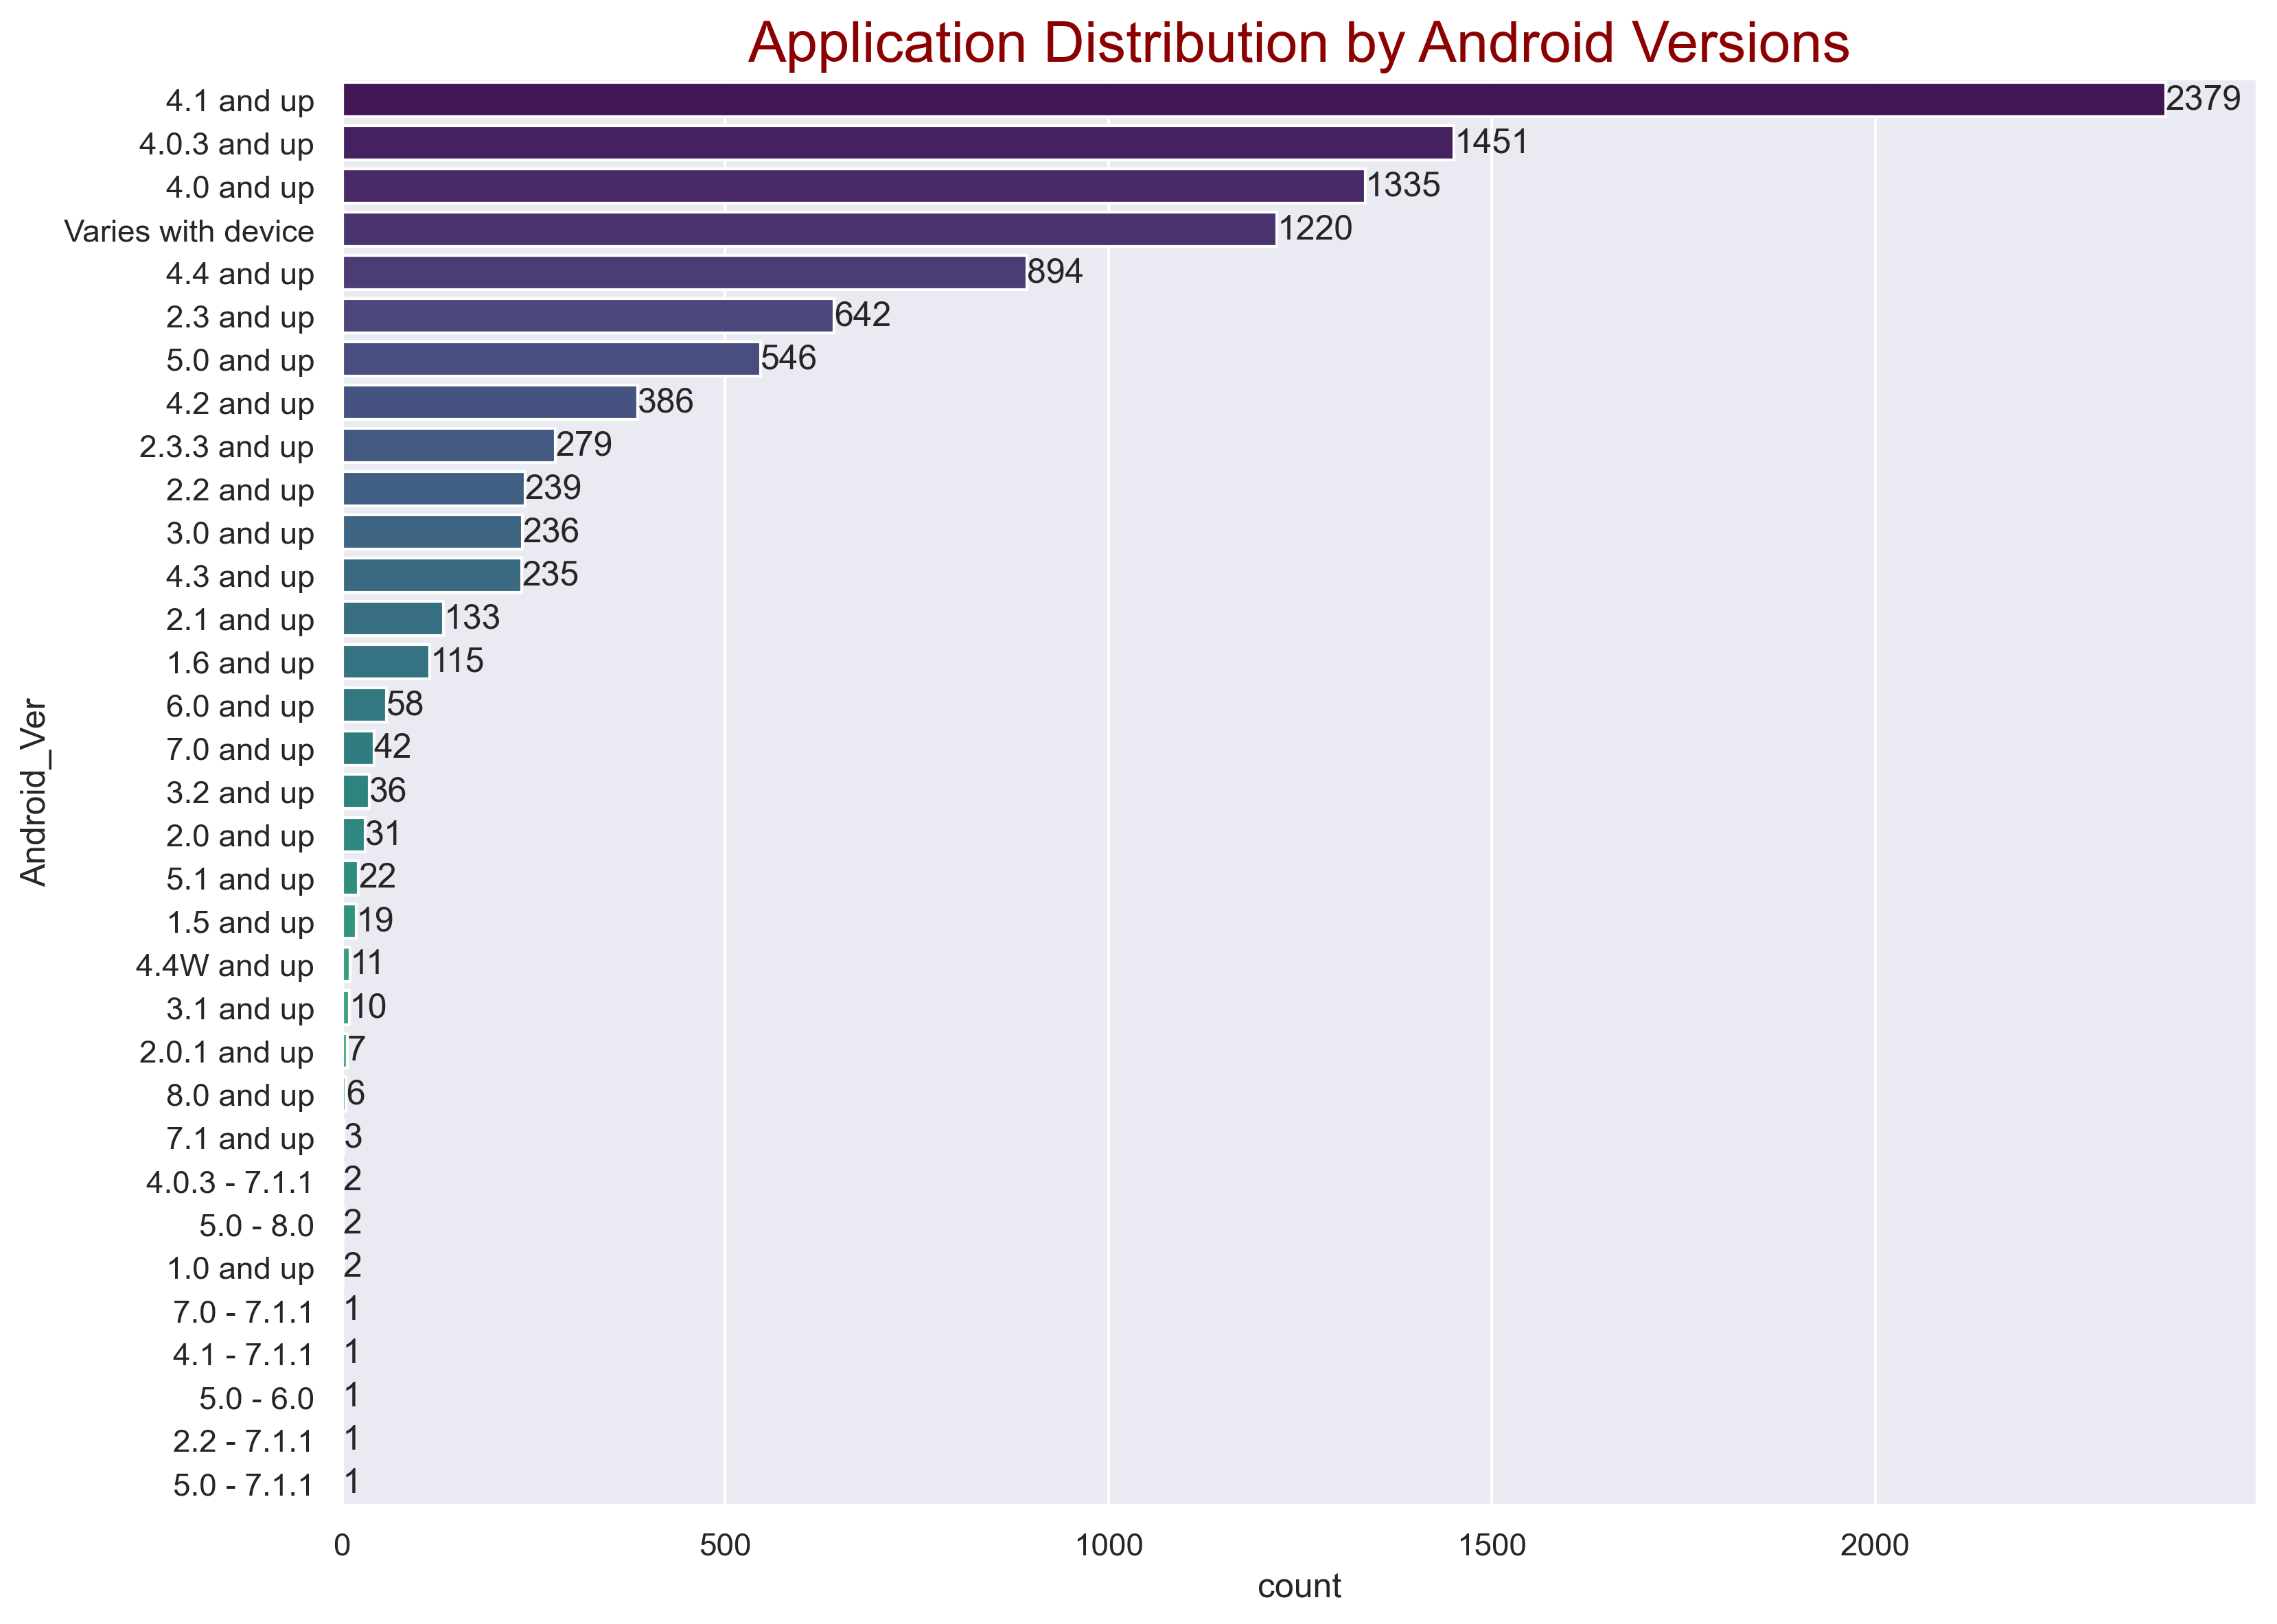

In [88]:
sorted_order = df['Android_Ver'].value_counts().index

ax = sns.countplot(data=df, y='Android_Ver', order=sorted_order, palette='viridis')

plt.title("Application Distribution by Android Versions",
          fontdict={
              'fontsize': 20,
              'color': 'darkred'
          })

for container in ax.containers:
    ax.bar_label(container)

# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Faydalı Olması Temennisiyle Teşekkürler</b></p>